# Read dataset and get characteristics

In [1]:
import networkx as nx
from networkx.algorithms.centrality import *
import numpy as np
import operator

In [2]:
def create_list(filename):
    element_list = []
    with open(filename) as f:
        for line in f:
            line_data = line.split(',') 
#you can change line_data[0] to line_data[1]
#if you want to print the next half of the txt line
            element_list.append(line_data[0])  
    return element_list

x = create_list("e_coli.txt")
x[:10]

['3 2 2\n',
 '5 10 1\n',
 '5 13 1\n',
 '8 7 1\n',
 '14 356 1\n',
 '17 16 1\n',
 '19 18 3\n',
 '19 20 3\n',
 '19 21 3\n',
 '19 22 1\n']

In [3]:
def create_edgelist_from_list(x):
    g = nx.Graph()
    for i in range(len(x)):
        source = int(x[i].split()[0])
        target = int(x[i].split()[1])
        g.add_edge(source, target)
    return g

In [4]:
g = create_edgelist_from_list(x)
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 419
Number of edges: 519
Average degree:   2.4773


In [5]:
nx.is_connected(g)

False

In [6]:
nx.number_connected_components(g)

29

## Get LCC if graph is disconnected

In [7]:
g_lcc = nx.Graph()

In [8]:
g_lcc = nx.Graph()
if nx.is_connected(g) == False:
    largestComponents = [g.subgraph(c).copy() for c in
                         sorted(nx.connected_components(g), key=len, reverse=True)]
print(nx.info(largestComponents[0]))

Name: 
Type: Graph
Number of nodes: 329
Number of edges: 456
Average degree:   2.7720


In [9]:
g_lcc=largestComponents[0]
print(nx.info(g_lcc))

Name: 
Type: Graph
Number of nodes: 329
Number of edges: 456
Average degree:   2.7720


In [10]:
g = g_lcc

In [11]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 329
Number of edges: 456
Average degree:   2.7720


# If number of nodes > 150, get the top 10% nodes

In [12]:
top_k = 0
if len(g) > 150:
    top_k = len(g)*0.1
top_k = round(top_k)
top_k

33

# Get Macroscopic Characteristics

In [13]:
# Min degree, Max degree
def degrees(G):
    return [G.degree(u) for u in G]
x = degrees(g)

In [14]:
mink = min(x)
mink

1

In [15]:
def getmax(x_list):
    max = 0
    for i in x_list:
        if i > max:
            max=i
    return max

In [16]:
maxk = getmax(x)
maxk

72

In [17]:
nx.average_shortest_path_length(g)

4.84133367929424

In [18]:
nx.density(g)

0.008451330713915042

In [19]:
nx.transitivity(g)

0.023260321767784455

In [20]:
nx.degree_assortativity_coefficient(g)

-0.26339211375253924

In [21]:
triangles_eachnode_dict = nx.triangles(g)
total_triangles = 0
for v in triangles_eachnode_dict.values():
    total_triangles = total_triangles + v
total_triangles

120

In [22]:
nx.is_connected(g)

True

# Relabel nodes for consistency across libraries and languages
## For `igraph`

In [23]:
import igraph as ix
from trussAndMappings import mappingAndRelabeling, getnodetrussnessdict

g_relabled = mappingAndRelabeling(g)

g_nx=g_relabled.copy()

l_nodes = g_nx.nodes ()
taille=len(l_nodes)
dict_graph = dict ()  # nodes in the key and their neighbors
for i in l_nodes:
    dict_graph[i] = []
for i in l_nodes:
    dict_graph[i] = g_nx.neighbors(i)

l_nodes1=list()
for i in l_nodes:
    l_nodes1.append(int(i))
dict_graph1=dict()
for i in dict_graph:
    dict_graph1[int(i)]=[]
    for j in dict_graph[i]:
        dict_graph1[int(i)].append(int(j))
#print(dict_graph)


l=[]
for i in l_nodes1:
    for j in dict_graph1[i]:
        l.append((i,j))
#print(l)
for li in l:
    l.remove((li[1],li[0]))
#print(l)


g_ix = ix.Graph()
g_ix.add_vertices(taille)
g_ix.add_edges(l)


In [24]:
g_ix.vcount()

329

In [25]:
g_ix.ecount()

456

In [26]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 329
Number of edges: 456
Average degree:   2.7720


In [27]:
print(nx.info(g_relabled))

Name: 
Type: Graph
Number of nodes: 329
Number of edges: 456
Average degree:   2.7720


__Before__

In [28]:
print(g.nodes())

[5, 10, 13, 17, 16, 19, 18, 20, 21, 22, 23, 0, 48, 72, 75, 84, 116, 143, 151, 152, 164, 171, 176, 202, 217, 242, 285, 357, 29, 24, 25, 26, 27, 28, 57, 45, 46, 47, 49, 55, 56, 128, 63, 64, 92, 102, 195, 264, 340, 355, 381, 406, 65, 4, 12, 15, 59, 62, 71, 82, 85, 86, 94, 95, 111, 117, 135, 149, 150, 153, 154, 156, 165, 166, 168, 172, 173, 175, 179, 181, 209, 216, 232, 233, 234, 236, 237, 238, 240, 245, 246, 255, 270, 271, 287, 289, 308, 312, 318, 336, 338, 345, 351, 361, 362, 369, 373, 382, 387, 388, 390, 414, 416, 67, 66, 68, 185, 192, 81, 286, 87, 89, 283, 93, 96, 110, 290, 291, 112, 118, 115, 203, 395, 122, 121, 126, 119, 197, 200, 130, 131, 134, 136, 139, 140, 141, 132, 133, 137, 138, 367, 142, 43, 88, 120, 145, 272, 273, 276, 280, 147, 6, 146, 309, 326, 109, 123, 124, 125, 127, 374, 155, 159, 161, 160, 163, 170, 267, 174, 180, 107, 189, 91, 106, 190, 292, 295, 314, 278, 294, 332, 365, 196, 198, 422, 215, 227, 177, 206, 211, 223, 224, 231, 293, 350, 352, 229, 228, 235, 239, 241, 144,

__After__

In [29]:
g = mappingAndRelabeling(g)
print(g.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [30]:
print(len(g.nodes()))

329


# Calculate Centralities

## Degree

In [31]:
dict_degree = degree_centrality(g)
dict_degree[0] # Degree centrality of node 0

0.006097560975609756

## Local Centrality - Obtained from R

In [32]:
# To be used for RStudio to get local centrality dictionary, we send the LCC in case the network is disconnected
# Further, we sent it after it has been relabeled, so we don't lose the ordering of the nodes
nx.write_pajek(g, r"ecoli-LCC.pajek")

In [33]:
def get_centrality_from_R(filename):
    with open(filename) as f:
        for line in f:
            line_data = line.split(' ')
        dict1 = {k: int(v) for k, v in enumerate(line_data)}
    return dict1

In [34]:
path = r"semilocal-ecoli.txt"

In [35]:
dict_local = get_centrality_from_R(path)
dict_local[0]

44

## Betweenness

In [36]:
dict_bet = betweenness_centrality(g)
dict_bet[0]

0.006097560975609756

## Katz

In [37]:
dict_katz = nx.katz_centrality_numpy(g, alpha=0.1)
dict_katz[0]

0.013585208341822915

## Current-flow Closeness

In [38]:
def current_flow_closeness_centrality(G, weight=None,
                                      dtype=float, solver='lu'):
    """Compute current-flow closeness centrality for nodes.

    Current-flow closeness centrality is variant of closeness
    centrality based on effective resistance between nodes in
    a network. This metric is also known as information centrality.

    Parameters
    ----------
    G : graph
      A NetworkX graph.

    weight : None or string, optional (default=None)
      If None, all edge weights are considered equal.
      Otherwise holds the name of the edge attribute used as weight.

    dtype: data type (default=float)
      Default data type for internal matrices.
      Set to np.float32 for lower memory consumption.

    solver: string (default='lu')
       Type of linear solver to use for computing the flow matrix.
       Options are "full" (uses most memory), "lu" (recommended), and
       "cg" (uses least memory).

    Returns
    -------
    nodes : dictionary
       Dictionary of nodes with current flow closeness centrality as the value.

    See Also
    --------
    closeness_centrality

    Notes
    -----
    The algorithm is from Brandes [1]_.

    See also [2]_ for the original definition of information centrality.

    References
    ----------
    .. [1] Ulrik Brandes and Daniel Fleischer,
       Centrality Measures Based on Current Flow.
       Proc. 22nd Symp. Theoretical Aspects of Computer Science (STACS '05).
       LNCS 3404, pp. 533-544. Springer-Verlag, 2005.
       http://algo.uni-konstanz.de/publications/bf-cmbcf-05.pdf

    .. [2] Karen Stephenson and Marvin Zelen:
       Rethinking centrality: Methods and examples.
       Social Networks 11(1):1-37, 1989.
       https://doi.org/10.1016/0378-8733(89)90016-6
    """
    import numpy as np
    import scipy
    if not nx.is_connected(G):
        raise nx.NetworkXError("Graph not connected.")
    solvername = {"full": FullInverseLaplacian,
                  "lu": SuperLUInverseLaplacian,
                  "cg": CGInverseLaplacian}
    n = G.number_of_nodes()
    ordering = list(reverse_cuthill_mckee_ordering(G))
    # make a copy with integer labels according to rcm ordering
    # this could be done without a copy if we really wanted to
    H = nx.relabel_nodes(G, dict(zip(ordering, range(n))))
    betweenness = dict.fromkeys(H, 0.0)  # b[v]=0 for v in H
    n = H.number_of_nodes()
    L = laplacian_sparse_matrix(H, nodelist=range(n), weight=weight,
                                dtype=dtype, format='csc')
    C2 = solvername[solver](L, width=1, dtype=dtype)  # initialize solver
    for v in H:
        col = C2.get_row(v)
        for w in H:
            betweenness[v] += col[v] - 2 * col[w]
            betweenness[w] += col[v]
    for v in H:
        betweenness[v] = 1.0 / (betweenness[v])
    return dict((ordering[k], float(v)) for k, v in betweenness.items())



information_centrality = current_flow_closeness_centrality


In [39]:
dict_close = nx.current_flow_closeness_centrality(g)
dict_close[0]

0.0008905864551801768

## PageRank

In [40]:
dict_pagerank = nx.pagerank(g, alpha=0.85)
dict_pagerank[0]

0.0030189962921814205

# Calculate Hierarchies

## K-core

In [41]:
## K-core size of graphs

# Defining check_existence() to check whether nodes of a particular degree exist
def check_existence(H, d):
    f = 0  # stays = 0 if there's no node of degree <= d
    for each in H.nodes():
        if H.degree(each) <= d:
            f = 1
            break
    return f


# Defining find() to find nodes which have degree <= it
def find(H, it):
    set1 = []
    for each in H.nodes():
        if H.degree(each) <= it:
            set1.append(each)
    return set1

# 2. Create a copy of the network and whatever we do is with the copy
#    Also create the other outil variables (it, tmp, ..)

H=g.copy()
it=1
tmp=[] # for the bucked being filled currently
buckets=[] #list of lists(bucktes)

# 3. Loop till the terminating conditions comes
while (1):
    flag = check_existence(H, it)

    if flag == 0:
        it = it + 1
        buckets.append(tmp)
        tmp = []  # start with a fresh bucket for new k

    if flag == 1:
        node_set = find(H, it)
        # remove nodes found and add them to the current bucket
        for each in node_set:
            H.remove_node(each)
            tmp.append(each)

    if H.number_of_nodes() == 0:
        # We still have the last tmp we have to append before we break
        buckets.append(tmp)
        break
#print(buckets)

kcore_dict = {}
for i, e in enumerate(buckets):
    kcore_dict[i+1] = e # Since i (our key, which would be our k-core) starts from 0
    print("Size of k-core subgraphs:",[i+1]," ", len(kcore_dict[i+1]))


Size of k-core subgraphs: [1]   188
Size of k-core subgraphs: [2]   92
Size of k-core subgraphs: [3]   49


In [42]:
# k-core of nodes
from networkx.algorithms import core_number
kcore_dict_eachNode = nx.core_number(g)
kcore_dict_eachNode[0]

1

In [43]:
# Getting top-k according to coreness of k-core
sorted_kcore_alone = sorted(kcore_dict_eachNode.items(), key=operator.itemgetter(1), reverse=True)

In [44]:
# Getting top 10
print("sorted_kcore_alone[:10]", sorted_kcore_alone[:10])

sorted_kcore_alone[:10] [(10, 3), (11, 3), (15, 3), (17, 3), (19, 3), (21, 3), (23, 3), (26, 3), (27, 3), (39, 3)]


In [45]:
# Getting top 10%
print("sorted_kcore_alone[:top_k]", sorted_kcore_alone[:top_k])

sorted_kcore_alone[:top_k] [(10, 3), (11, 3), (15, 3), (17, 3), (19, 3), (21, 3), (23, 3), (26, 3), (27, 3), (39, 3), (40, 3), (52, 3), (53, 3), (54, 3), (60, 3), (61, 3), (66, 3), (74, 3), (94, 3), (97, 3), (102, 3), (105, 3), (107, 3), (117, 3), (118, 3), (120, 3), (126, 3), (127, 3), (151, 3), (155, 3), (156, 3), (157, 3), (160, 3)]


In [46]:
max_list = []
for i in kcore_dict_eachNode.values():
    max_list.append(i)

In [47]:
# Rescaling
def max_num_in_list(list):
    max = list[0]
    for a in list:
        if a > max:
            max = a
    return max
m = max_num_in_list(max_list)
print("Max k-core", m)

Max k-core 3


In [48]:
def get_kcore_eachNode_rescaled(kcore_dict_eachNode):
    # get the factor to divide by max
    max_factor = max_num_in_list(max_list)
    x = {}
    for key, value in kcore_dict_eachNode.items():
        x[key] = value / max_factor
    return x

kcore_dict_eachNode_normalized = get_kcore_eachNode_rescaled(kcore_dict_eachNode)

In [49]:
# Getting top-k according to normalized k-core
sorted_kcore_alone_normalized = sorted(kcore_dict_eachNode_normalized.items(), key=operator.itemgetter(1), reverse=True)

In [50]:
# Getting top 10
print("sorted_kcore_alone_normalized[:10]", sorted_kcore_alone_normalized[:10])

sorted_kcore_alone_normalized[:10] [(10, 1.0), (11, 1.0), (15, 1.0), (17, 1.0), (19, 1.0), (21, 1.0), (23, 1.0), (26, 1.0), (27, 1.0), (39, 1.0)]


In [51]:
# Getting top 10%/k
print("sorted_kcore_alone_normalized[:top_k]", sorted_kcore_alone_normalized[:top_k])

sorted_kcore_alone_normalized[:top_k] [(10, 1.0), (11, 1.0), (15, 1.0), (17, 1.0), (19, 1.0), (21, 1.0), (23, 1.0), (26, 1.0), (27, 1.0), (39, 1.0), (40, 1.0), (52, 1.0), (53, 1.0), (54, 1.0), (60, 1.0), (61, 1.0), (66, 1.0), (74, 1.0), (94, 1.0), (97, 1.0), (102, 1.0), (105, 1.0), (107, 1.0), (117, 1.0), (118, 1.0), (120, 1.0), (126, 1.0), (127, 1.0), (151, 1.0), (155, 1.0), (156, 1.0), (157, 1.0), (160, 1.0)]


## K-truss

In [52]:
# My
ktruss_dict_eachNode = {}
ktruss_dict_eachNode = getnodetrussnessdict(g_ix)
ktruss_dict_eachNode[0]

2

In [53]:
max_list = []
for i in ktruss_dict_eachNode.values():
    max_list.append(i)
max_list


sorted_ktruss_alone = sorted(ktruss_dict_eachNode.items(), key=operator.itemgetter(1), reverse=True)

In [54]:
# Getting top 10
print("sorted_ktruss_alone[:10]", sorted_ktruss_alone[:10])

sorted_ktruss_alone[:10] [(3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (13, 3), (14, 3)]


In [55]:
# Getting top 10%/k
print("sorted_ktruss_alone[:top_k]", sorted_ktruss_alone[:top_k])

sorted_ktruss_alone[:top_k] [(3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (13, 3), (14, 3), (17, 3), (19, 3), (21, 3), (23, 3), (26, 3), (27, 3), (39, 3), (40, 3), (41, 3), (52, 3), (56, 3), (66, 3), (67, 3), (68, 3), (69, 3), (71, 3), (74, 3), (82, 3), (83, 3), (84, 3), (85, 3), (86, 3), (87, 3)]


In [56]:
# Rescaling
def max_num_in_list(list):
    max = list[0]
    for a in list:
        if a > max:
            max = a
    return max
m = max_num_in_list(max_list)
print("Max k-truss", m)

Max k-truss 3


In [57]:
def get_ktruss_eachNode_rescaled(ktruss_dict_eachNode):
    # get the factor to divide by max
    max_factor = max_num_in_list(max_list)
    x = {}
    for key, value in ktruss_dict_eachNode.items():
        x[key] = value / max_factor
    return x


ktruss_dict_eachNode_normalized = get_ktruss_eachNode_rescaled(ktruss_dict_eachNode)

In [58]:
# Getting top-k according to normalized k-truss
sorted_ktruss_alone_normalized = sorted(ktruss_dict_eachNode_normalized.items(), key=operator.itemgetter(1), reverse=True)

In [59]:
# Getting top 10
print("sorted_ktruss_alone_normalized[:10]", sorted_ktruss_alone_normalized[:10])

sorted_ktruss_alone_normalized[:10] [(3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (7, 1.0), (8, 1.0), (9, 1.0), (10, 1.0), (13, 1.0), (14, 1.0)]


In [60]:
# Getting top 10%/k
print("sorted_ktruss_alone_normalized[:top_k]", sorted_ktruss_alone_normalized[:top_k])

sorted_ktruss_alone_normalized[:top_k] [(3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (7, 1.0), (8, 1.0), (9, 1.0), (10, 1.0), (13, 1.0), (14, 1.0), (17, 1.0), (19, 1.0), (21, 1.0), (23, 1.0), (26, 1.0), (27, 1.0), (39, 1.0), (40, 1.0), (41, 1.0), (52, 1.0), (56, 1.0), (66, 1.0), (67, 1.0), (68, 1.0), (69, 1.0), (71, 1.0), (74, 1.0), (82, 1.0), (83, 1.0), (84, 1.0), (85, 1.0), (86, 1.0), (87, 1.0)]


## LRC

In [61]:
lrc_eachNode = {}
for i in g.nodes():
    lrc_eachNode[i] = nx.local_reaching_centrality(g, i)

In [62]:
lrc_eachNode[0]

0.19540868176538911

## Tri: Triangles participation of each node
`nx.triangles(g) Finds the number of triangles that include a node as one vertex`

In [63]:
triangles_dict_eachNode = nx.triangles(g)

In [64]:
#Rescaling

max_list = []
for i in triangles_dict_eachNode.values():
    max_list.append(i)

m = max_num_in_list(max_list)
m

16

In [65]:
def get_triangles_eachNode_rescaled(triangles_dict_eachNode):
    # get the factor to divide by max
    max_factor = max_num_in_list(max_list)
    x = {}
    for key, value in triangles_dict_eachNode.items():
        x[key] = value / max_factor
    return x

In [66]:
# Triangles centrality you can say (of all graph)
triangles_dict_eachNode_normalized = get_triangles_eachNode_rescaled(triangles_dict_eachNode)
triangles_dict_eachNode_normalized[0]

0.0

# Jaccard Similarity between Centralities and Hierarchies

In [67]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

## Degree vs. Hierarchies

### vs. Kcore

In [68]:
# Sort
sorted_standard = sorted(dict_degree.items(), key=operator.itemgetter(1), reverse=True)
sorted_kcore_alone_normalized = sorted(kcore_dict_eachNode_normalized.items(), key=operator.itemgetter(1), reverse=True)

# Getting top 10 
sorted_standard_top_10 = sorted_standard[:10]
sorted_kcore_alone_top_10 = sorted_kcore_alone[:10]

# Getting the top 10 nodes only
sorted_standard_top_10_nodes = []
for i in range(len(sorted_standard_top_10)):
    sorted_standard_top_10_nodes.append(sorted_standard_top_10[i][0])
print("sorted_standard_top_10_nodes: ", sorted_standard_top_10_nodes)
print()


sorted_kcore_alone_top_10_nodes = []
for i in range(len(sorted_kcore_alone_top_10)):
    sorted_kcore_alone_top_10_nodes.append(sorted_kcore_alone_top_10[i][0])
print("sorted_kcore_alone_top_10_nodes: ", sorted_kcore_alone_top_10_nodes)
print()

sorted_standard_top_10_nodes:  [52, 305, 264, 151, 181, 10, 239, 101, 142, 196]

sorted_kcore_alone_top_10_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39]



In [69]:
print("Jaccard top 10 (Degree, Kcore) = ", jaccard_similarity(sorted_standard_top_10_nodes, sorted_kcore_alone_top_10_nodes))

Jaccard top 10 (Degree, Kcore) =  0.05263157894736842


In [70]:
# Getting top k
sorted_standard_top_k = sorted_standard[:top_k]
sorted_kcore_alone_top_k = sorted_kcore_alone[:top_k]

# Getting the top k nodes only
sorted_standard_top_k_nodes = []
for i in range(len(sorted_standard_top_k)):
    sorted_standard_top_k_nodes.append(sorted_standard_top_k[i][0])
print("sorted_standard_top_k_nodes: ", sorted_standard_top_k_nodes)
print()


sorted_kcore_alone_top_k_nodes = []
for i in range(len(sorted_kcore_alone_top_k)):
    sorted_kcore_alone_top_k_nodes.append(sorted_kcore_alone_top_k[i][0])
print("sorted_kcore_alone_top_k_nodes: ", sorted_kcore_alone_top_k_nodes)
print()

sorted_standard_top_k_nodes:  [52, 305, 264, 151, 181, 10, 239, 101, 142, 196, 230, 226, 294, 257, 42, 66, 69, 117, 86, 118, 160, 185, 300, 27, 28, 39, 210, 5, 17, 105, 126, 129, 11]

sorted_kcore_alone_top_k_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39, 40, 52, 53, 54, 60, 61, 66, 74, 94, 97, 102, 105, 107, 117, 118, 120, 126, 127, 151, 155, 156, 157, 160]



In [71]:
print("Jaccard top k (Degree, Kcore) = ", jaccard_similarity(sorted_standard_top_k_nodes, sorted_kcore_alone_top_k_nodes))

Jaccard top k (Degree, Kcore) =  0.24528301886792453


### vs. Ktruss

In [72]:
# Sort
sorted_ktruss_alone_normalized = sorted(ktruss_dict_eachNode_normalized.items(), key=operator.itemgetter(1), reverse=True)

# Getting top 10 
sorted_ktruss_alone_top_10 = sorted_ktruss_alone[:10]


sorted_ktruss_alone_top_10_nodes = []
for i in range(len(sorted_ktruss_alone_top_10)):
    sorted_ktruss_alone_top_10_nodes.append(sorted_ktruss_alone_top_10[i][0])
print("sorted_ktruss_alone_top_10_nodes: ", sorted_ktruss_alone_top_10_nodes)
print()

sorted_ktruss_alone_top_10_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14]



In [73]:
print("Jaccard top 10 (Degree, Ktruss) = ", jaccard_similarity(sorted_standard_top_10_nodes, sorted_ktruss_alone_top_10_nodes))

Jaccard top 10 (Degree, Ktruss) =  0.05263157894736842


In [74]:
# Sort
sorted_ktruss_alone_normalized = sorted(ktruss_dict_eachNode_normalized.items(), key=operator.itemgetter(1), reverse=True)

# Getting top 10 
sorted_ktruss_alone_top_k = sorted_ktruss_alone[:top_k]


sorted_ktruss_alone_top_k_nodes = []
for i in range(len(sorted_ktruss_alone_top_k)):
    sorted_ktruss_alone_top_k_nodes.append(sorted_ktruss_alone_top_k[i][0])
print("sorted_ktruss_alone_top_k_nodes: ", sorted_ktruss_alone_top_k_nodes)
print()

sorted_ktruss_alone_top_k_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 17, 19, 21, 23, 26, 27, 39, 40, 41, 52, 56, 66, 67, 68, 69, 71, 74, 82, 83, 84, 85, 86, 87]



In [75]:
print("Jaccard top k (Degree, Ktruss) = ", jaccard_similarity(sorted_standard_top_k_nodes, sorted_ktruss_alone_top_k_nodes))

Jaccard top k (Degree, Ktruss) =  0.15789473684210525


### vs. LRC

In [76]:
# Sort
sorted_lrc_alone = sorted(lrc_eachNode.items(), key=operator.itemgetter(1), reverse=True)

# Getting top 10 and putting the 'node' in a list
sorted_lrc_alone_top_10 = sorted_lrc_alone[:10]
sorted_lrc_alone_top_10

sorted_lrc_alone_top_10_nodes = []
for i in range(len(sorted_lrc_alone_top_10)):
    sorted_lrc_alone_top_10_nodes.append(sorted_lrc_alone_top_10[i][0])
sorted_lrc_alone_top_10_nodes

print("sorted_lrc_alone_top_10_nodes:", sorted_lrc_alone_top_10_nodes)
print("Jaccard top 10 (Degree, LRC) = ", jaccard_similarity(sorted_standard_top_10_nodes, sorted_lrc_alone_top_10_nodes))

sorted_lrc_alone_top_10_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53]
Jaccard top 10 (Degree, LRC) =  0.17647058823529413


In [77]:
# Getting top 10 and putting the 'node' in a list
sorted_lrc_alone_top_k = sorted_lrc_alone[:top_k]
sorted_lrc_alone_top_k

sorted_lrc_alone_top_k_nodes = []
for i in range(len(sorted_lrc_alone_top_k)):
    sorted_lrc_alone_top_k_nodes.append(sorted_lrc_alone_top_k[i][0])
sorted_lrc_alone_top_k_nodes

print("sorted_lrc_alone_top_k_nodes:", sorted_lrc_alone_top_k_nodes)
print("Jaccard top k (Degree, LRC) = ", jaccard_similarity(sorted_standard_top_k_nodes, sorted_lrc_alone_top_k_nodes))

sorted_lrc_alone_top_k_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53, 69, 102, 40, 15, 151, 10, 21, 74, 230, 60, 65, 22, 55, 70, 86, 41, 305, 98, 27, 56, 5, 92, 61]
Jaccard top k (Degree, LRC) =  0.29411764705882354


### vs. Tri

In [78]:
# Sort
sorted_triangles_alone = sorted(triangles_dict_eachNode_normalized.items(), key=operator.itemgetter(1), reverse=True)

# Getting top 10 and putting the 'node' in a list
sorted_triangles_alone_top_10 = sorted_triangles_alone[:10]
sorted_triangles_alone_top_10


sorted_triangles_alone_top_10[0][0]

sorted_triangles_alone_top_10_nodes = []
for i in range(len(sorted_triangles_alone_top_10)):
    sorted_triangles_alone_top_10_nodes.append(sorted_triangles_alone_top_10[i][0])
sorted_triangles_alone_top_10_nodes

# In[708]:

print("sorted_triangles_alone_top_10_nodes: ", sorted_triangles_alone_top_10_nodes)
print("Jaccard top 10 (Degree, Tri) = ", jaccard_similarity(sorted_standard_top_10_nodes, sorted_triangles_alone_top_10_nodes))

sorted_triangles_alone_top_10_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185]
Jaccard top 10 (Degree, Tri) =  0.25


In [79]:
# Getting top 10 and putting the 'node' in a list
sorted_triangles_alone_top_k = sorted_triangles_alone[:top_k]
sorted_triangles_alone_top_k


sorted_triangles_alone_top_k[0][0]

sorted_triangles_alone_top_k_nodes = []
for i in range(len(sorted_triangles_alone_top_k)):
    sorted_triangles_alone_top_k_nodes.append(sorted_triangles_alone_top_k[i][0])
sorted_triangles_alone_top_k_nodes

# In[708]:

print("sorted_triangles_alone_top_k_nodes: ", sorted_triangles_alone_top_k_nodes)
print("Jaccard top k (Degree, Tri) = ", jaccard_similarity(sorted_standard_top_k_nodes, sorted_triangles_alone_top_k_nodes))

sorted_triangles_alone_top_k_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185, 294, 39, 74, 92, 181, 3, 4, 6, 7, 8, 9, 13, 14, 17, 19, 21, 23, 26, 27, 40, 41, 56, 67]
Jaccard top k (Degree, Tri) =  0.29411764705882354


## Local vs. Hierarchies

### vs. Kcore

In [80]:
# Sort
sorted_local = sorted(dict_local.items(), key=operator.itemgetter(1), reverse=True)
sorted_kcore_alone_normalized = sorted(kcore_dict_eachNode_normalized.items(), key=operator.itemgetter(1), reverse=True)

# Getting top 10 
sorted_local_top_10 = sorted_local[:10]
sorted_kcore_alone_top_10 = sorted_kcore_alone[:10]

# Getting the top 10 nodes only
sorted_local_top_10_nodes = []
for i in range(len(sorted_local_top_10)):
    sorted_local_top_10_nodes.append(sorted_local_top_10[i][0])
print("sorted_local_top_10_nodes: ", sorted_local_top_10_nodes)
print()


sorted_kcore_alone_top_10_nodes = []
for i in range(len(sorted_kcore_alone_top_10)):
    sorted_kcore_alone_top_10_nodes.append(sorted_kcore_alone_top_10[i][0])
print("sorted_kcore_alone_top_10_nodes: ", sorted_kcore_alone_top_10_nodes)
print()

sorted_local_top_10_nodes:  [52, 17, 39, 21, 105, 101, 102, 60, 53, 66]

sorted_kcore_alone_top_10_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39]



In [81]:
print("Jaccard top 10 (Local, Kcore) = ", jaccard_similarity(sorted_local_top_10_nodes, sorted_kcore_alone_top_10_nodes))

Jaccard top 10 (Local, Kcore) =  0.17647058823529413


In [82]:
# Getting top 10 
sorted_local_top_k = sorted_local[:top_k]
sorted_kcore_alone_top_k = sorted_kcore_alone[:top_k]

# Getting the top 10 nodes only
sorted_local_top_k_nodes = []
for i in range(len(sorted_local_top_k)):
    sorted_local_top_k_nodes.append(sorted_local_top_k[i][0])
print("sorted_local_top_k_nodes: ", sorted_local_top_k_nodes)
print()


sorted_kcore_alone_top_k_nodes = []
for i in range(len(sorted_kcore_alone_top_k)):
    sorted_kcore_alone_top_k_nodes.append(sorted_kcore_alone_top_k[i][0])
print("sorted_kcore_alone_top_k_nodes: ", sorted_kcore_alone_top_k_nodes)
print()

sorted_local_top_k_nodes:  [52, 17, 39, 21, 105, 101, 102, 60, 53, 66, 15, 54, 97, 40, 55, 69, 86, 22, 5, 61, 94, 107, 74, 88, 92, 96, 109, 98, 70, 65, 6, 7, 8]

sorted_kcore_alone_top_k_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39, 40, 52, 53, 54, 60, 61, 66, 74, 94, 97, 102, 105, 107, 117, 118, 120, 126, 127, 151, 155, 156, 157, 160]



In [83]:
print("Jaccard top k (Local, Kcore) = ", jaccard_similarity(sorted_local_top_k_nodes, sorted_kcore_alone_top_k_nodes))

Jaccard top k (Local, Kcore) =  0.3469387755102041


### vs. Kcore

In [84]:
# Sort
sorted_ktruss_alone_normalized = sorted(ktruss_dict_eachNode_normalized.items(), key=operator.itemgetter(1), reverse=True)

# Getting top 10 
sorted_ktruss_alone_top_10 = sorted_ktruss_alone[:10]


sorted_ktruss_alone_top_10_nodes = []
for i in range(len(sorted_ktruss_alone_top_10)):
    sorted_ktruss_alone_top_10_nodes.append(sorted_ktruss_alone_top_10[i][0])
print("sorted_ktruss_alone_top_10_nodes: ", sorted_ktruss_alone_top_10_nodes)
print()

sorted_ktruss_alone_top_10_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14]



In [85]:
print("Jaccard top 10 (Local, Ktruss) = ", jaccard_similarity(sorted_local_top_10_nodes, sorted_ktruss_alone_top_10_nodes))

Jaccard top 10 (Local, Ktruss) =  0.0


In [86]:
# Getting top 10 
sorted_ktruss_alone_top_k = sorted_ktruss_alone[:top_k]


sorted_ktruss_alone_top_k_nodes = []
for i in range(len(sorted_ktruss_alone_top_k)):
    sorted_ktruss_alone_top_k_nodes.append(sorted_ktruss_alone_top_k[i][0])
print("sorted_ktruss_alone_top_k_nodes: ", sorted_ktruss_alone_top_k_nodes)
print()

sorted_ktruss_alone_top_k_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 17, 19, 21, 23, 26, 27, 39, 40, 41, 52, 56, 66, 67, 68, 69, 71, 74, 82, 83, 84, 85, 86, 87]



In [87]:
print("Jaccard top k (Local, Ktruss) = ", jaccard_similarity(sorted_local_top_k_nodes, sorted_ktruss_alone_top_k_nodes))

Jaccard top k (Local, Ktruss) =  0.24528301886792453


### vs. LRC

In [88]:
# Sort
sorted_lrc_alone = sorted(lrc_eachNode.items(), key=operator.itemgetter(1), reverse=True)

# Getting top 10 and putting the 'node' in a list
sorted_lrc_alone_top_10 = sorted_lrc_alone[:10]
sorted_lrc_alone_top_10

sorted_lrc_alone_top_10_nodes = []
for i in range(len(sorted_lrc_alone_top_10)):
    sorted_lrc_alone_top_10_nodes.append(sorted_lrc_alone_top_10[i][0])
sorted_lrc_alone_top_10_nodes

print("sorted_lrc_alone_top_10_nodes:", sorted_lrc_alone_top_10_nodes)
print("Jaccard top 10 (Local, LRC) = ", jaccard_similarity(sorted_local_top_10_nodes, sorted_lrc_alone_top_10_nodes))

sorted_lrc_alone_top_10_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53]
Jaccard top 10 (Local, LRC) =  0.5384615384615384


In [89]:
# Getting top 10 and putting the 'node' in a list
sorted_lrc_alone_top_k = sorted_lrc_alone[:top_k]
sorted_lrc_alone_top_k

sorted_lrc_alone_top_k_nodes = []
for i in range(len(sorted_lrc_alone_top_k)):
    sorted_lrc_alone_top_k_nodes.append(sorted_lrc_alone_top_k[i][0])
sorted_lrc_alone_top_k_nodes

print("sorted_lrc_alone_top_k_nodes:", sorted_lrc_alone_top_k_nodes)
print("Jaccard top k (Local, LRC) = ", jaccard_similarity(sorted_local_top_k_nodes, sorted_lrc_alone_top_k_nodes))

sorted_lrc_alone_top_k_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53, 69, 102, 40, 15, 151, 10, 21, 74, 230, 60, 65, 22, 55, 70, 86, 41, 305, 98, 27, 56, 5, 92, 61]
Jaccard top k (Local, LRC) =  0.6097560975609756


### vs. Tri

In [90]:
# Sort
sorted_triangles_alone = sorted(triangles_dict_eachNode_normalized.items(), key=operator.itemgetter(1), reverse=True)

# Getting top 10 and putting the 'node' in a list
sorted_triangles_alone_top_10 = sorted_triangles_alone[:10]
sorted_triangles_alone_top_10


sorted_triangles_alone_top_10[0][0]

sorted_triangles_alone_top_10_nodes = []
for i in range(len(sorted_triangles_alone_top_10)):
    sorted_triangles_alone_top_10_nodes.append(sorted_triangles_alone_top_10[i][0])
sorted_triangles_alone_top_10_nodes

# In[708]:

print("sorted_triangles_alone_top_10_nodes: ", sorted_triangles_alone_top_10_nodes)
print("Jaccard top 10 (Degree, Tri) = ", jaccard_similarity(sorted_local_top_10_nodes, sorted_triangles_alone_top_10_nodes))

sorted_triangles_alone_top_10_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185]
Jaccard top 10 (Degree, Tri) =  0.1111111111111111


In [91]:
# Getting top 10 and putting the 'node' in a list
sorted_triangles_alone_top_k = sorted_triangles_alone[:top_k]
sorted_triangles_alone_top_k

sorted_triangles_alone_top_k_nodes = []
for i in range(len(sorted_triangles_alone_top_k)):
    sorted_triangles_alone_top_k_nodes.append(sorted_triangles_alone_top_k[i][0])
sorted_triangles_alone_top_k_nodes

# In[708]:

print("sorted_triangles_alone_top_k_nodes: ", sorted_triangles_alone_top_k_nodes)
print("Jaccard top k (Degree, Tri) = ", jaccard_similarity(sorted_local_top_k_nodes, sorted_triangles_alone_top_k_nodes))

sorted_triangles_alone_top_k_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185, 294, 39, 74, 92, 181, 3, 4, 6, 7, 8, 9, 13, 14, 17, 19, 21, 23, 26, 27, 40, 41, 56, 67]
Jaccard top k (Degree, Tri) =  0.24528301886792453


## Betweenness vs. Hierarchies

### vs. Kcore

In [92]:
sorted_bet = sorted(dict_bet.items(), key=operator.itemgetter(1), reverse=True)

# Getting top 10 and putting the 'node' in a list
sorted_bet_top_10 = sorted_bet[:10]


sorted_bet_top_10_nodes = []
for i in range(len(sorted_bet_top_10)):
    sorted_bet_top_10_nodes.append(sorted_bet_top_10[i][0])
print("sorted_bet_top_10_nodes: ", sorted_bet_top_10_nodes)
print("sorted_kcore_alone_top_10_nodes: ", sorted_kcore_alone_top_10_nodes)

print("Jaccard top 10 (Bet, Kcore) = ", jaccard_similarity(sorted_bet_top_10_nodes, sorted_kcore_alone_top_10_nodes))

sorted_bet_top_10_nodes:  [52, 181, 196, 101, 230, 173, 305, 264, 239, 66]
sorted_kcore_alone_top_10_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39]
Jaccard top 10 (Bet, Kcore) =  0.0


In [93]:
# Getting top 10 and putting the 'node' in a list
sorted_bet_top_k = sorted_bet[:top_k]


sorted_bet_top_k_nodes = []
for i in range(len(sorted_bet_top_k)):
    sorted_bet_top_k_nodes.append(sorted_bet_top_k[i][0])
print("sorted_bet_top_k_nodes: ", sorted_bet_top_k_nodes)
print("sorted_kcore_alone_top_k_nodes: ", sorted_kcore_alone_top_k_nodes)

print("Jaccard top k (Bet, Kcore) = ", jaccard_similarity(sorted_bet_top_k_nodes, sorted_kcore_alone_top_k_nodes))

sorted_bet_top_k_nodes:  [52, 181, 196, 101, 230, 173, 305, 264, 239, 66, 10, 189, 294, 151, 69, 126, 27, 42, 117, 127, 54, 97, 257, 185, 105, 142, 17, 102, 15, 74, 34, 219, 70]
sorted_kcore_alone_top_k_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39, 40, 52, 53, 54, 60, 61, 66, 74, 94, 97, 102, 105, 107, 117, 118, 120, 126, 127, 151, 155, 156, 157, 160]
Jaccard top k (Bet, Kcore) =  0.29411764705882354


### vs. ktruss

In [94]:
print("sorted_ktruss_alone_top_10_nodes: ", sorted_ktruss_alone_top_10_nodes)
print("Jaccard top 10 (Bet, Ktruss) = ", jaccard_similarity(sorted_bet_top_10_nodes, sorted_ktruss_alone_top_10_nodes))

sorted_ktruss_alone_top_10_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14]
Jaccard top 10 (Bet, Ktruss) =  0.0


In [95]:
print("sorted_ktruss_alone_top_k_nodes: ", sorted_ktruss_alone_top_k_nodes)
print("Jaccard top k (Bet, Ktruss) = ", jaccard_similarity(sorted_bet_top_k_nodes, sorted_ktruss_alone_top_k_nodes))

sorted_ktruss_alone_top_k_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 17, 19, 21, 23, 26, 27, 39, 40, 41, 52, 56, 66, 67, 68, 69, 71, 74, 82, 83, 84, 85, 86, 87]
Jaccard top k (Bet, Ktruss) =  0.11864406779661017


### vs. LRC

In [96]:
print("sorted_lrc_alone_top_10_nodes:", sorted_lrc_alone_top_10_nodes)
print("Jaccard top 10 (Bet, LRC) = ", jaccard_similarity(sorted_bet_top_10_nodes, sorted_lrc_alone_top_10_nodes))

sorted_lrc_alone_top_10_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53]
Jaccard top 10 (Bet, LRC) =  0.25


In [97]:
print("sorted_lrc_alone_top_k_nodes:", sorted_lrc_alone_top_k_nodes)
print("Jaccard top k (Bet, LRC) = ", jaccard_similarity(sorted_bet_top_k_nodes, sorted_lrc_alone_top_k_nodes))

sorted_lrc_alone_top_k_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53, 69, 102, 40, 15, 151, 10, 21, 74, 230, 60, 65, 22, 55, 70, 86, 41, 305, 98, 27, 56, 5, 92, 61]
Jaccard top k (Bet, LRC) =  0.375


### vs. Tri

In [98]:
print("sorted_triangles_alone_top_10_nodes: ", sorted_triangles_alone_top_10_nodes)
print("Jaccard top 10 (Bet, Tri) = ", jaccard_similarity(sorted_bet_top_10_nodes, sorted_triangles_alone_top_10_nodes))

sorted_triangles_alone_top_10_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185]
Jaccard top 10 (Bet, Tri) =  0.1111111111111111


In [99]:
print("sorted_triangles_alone_top_k_nodes: ", sorted_triangles_alone_top_k_nodes)
print("Jaccard top k (Bet, Tri) = ", jaccard_similarity(sorted_bet_top_k_nodes, sorted_triangles_alone_top_k_nodes))

sorted_triangles_alone_top_k_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185, 294, 39, 74, 92, 181, 3, 4, 6, 7, 8, 9, 13, 14, 17, 19, 21, 23, 26, 27, 40, 41, 56, 67]
Jaccard top k (Bet, Tri) =  0.2222222222222222


## Katz vs. Hierarchies

### vs. Kcore

In [100]:
sorted_katz = sorted(dict_katz.items(), key=operator.itemgetter(1), reverse=True)
sorted_katz_top_10 = sorted_katz[:10]

sorted_katz_top_10_nodes = []
for i in range(len(sorted_katz_top_10)):
    sorted_katz_top_10_nodes.append(sorted_katz_top_10[i][0])
print("sorted_katz_top_10_nodes: ", sorted_katz_top_10_nodes)
print("sorted_kcore_alone_top_10_nodes: ", sorted_kcore_alone_top_10_nodes)


print("Jaccard top 10 (Katz, Kcore) = ", jaccard_similarity(sorted_katz_top_10_nodes, sorted_kcore_alone_top_10_nodes))

sorted_katz_top_10_nodes:  [52, 151, 39, 17, 10, 101, 181, 5, 86, 21]
sorted_kcore_alone_top_10_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39]
Jaccard top 10 (Katz, Kcore) =  0.25


In [101]:
sorted_katz_top_k = sorted_katz[:top_k]

sorted_katz_top_k_nodes = []
for i in range(len(sorted_katz_top_k)):
    sorted_katz_top_k_nodes.append(sorted_katz_top_k[i][0])
print("sorted_katz_top_k_nodes: ", sorted_katz_top_k_nodes)
print("sorted_kcore_alone_top_k_nodes: ", sorted_kcore_alone_top_k_nodes)


print("Jaccard top k (Katz, Kcore) = ", jaccard_similarity(sorted_katz_top_k_nodes, sorted_kcore_alone_top_k_nodes))

sorted_katz_top_k_nodes:  [52, 151, 39, 17, 10, 101, 181, 5, 86, 21, 105, 66, 69, 60, 53, 102, 40, 15, 92, 55, 97, 54, 88, 305, 41, 22, 74, 71, 7, 8, 9, 6, 85]
sorted_kcore_alone_top_k_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39, 40, 52, 53, 54, 60, 61, 66, 74, 94, 97, 102, 105, 107, 117, 118, 120, 126, 127, 151, 155, 156, 157, 160]
Jaccard top k (Katz, Kcore) =  0.32


### Ktruss

In [102]:
print("sorted_ktruss_alone_top_10_nodes: ", sorted_ktruss_alone_top_10_nodes)
print("Jaccard top 10 (Katz, Ktruss) = ", jaccard_similarity(sorted_katz_top_10_nodes, sorted_ktruss_alone_top_10_nodes))

sorted_ktruss_alone_top_10_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14]
Jaccard top 10 (Katz, Ktruss) =  0.1111111111111111


In [103]:
print("sorted_ktruss_alone_top_k_nodes: ", sorted_ktruss_alone_top_k_nodes)
print("Jaccard top k (Katz, Ktruss) = ", jaccard_similarity(sorted_katz_top_k_nodes, sorted_ktruss_alone_top_k_nodes))

sorted_ktruss_alone_top_k_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 17, 19, 21, 23, 26, 27, 39, 40, 41, 52, 56, 66, 67, 68, 69, 71, 74, 82, 83, 84, 85, 86, 87]
Jaccard top k (Katz, Ktruss) =  0.375


### vs. LRC

In [104]:
print("sorted_lrc_alone_top_10_nodes:", sorted_lrc_alone_top_10_nodes)
print("Jaccard top 10 (Katz, LRC) = ", jaccard_similarity(sorted_katz_top_10_nodes, sorted_lrc_alone_top_10_nodes))

sorted_lrc_alone_top_10_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53]
Jaccard top 10 (Katz, LRC) =  0.3333333333333333


In [105]:
print("sorted_lrc_alone_top_k_nodes:", sorted_lrc_alone_top_k_nodes)
print("Jaccard top 10 (Katz, LRC) = ", jaccard_similarity(sorted_katz_top_k_nodes, sorted_lrc_alone_top_k_nodes))

sorted_lrc_alone_top_k_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53, 69, 102, 40, 15, 151, 10, 21, 74, 230, 60, 65, 22, 55, 70, 86, 41, 305, 98, 27, 56, 5, 92, 61]
Jaccard top 10 (Katz, LRC) =  0.65


### vs. Tri

In [106]:
print("sorted_triangles_alone_top_10_nodes: ", sorted_triangles_alone_top_10_nodes)
print("Jaccard top 10 (Katz, Tri) = ", jaccard_similarity(sorted_katz_top_10_nodes, sorted_triangles_alone_top_10_nodes))

sorted_triangles_alone_top_10_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185]
Jaccard top 10 (Katz, Tri) =  0.3333333333333333


In [107]:
print("sorted_triangles_alone_top_k_nodes: ", sorted_triangles_alone_top_k_nodes)
print("Jaccard top k (Katz, Tri) = ", jaccard_similarity(sorted_katz_top_k_nodes, sorted_triangles_alone_top_k_nodes))

sorted_triangles_alone_top_k_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185, 294, 39, 74, 92, 181, 3, 4, 6, 7, 8, 9, 13, 14, 17, 19, 21, 23, 26, 27, 40, 41, 56, 67]
Jaccard top k (Katz, Tri) =  0.375


## Closeness vs. Hierarchies

### vs. Kcore

In [108]:
sorted_close = sorted(dict_close.items(), key=operator.itemgetter(1), reverse=True)
sorted_close_top_10 = sorted_close[:10]

sorted_close_top_10_nodes = []
for i in range(len(sorted_close_top_10)):
    sorted_close_top_10_nodes.append(sorted_close_top_10[i][0])
print("sorted_close_top_10_nodes: ", sorted_close_top_10_nodes)
print("sorted_kcore_alone_top_10_nodes: ", sorted_kcore_alone_top_10_nodes)


print("Jaccard top 10 (Close, Kcore) = ", jaccard_similarity(sorted_close_top_10_nodes, sorted_kcore_alone_top_10_nodes))

sorted_close_top_10_nodes:  [52, 181, 151, 10, 230, 226, 39, 17, 117, 66]
sorted_kcore_alone_top_10_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39]
Jaccard top 10 (Close, Kcore) =  0.17647058823529413


In [109]:
sorted_close_top_k = sorted_close[:top_k]

sorted_close_top_k_nodes = []
for i in range(len(sorted_close_top_k)):
    sorted_close_top_k_nodes.append(sorted_close_top_k[i][0])
print("sorted_close_top_k_nodes: ", sorted_close_top_k_nodes)
print("sorted_kcore_alone_top_k_nodes: ", sorted_kcore_alone_top_k_nodes)


print("Jaccard top k (Close, Kcore) = ", jaccard_similarity(sorted_close_top_k_nodes, sorted_kcore_alone_top_k_nodes))

sorted_close_top_k_nodes:  [52, 181, 151, 10, 230, 226, 39, 17, 117, 66, 185, 27, 305, 26, 53, 21, 161, 294, 15, 60, 118, 11, 142, 101, 105, 86, 160, 5, 196, 40, 102, 126, 54]
sorted_kcore_alone_top_k_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39, 40, 52, 53, 54, 60, 61, 66, 74, 94, 97, 102, 105, 107, 117, 118, 120, 126, 127, 151, 155, 156, 157, 160]
Jaccard top k (Close, Kcore) =  0.4666666666666667


### Ktruss

In [110]:
print("sorted_ktruss_alone_top_10_nodes: ", sorted_ktruss_alone_top_10_nodes)
print("Jaccard top 10 (Close, Ktruss) = ", jaccard_similarity(sorted_close_top_10_nodes, sorted_ktruss_alone_top_10_nodes))

sorted_ktruss_alone_top_10_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14]
Jaccard top 10 (Close, Ktruss) =  0.05263157894736842


In [111]:
print("sorted_ktruss_alone_top_k_nodes: ", sorted_ktruss_alone_top_k_nodes)
print("Jaccard top k (Close, Ktruss) = ", jaccard_similarity(sorted_close_top_k_nodes, sorted_ktruss_alone_top_k_nodes))

sorted_ktruss_alone_top_k_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 17, 19, 21, 23, 26, 27, 39, 40, 41, 52, 56, 66, 67, 68, 69, 71, 74, 82, 83, 84, 85, 86, 87]
Jaccard top k (Close, Ktruss) =  0.2


### vs. LRC

In [112]:
print("sorted_lrc_alone_top_10_nodes:", sorted_lrc_alone_top_10_nodes)
print("Jaccard top 10 (Close, LRC) = ", jaccard_similarity(sorted_close_top_10_nodes, sorted_lrc_alone_top_10_nodes))

sorted_lrc_alone_top_10_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53]
Jaccard top 10 (Close, LRC) =  0.3333333333333333


In [113]:
print("sorted_lrc_alone_top_k_nodes:", sorted_lrc_alone_top_k_nodes)
print("Jaccard top k (Close, LRC) = ", jaccard_similarity(sorted_close_top_k_nodes, sorted_lrc_alone_top_k_nodes))

sorted_lrc_alone_top_k_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53, 69, 102, 40, 15, 151, 10, 21, 74, 230, 60, 65, 22, 55, 70, 86, 41, 305, 98, 27, 56, 5, 92, 61]
Jaccard top k (Close, LRC) =  0.4666666666666667


### vs. Tri

In [114]:
print("sorted_triangles_alone_top_10_nodes: ", sorted_triangles_alone_top_10_nodes)
print("Jaccard top 10 (Close, Tri) = ", jaccard_similarity(sorted_close_top_10_nodes, sorted_triangles_alone_top_10_nodes))

sorted_triangles_alone_top_10_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185]
Jaccard top 10 (Close, Tri) =  0.25


In [115]:
print("sorted_triangles_alone_top_k_nodes: ", sorted_triangles_alone_top_k_nodes)
print("Jaccard top k (Close, Tri) = ", jaccard_similarity(sorted_close_top_k_nodes, sorted_triangles_alone_top_k_nodes))

sorted_triangles_alone_top_k_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185, 294, 39, 74, 92, 181, 3, 4, 6, 7, 8, 9, 13, 14, 17, 19, 21, 23, 26, 27, 40, 41, 56, 67]
Jaccard top k (Close, Tri) =  0.32


## PageRank vs. Hierarchies

### vs. Kcore

In [116]:
sorted_pagerank = sorted(dict_pagerank.items(), key=operator.itemgetter(1), reverse=True)
sorted_pagerank_top_10 = sorted_pagerank[:10]

sorted_pagerank_top_10_nodes = []
for i in range(len(sorted_pagerank_top_10)):
    sorted_pagerank_top_10_nodes.append(sorted_pagerank_top_10[i][0])
print("sorted_pagerank_top_10_nodes: ", sorted_pagerank_top_10_nodes)
print("sorted_kcore_alone_top_10_nodes: ", sorted_kcore_alone_top_10_nodes)


print("Jaccard top 10  (PageRank, Kcore) = ", jaccard_similarity(sorted_pagerank_top_10_nodes, sorted_kcore_alone_top_10_nodes))

sorted_pagerank_top_10_nodes:  [52, 305, 264, 239, 181, 151, 101, 10, 196, 142]
sorted_kcore_alone_top_10_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39]
Jaccard top 10  (PageRank, Kcore) =  0.05263157894736842


In [117]:
sorted_pagerank_top_k = sorted_pagerank[:top_k]

sorted_pagerank_top_k_nodes = []
for i in range(len(sorted_pagerank_top_k)):
    sorted_pagerank_top_k_nodes.append(sorted_pagerank_top_k[i][0])
print("sorted_pagerank_top_k_nodes: ", sorted_pagerank_top_k_nodes)
print("sorted_kcore_alone_top_k_nodes: ", sorted_kcore_alone_top_k_nodes)


print("Jaccard top k  (PageRank, Kcore) = ", jaccard_similarity(sorted_pagerank_top_k_nodes, sorted_kcore_alone_top_k_nodes))

sorted_pagerank_top_k_nodes:  [52, 305, 264, 239, 181, 151, 101, 10, 196, 142, 230, 294, 257, 69, 42, 226, 66, 28, 117, 86, 160, 118, 300, 185, 214, 218, 173, 129, 210, 27, 39, 126, 105]
sorted_kcore_alone_top_k_nodes:  [10, 11, 15, 17, 19, 21, 23, 26, 27, 39, 40, 52, 53, 54, 60, 61, 66, 74, 94, 97, 102, 105, 107, 117, 118, 120, 126, 127, 151, 155, 156, 157, 160]
Jaccard top k  (PageRank, Kcore) =  0.2


### Ktruss

In [118]:
print("sorted_ktruss_alone_top_10_nodes: ", sorted_ktruss_alone_top_10_nodes)
print("Jaccard top 10 (PageRank, Ktruss) = ", jaccard_similarity(sorted_pagerank_top_10_nodes, sorted_ktruss_alone_top_10_nodes))

sorted_ktruss_alone_top_10_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14]
Jaccard top 10 (PageRank, Ktruss) =  0.05263157894736842


In [119]:
print("sorted_ktruss_alone_top_k_nodes: ", sorted_ktruss_alone_top_k_nodes)
print("Jaccard top k (PageRank, Ktruss) = ", jaccard_similarity(sorted_pagerank_top_k_nodes, sorted_ktruss_alone_top_k_nodes))

sorted_ktruss_alone_top_k_nodes:  [3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 17, 19, 21, 23, 26, 27, 39, 40, 41, 52, 56, 66, 67, 68, 69, 71, 74, 82, 83, 84, 85, 86, 87]
Jaccard top k (PageRank, Ktruss) =  0.11864406779661017


### vs. LRC

In [120]:
print("sorted_lrc_alone_top_10_nodes:", sorted_lrc_alone_top_10_nodes)
print("Jaccard top 10 (PageRank, LRC) = ", jaccard_similarity(sorted_pagerank_top_10_nodes, sorted_lrc_alone_top_10_nodes))

sorted_lrc_alone_top_10_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53]
Jaccard top 10 (PageRank, LRC) =  0.17647058823529413


In [121]:
print("sorted_lrc_alone_top_k_nodes:", sorted_lrc_alone_top_k_nodes)
print("Jaccard top k (PageRank, LRC) = ", jaccard_similarity(sorted_pagerank_top_k_nodes, sorted_lrc_alone_top_k_nodes))

sorted_lrc_alone_top_k_nodes: [52, 17, 101, 66, 105, 181, 39, 54, 97, 53, 69, 102, 40, 15, 151, 10, 21, 74, 230, 60, 65, 22, 55, 70, 86, 41, 305, 98, 27, 56, 5, 92, 61]
Jaccard top k (PageRank, LRC) =  0.24528301886792453


### vs. Tri

In [122]:
print("sorted_triangles_alone_top_10_nodes: ", sorted_triangles_alone_top_10_nodes)
print("Jaccard top 10 (PageRank, Tri) = ", jaccard_similarity(sorted_pagerank_top_10_nodes, sorted_triangles_alone_top_10_nodes))

sorted_triangles_alone_top_10_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185]
Jaccard top 10 (PageRank, Tri) =  0.25


In [123]:
print("sorted_triangles_alone_top_k_nodes: ", sorted_triangles_alone_top_k_nodes)
print("Jaccard top k (PageRank, Tri) = ", jaccard_similarity(sorted_pagerank_top_k_nodes, sorted_triangles_alone_top_k_nodes))

sorted_triangles_alone_top_k_nodes:  [52, 10, 66, 142, 151, 5, 210, 257, 86, 185, 294, 39, 74, 92, 181, 3, 4, 6, 7, 8, 9, 13, 14, 17, 19, 21, 23, 26, 27, 40, 41, 56, 67]
Jaccard top k (PageRank, Tri) =  0.24528301886792453


# RBO Similarity between Centralites and Hierarchies

In [124]:
from rbo import rbo_dict, rbo

## Degree vs. Hierarchies

### vs. Kcore

__- Top 10__

In [125]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_standard_top_10_dict = dict(sorted_standard_top_10)
print("Hashable top 10 degree:", sorted_standard_top_10_dict)
print()
sorted_kcore_alone_top_10_dict = dict(sorted_kcore_alone_top_10)
print("Hashable top 10 k-core:", sorted_kcore_alone_top_10_dict)
print()

Hashable top 10 degree: {52: 0.21951219512195122, 305: 0.07926829268292683, 264: 0.07317073170731708, 151: 0.06707317073170732, 181: 0.06402439024390244, 10: 0.06097560975609756, 239: 0.04878048780487805, 101: 0.042682926829268296, 142: 0.042682926829268296, 196: 0.042682926829268296}

Hashable top 10 k-core: {10: 3, 11: 3, 15: 3, 17: 3, 19: 3, 21: 3, 23: 3, 26: 3, 27: 3, 39: 3}



In [126]:
# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_standard_top_10_dict.values()), reverse=True), 1)}
print(r)

{0.21951219512195122: 1, 0.07926829268292683: 2, 0.07317073170731708: 3, 0.06707317073170732: 4, 0.06402439024390244: 5, 0.06097560975609756: 6, 0.04878048780487805: 7, 0.042682926829268296: 8}


In [127]:
sorted_standard_top_10_dict_ties = {k: r[v] for k, v in sorted_standard_top_10_dict.items()}
sorted_standard_top_10_dict_ties

{52: 1, 305: 2, 264: 3, 151: 4, 181: 5, 10: 6, 239: 7, 101: 8, 142: 8, 196: 8}

In [128]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_kcore_alone_top_10_dict.values()), reverse=True), 1)}
r

{3: 1}

In [129]:
sorted_kcore_alone_top_10_dict_ties = {k: r[v] for k, v in sorted_kcore_alone_top_10_dict.items()}
sorted_kcore_alone_top_10_dict_ties

{10: 1, 11: 1, 15: 1, 17: 1, 19: 1, 21: 1, 23: 1, 26: 1, 27: 1, 39: 1}

In [130]:
# Step 3: Run RBO
print("RBO Top 10 (Degree, Kcore) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.5, sort_ascending=True))


print("RBO Top 10 (Degree, Kcore) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.7, sort_ascending=True))


print("RBO Top 10 (Degree, Kcore) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.9, sort_ascending=True))


RBO Top 10 (Degree, Kcore) =  RBO(min=0.0, res=0.3072318159221801, ext=0.0033116957720588235)
RBO Top 10 (Degree, Kcore) =  RBO(min=0.0, res=0.4889949279372217, ext=0.01364617177205882)
RBO Top 10 (Degree, Kcore) =  RBO(min=0.0, res=0.7708107151068122, ext=0.023797181183823526)


In [131]:
sorted_standard_top_10_dict_ties

{52: 1, 305: 2, 264: 3, 151: 4, 181: 5, 10: 6, 239: 7, 101: 8, 142: 8, 196: 8}

In [132]:
sorted_kcore_alone_top_10_dict_ties

{10: 1, 11: 1, 15: 1, 17: 1, 19: 1, 21: 1, 23: 1, 26: 1, 27: 1, 39: 1}

__- Top k__

In [133]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_standard_top_k_dict = dict(sorted_standard_top_k)
print("Hashable top k degree:", sorted_standard_top_k_dict)
print()
sorted_kcore_alone_top_k_dict = dict(sorted_kcore_alone_top_k)
print("Hashable top k k-core:", sorted_kcore_alone_top_k_dict)
print()

Hashable top k degree: {52: 0.21951219512195122, 305: 0.07926829268292683, 264: 0.07317073170731708, 151: 0.06707317073170732, 181: 0.06402439024390244, 10: 0.06097560975609756, 239: 0.04878048780487805, 101: 0.042682926829268296, 142: 0.042682926829268296, 196: 0.042682926829268296, 230: 0.042682926829268296, 226: 0.039634146341463415, 294: 0.039634146341463415, 257: 0.03658536585365854, 42: 0.03048780487804878, 66: 0.03048780487804878, 69: 0.03048780487804878, 117: 0.024390243902439025, 86: 0.021341463414634148, 118: 0.021341463414634148, 160: 0.021341463414634148, 185: 0.021341463414634148, 300: 0.021341463414634148, 27: 0.01829268292682927, 28: 0.01829268292682927, 39: 0.01829268292682927, 210: 0.01829268292682927, 5: 0.01524390243902439, 17: 0.01524390243902439, 105: 0.01524390243902439, 126: 0.01524390243902439, 129: 0.01524390243902439, 11: 0.012195121951219513}

Hashable top k k-core: {10: 3, 11: 3, 15: 3, 17: 3, 19: 3, 21: 3, 23: 3, 26: 3, 27: 3, 39: 3, 40: 3, 52: 3, 53: 3, 54

In [134]:
# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_standard_top_k_dict.values()), reverse=True), 1)}
print(r)

{0.21951219512195122: 1, 0.07926829268292683: 2, 0.07317073170731708: 3, 0.06707317073170732: 4, 0.06402439024390244: 5, 0.06097560975609756: 6, 0.04878048780487805: 7, 0.042682926829268296: 8, 0.039634146341463415: 9, 0.03658536585365854: 10, 0.03048780487804878: 11, 0.024390243902439025: 12, 0.021341463414634148: 13, 0.01829268292682927: 14, 0.01524390243902439: 15, 0.012195121951219513: 16}


In [135]:
sorted_standard_top_k_dict_ties = {k: r[v] for k, v in sorted_standard_top_k_dict.items()}
print(sorted_standard_top_k_dict_ties)

{52: 1, 305: 2, 264: 3, 151: 4, 181: 5, 10: 6, 239: 7, 101: 8, 142: 8, 196: 8, 230: 8, 226: 9, 294: 9, 257: 10, 42: 11, 66: 11, 69: 11, 117: 12, 86: 13, 118: 13, 160: 13, 185: 13, 300: 13, 27: 14, 28: 14, 39: 14, 210: 14, 5: 15, 17: 15, 105: 15, 126: 15, 129: 15, 11: 16}


In [136]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_kcore_alone_top_k_dict.values()), reverse=True), 1)}
r

{3: 1}

In [137]:
sorted_kcore_alone_top_k_dict_ties = {k: r[v] for k, v in sorted_kcore_alone_top_k_dict.items()}
print(sorted_kcore_alone_top_k_dict_ties)

{10: 1, 11: 1, 15: 1, 17: 1, 19: 1, 21: 1, 23: 1, 26: 1, 27: 1, 39: 1, 40: 1, 52: 1, 53: 1, 54: 1, 60: 1, 61: 1, 66: 1, 74: 1, 94: 1, 97: 1, 102: 1, 105: 1, 107: 1, 117: 1, 118: 1, 120: 1, 126: 1, 127: 1, 151: 1, 155: 1, 156: 1, 157: 1, 160: 1}


In [138]:
# Step 3: Run RBO
print("RBO Top k (Degree, Kcore) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.5, sort_ascending=True))


print("RBO Top k (Degree, Kcore) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.7, sort_ascending=True))


print("RBO Top k (Degree, Kcore) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.9, sort_ascending=True))


RBO Top k (Degree, Kcore) =  RBO(min=0.04077336356234972, res=0.30685351277768236, ext=0.08341860695192464)
RBO Top k (Degree, Kcore) =  RBO(min=0.030352255571242086, res=0.4841407197098707, ext=0.11103433950539852)
RBO Top k (Degree, Kcore) =  RBO(min=0.01504957577120291, res=0.7493389765470897, ext=0.1555438310450156)


In [139]:
print(sorted_standard_top_k_dict_ties)

{52: 1, 305: 2, 264: 3, 151: 4, 181: 5, 10: 6, 239: 7, 101: 8, 142: 8, 196: 8, 230: 8, 226: 9, 294: 9, 257: 10, 42: 11, 66: 11, 69: 11, 117: 12, 86: 13, 118: 13, 160: 13, 185: 13, 300: 13, 27: 14, 28: 14, 39: 14, 210: 14, 5: 15, 17: 15, 105: 15, 126: 15, 129: 15, 11: 16}


In [140]:
print(sorted_kcore_alone_top_k_dict_ties)

{10: 1, 11: 1, 15: 1, 17: 1, 19: 1, 21: 1, 23: 1, 26: 1, 27: 1, 39: 1, 40: 1, 52: 1, 53: 1, 54: 1, 60: 1, 61: 1, 66: 1, 74: 1, 94: 1, 97: 1, 102: 1, 105: 1, 107: 1, 117: 1, 118: 1, 120: 1, 126: 1, 127: 1, 151: 1, 155: 1, 156: 1, 157: 1, 160: 1}


__- All__

In [141]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_standard_dict = dict(sorted_standard)
print("Hashable all degree:", sorted_standard_dict)
print()
sorted_kcore_alone_dict = dict(sorted_kcore_alone)
print("Hashable all k-core:", sorted_kcore_alone_dict)
print()

Hashable all degree: {52: 0.21951219512195122, 305: 0.07926829268292683, 264: 0.07317073170731708, 151: 0.06707317073170732, 181: 0.06402439024390244, 10: 0.06097560975609756, 239: 0.04878048780487805, 101: 0.042682926829268296, 142: 0.042682926829268296, 196: 0.042682926829268296, 230: 0.042682926829268296, 226: 0.039634146341463415, 294: 0.039634146341463415, 257: 0.03658536585365854, 42: 0.03048780487804878, 66: 0.03048780487804878, 69: 0.03048780487804878, 117: 0.024390243902439025, 86: 0.021341463414634148, 118: 0.021341463414634148, 160: 0.021341463414634148, 185: 0.021341463414634148, 300: 0.021341463414634148, 27: 0.01829268292682927, 28: 0.01829268292682927, 39: 0.01829268292682927, 210: 0.01829268292682927, 5: 0.01524390243902439, 17: 0.01524390243902439, 105: 0.01524390243902439, 126: 0.01524390243902439, 129: 0.01524390243902439, 11: 0.012195121951219513, 15: 0.012195121951219513, 19: 0.012195121951219513, 21: 0.012195121951219513, 26: 0.012195121951219513, 53: 0.0121951219

In [142]:
# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_standard_dict.values()), reverse=True), 1)}
print(r)

{0.21951219512195122: 1, 0.07926829268292683: 2, 0.07317073170731708: 3, 0.06707317073170732: 4, 0.06402439024390244: 5, 0.06097560975609756: 6, 0.04878048780487805: 7, 0.042682926829268296: 8, 0.039634146341463415: 9, 0.03658536585365854: 10, 0.03048780487804878: 11, 0.024390243902439025: 12, 0.021341463414634148: 13, 0.01829268292682927: 14, 0.01524390243902439: 15, 0.012195121951219513: 16, 0.009146341463414635: 17, 0.006097560975609756: 18, 0.003048780487804878: 19}


In [143]:
sorted_standard_dict_ties = {k: r[v] for k, v in sorted_standard_dict.items()}
sorted_standard_dict_ties

{52: 1,
 305: 2,
 264: 3,
 151: 4,
 181: 5,
 10: 6,
 239: 7,
 101: 8,
 142: 8,
 196: 8,
 230: 8,
 226: 9,
 294: 9,
 257: 10,
 42: 11,
 66: 11,
 69: 11,
 117: 12,
 86: 13,
 118: 13,
 160: 13,
 185: 13,
 300: 13,
 27: 14,
 28: 14,
 39: 14,
 210: 14,
 5: 15,
 17: 15,
 105: 15,
 126: 15,
 129: 15,
 11: 16,
 15: 16,
 19: 16,
 21: 16,
 26: 16,
 53: 16,
 60: 16,
 74: 16,
 92: 16,
 127: 16,
 135: 16,
 161: 16,
 173: 16,
 177: 16,
 178: 16,
 214: 16,
 218: 16,
 221: 16,
 235: 16,
 3: 17,
 20: 17,
 23: 17,
 35: 17,
 40: 17,
 54: 17,
 61: 17,
 65: 17,
 70: 17,
 71: 17,
 88: 17,
 94: 17,
 97: 17,
 98: 17,
 102: 17,
 107: 17,
 120: 17,
 131: 17,
 137: 17,
 138: 17,
 155: 17,
 156: 17,
 157: 17,
 176: 17,
 179: 17,
 182: 17,
 187: 17,
 188: 17,
 189: 17,
 212: 17,
 213: 17,
 328: 17,
 0: 18,
 2: 18,
 4: 18,
 6: 18,
 7: 18,
 8: 18,
 9: 18,
 12: 18,
 13: 18,
 14: 18,
 16: 18,
 22: 18,
 34: 18,
 41: 18,
 45: 18,
 46: 18,
 47: 18,
 49: 18,
 50: 18,
 51: 18,
 55: 18,
 56: 18,
 62: 18,
 63: 18,
 67: 18,
 

In [144]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_kcore_alone_dict.values()), reverse=True), 1)}
r

{3: 1, 2: 2, 1: 3}

In [145]:
sorted_kcore_alone_dict_ties = {k: r[v] for k, v in sorted_kcore_alone_dict.items()}
sorted_kcore_alone_dict_ties

{10: 1,
 11: 1,
 15: 1,
 17: 1,
 19: 1,
 21: 1,
 23: 1,
 26: 1,
 27: 1,
 39: 1,
 40: 1,
 52: 1,
 53: 1,
 54: 1,
 60: 1,
 61: 1,
 66: 1,
 74: 1,
 94: 1,
 97: 1,
 102: 1,
 105: 1,
 107: 1,
 117: 1,
 118: 1,
 120: 1,
 126: 1,
 127: 1,
 151: 1,
 155: 1,
 156: 1,
 157: 1,
 160: 1,
 161: 1,
 176: 1,
 181: 1,
 185: 1,
 189: 1,
 196: 1,
 210: 1,
 212: 1,
 213: 1,
 226: 1,
 230: 1,
 257: 1,
 294: 1,
 300: 1,
 305: 1,
 328: 1,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 13: 2,
 14: 2,
 16: 2,
 20: 2,
 22: 2,
 41: 2,
 42: 2,
 45: 2,
 46: 2,
 47: 2,
 49: 2,
 50: 2,
 51: 2,
 55: 2,
 56: 2,
 65: 2,
 67: 2,
 68: 2,
 69: 2,
 70: 2,
 71: 2,
 75: 2,
 76: 2,
 77: 2,
 78: 2,
 79: 2,
 82: 2,
 83: 2,
 84: 2,
 85: 2,
 86: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 2,
 96: 2,
 98: 2,
 99: 2,
 100: 2,
 101: 2,
 109: 2,
 113: 2,
 114: 2,
 121: 2,
 122: 2,
 125: 2,
 129: 2,
 131: 2,
 135: 2,
 136: 2,
 137: 2,
 138: 2,
 140: 2,
 141: 2,
 142: 2,
 143: 2,
 144: 2,
 145: 2,
 153: 2,
 154: 2,
 159

In [146]:
# Step 3: Run RBO, minding that min+res = max is not equal to extrapolated which is based on a different assumption
#         --> Check RBO paper 📄

print("RBO All (Degree, Kcore) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_kcore_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Degree, Kcore) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_kcore_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Degree, Kcore) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_kcore_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Degree, Kcore) =  RBO(min=0.0306877336498715, res=0.045558458320163656, ext=0.03399450629854699)
RBO All (Degree, Kcore) =  RBO(min=0.023891566250029726, res=0.15703496586665394, ext=0.03987697128251859)
RBO All (Degree, Kcore) =  RBO(min=0.012527031270458693, res=0.4774716356686515, ext=0.1126021256926069)


### vs. Ktruss

__- Top 10__

In [147]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_ktruss_alone_top_10_dict = dict(sorted_ktruss_alone_top_10)
print("Hashable top 10 ktruss:", sorted_ktruss_alone_top_10_dict)
print()

Hashable top 10 ktruss: {3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 13: 3, 14: 3}



In [148]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_ktruss_alone_top_10_dict.values()), reverse=True), 1)}
r

{3: 1}

In [149]:
sorted_ktruss_alone_top_10_dict_ties = {k: r[v] for k, v in sorted_ktruss_alone_top_10_dict.items()}
sorted_ktruss_alone_top_10_dict_ties

{3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 13: 1, 14: 1}

In [150]:
# Step 3: Run RBO
print("RBO Top 10 (Degree, Ktruss) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Degree, Ktruss) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Degree, Ktruss) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Degree, Ktruss) =  RBO(min=0.0, res=0.3072318159221801, ext=0.0033116957720588235)
RBO Top 10 (Degree, Ktruss) =  RBO(min=0.0, res=0.4889949279372217, ext=0.01364617177205882)
RBO Top 10 (Degree, Ktruss) =  RBO(min=0.0, res=0.7708107151068122, ext=0.023797181183823526)


__- Top k__

In [151]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_ktruss_alone_top_k_dict = dict(sorted_ktruss_alone_top_k)
print("Hashable top k ktruss:", sorted_ktruss_alone_top_k_dict)
print()

Hashable top k ktruss: {3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 13: 3, 14: 3, 17: 3, 19: 3, 21: 3, 23: 3, 26: 3, 27: 3, 39: 3, 40: 3, 41: 3, 52: 3, 56: 3, 66: 3, 67: 3, 68: 3, 69: 3, 71: 3, 74: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 3}



In [152]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_ktruss_alone_top_k_dict.values()), reverse=True), 1)}
r

{3: 1}

In [153]:
sorted_ktruss_alone_top_k_dict_ties = {k: r[v] for k, v in sorted_ktruss_alone_top_k_dict.items()}
print(sorted_ktruss_alone_top_k_dict_ties)

{3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 13: 1, 14: 1, 17: 1, 19: 1, 21: 1, 23: 1, 26: 1, 27: 1, 39: 1, 40: 1, 41: 1, 52: 1, 56: 1, 66: 1, 67: 1, 68: 1, 69: 1, 71: 1, 74: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1}


In [154]:
# Step 3: Run RBO

print("RBO Top k (Degree, Ktruss) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Degree, Ktruss) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Degree, Ktruss) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Degree, Ktruss) =  RBO(min=0.04077336356234972, res=0.3068535616876252, ext=0.07687240891775543)
RBO Top k (Degree, Ktruss) =  RBO(min=0.030352255571242086, res=0.4841548033244551, ext=0.0938319668361434)
RBO Top k (Degree, Ktruss) =  RBO(min=0.01504957577120291, res=0.7501573271034385, ext=0.12581678453688402)


__- All__

In [155]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_ktruss_alone_dict = dict(sorted_ktruss_alone)
print("Hashable all k-core:", sorted_ktruss_alone_dict)
print()

Hashable all k-core: {3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 13: 3, 14: 3, 17: 3, 19: 3, 21: 3, 23: 3, 26: 3, 27: 3, 39: 3, 40: 3, 41: 3, 52: 3, 56: 3, 66: 3, 67: 3, 68: 3, 69: 3, 71: 3, 74: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 3, 88: 3, 89: 3, 90: 3, 91: 3, 92: 3, 93: 3, 113: 3, 114: 3, 117: 3, 126: 3, 127: 3, 135: 3, 136: 3, 140: 3, 141: 3, 142: 3, 143: 3, 144: 3, 145: 3, 151: 3, 176: 3, 177: 3, 181: 3, 185: 3, 210: 3, 212: 3, 213: 3, 214: 3, 215: 3, 218: 3, 257: 3, 294: 3, 0: 2, 1: 2, 2: 2, 11: 2, 12: 2, 15: 2, 16: 2, 18: 2, 20: 2, 22: 2, 24: 2, 25: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 2, 53: 2, 54: 2, 55: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 70: 2, 72: 2, 73: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 

In [156]:
# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank

In [157]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_ktruss_alone_dict.values()), reverse=True), 1)}
r

{3: 1, 2: 2}

In [158]:
sorted_ktruss_alone_dict_ties = {k: r[v] for k, v in sorted_ktruss_alone_dict.items()}
print(sorted_ktruss_alone_dict_ties)

{3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 13: 1, 14: 1, 17: 1, 19: 1, 21: 1, 23: 1, 26: 1, 27: 1, 39: 1, 40: 1, 41: 1, 52: 1, 56: 1, 66: 1, 67: 1, 68: 1, 69: 1, 71: 1, 74: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 113: 1, 114: 1, 117: 1, 126: 1, 127: 1, 135: 1, 136: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 151: 1, 176: 1, 177: 1, 181: 1, 185: 1, 210: 1, 212: 1, 213: 1, 214: 1, 215: 1, 218: 1, 257: 1, 294: 1, 0: 2, 1: 2, 2: 2, 11: 2, 12: 2, 15: 2, 16: 2, 18: 2, 20: 2, 22: 2, 24: 2, 25: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 2, 53: 2, 54: 2, 55: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 70: 2, 72: 2, 73: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 

In [159]:
# Step 3: Run RBO 

print("RBO All (Degree, Ktruss) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_ktruss_alone_dict_ties, p=.5, sort_ascending=True))


print("RBO All (Degree, Ktruss) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_ktruss_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Degree, Ktruss) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_ktruss_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Degree, Ktruss) =  RBO(min=0.01981972495356821, res=0.1137056388801091, ext=0.025724803020963697)
RBO All (Degree, Ktruss) =  RBO(min=0.014311171198730613, res=0.2680233105777694, ext=0.03397274477993409)
RBO All (Degree, Ktruss) =  RBO(min=0.006796896096416613, res=0.588314423779101, ext=0.10163569202081237)


### vs. LRC

__-Top 10__

In [160]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_lrc_alone_top_10_dict = dict(sorted_lrc_alone_top_10)

# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_lrc_alone_top_10_dict.values()), reverse=True), 1)}

sorted_lrc_alone_top_10_dict_ties = {k: r[v] for k, v in sorted_lrc_alone_top_10_dict.items()}


# Step 3: Run RBO, 


print("RBO Top 10 (Degree, LRC) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Degree, LRC) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Degree, LRC) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Degree, LRC) =  RBO(min=0.6982186290837717, res=0.001059442256355343, ext=0.698459527725564)
RBO Top 10 (Degree, LRC) =  RBO(min=0.5422729234807128, res=0.02390191767287017, ext=0.5467962062754387)
RBO Top 10 (Degree, LRC) =  RBO(min=0.326792404549707, res=0.29389478783731554, ext=0.38464840053458643)


__-Top k__

In [161]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_lrc_alone_top_k_dict = dict(sorted_lrc_alone_top_k)

# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_lrc_alone_top_k_dict.values()), reverse=True), 1)}

sorted_lrc_alone_top_k_dict_ties = {k: r[v] for k, v in sorted_lrc_alone_top_k_dict.items()}
sorted_lrc_alone_top_k_dict_ties

# Step 3: Run RBO


print("RBO Top k (Degree, LRC) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Degree, LRC) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Degree, LRC) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Degree, LRC) =  RBO(min=0.6982226425010976, res=1.6220833128245067e-06, ext=0.6982240028823684)
RBO Top k (Degree, LRC) =  RBO(min=0.545314424186738, res=0.0005268665655484223, ext=0.5457549713218643)
RBO Top k (Degree, LRC) =  RBO(min=0.37929566796991593, res=0.0645863615012526, ext=0.4220703308113011)


__- All__

In [162]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_lrc_alone_dict = dict(sorted_lrc_alone)

# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_lrc_alone_dict.values()), reverse=True), 1)}

sorted_lrc_alone_dict_ties = {k: r[v] for k, v in sorted_lrc_alone_dict.items()}

# Step 3: Run RBO


print("RBO All (Degree, LRC) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_lrc_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Degree, LRC) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_lrc_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Degree, LRC) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_lrc_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Degree, LRC) =  RBO(min=0.6982208649458398, res=1.7468861691796814e-07, ext=0.6982209254333048)
RBO All (Degree, LRC) =  RBO(min=0.5448424458251249, res=0.00015747030609097662, ext=0.5448995062890521)
RBO All (Degree, LRC) =  RBO(min=0.35157713380231226, res=0.03942187738341374, ext=0.3717856181826738)


### vs. Tri

__-Top 10__

In [163]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_triangles_alone_top_10_dict = dict(sorted_triangles_alone_top_10)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_triangles_alone_top_10_dict.values()), reverse=True), 1)}

sorted_triangles_alone_top_10_dict_ties = {k: r[v] for k, v in sorted_triangles_alone_top_10_dict.items()}

# Step 3: Run RBO


print("RBO Top 10 (Degree, Tri) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Degree, Tri) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Degree, Tri) = ",
      rbo_dict(sorted_standard_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Degree, Tri) =  RBO(min=0.6915573518577048, res=0.008881730149950307, ext=0.6986433896475257)
RBO Top 10 (Degree, Tri) =  RBO(min=0.5244011262814874, res=0.06969984295110246, ext=0.5640828297745097)
RBO Top 10 (Degree, Tri) =  RBO(min=0.277040384147266, res=0.4018216042819583, ext=0.4291979589621848)


__-Top k__

In [164]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_triangles_alone_top_k_dict = dict(sorted_triangles_alone_top_k)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_triangles_alone_top_k_dict.values()), reverse=True), 1)}

sorted_triangles_alone_top_k_dict_ties = {k: r[v] for k, v in sorted_triangles_alone_top_k_dict.items()}

# Step 3: Run RBO


print("RBO Top k (Degree, Tri) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Degree, Tri) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Degree, Tri) = ",
      rbo_dict(sorted_standard_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Degree, Tri) =  RBO(min=0.6936501004029709, res=0.0016171000770083509, ext=0.6947488156679434)
RBO Top k (Degree, Tri) =  RBO(min=0.5321008825955617, res=0.023885945002035648, ext=0.5482682391889503)
RBO Top k (Degree, Tri) =  RBO(min=0.28816336049748636, res=0.2575209379864245, ext=0.4129238711414662)


__-All__

In [165]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_triangles_alone_dict = dict(sorted_triangles_alone)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_triangles_alone_dict.values()), reverse=True), 1)}

sorted_triangles_alone_dict_ties = {k: r[v] for k, v in sorted_triangles_alone_dict.items()}

# Step 3: Run RBO

print("RBO All (Degree, Tri) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_triangles_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Degree, Tri) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_triangles_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Degree, Tri) = ",
      rbo_dict(sorted_standard_dict_ties, sorted_triangles_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Degree, Tri) =  RBO(min=0.6921745302543733, res=0.0007302936156744926, ext=0.6923607867658411)
RBO All (Degree, Tri) =  RBO(min=0.5215414482426166, res=0.01506034231107728, ext=0.5270605969489017)
RBO All (Degree, Tri) =  RBO(min=0.2525021400638965, res=0.19779870940211783, ext=0.3696847192133279)


## Local vs. Hierarchies

### vs. Kcore

__- Top 10__

In [166]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_local_top_10_dict = dict(sorted_local_top_10)
print("Hashable top 10 local:", sorted_local_top_10_dict)
print()
sorted_kcore_alone_top_10_dict = dict(sorted_kcore_alone_top_10)
print("Hashable top 10 k-core:", sorted_kcore_alone_top_10_dict)
print()

Hashable top 10 local: {52: 14007, 17: 9606, 39: 8499, 21: 8318, 105: 8226, 101: 8160, 102: 7997, 60: 7895, 53: 7802, 66: 7419}

Hashable top 10 k-core: {10: 3, 11: 3, 15: 3, 17: 3, 19: 3, 21: 3, 23: 3, 26: 3, 27: 3, 39: 3}



In [167]:
# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_local_top_10_dict.values()), reverse=True), 1)}
print(r)

{14007: 1, 9606: 2, 8499: 3, 8318: 4, 8226: 5, 8160: 6, 7997: 7, 7895: 8, 7802: 9, 7419: 10}


In [168]:
sorted_local_top_10_dict_ties = {k: r[v] for k, v in sorted_local_top_10_dict.items()}
sorted_local_top_10_dict_ties

{52: 1, 17: 2, 39: 3, 21: 4, 105: 5, 101: 6, 102: 7, 60: 8, 53: 9, 66: 10}

In [169]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_kcore_alone_top_10_dict.values()), reverse=True), 1)}
r

{3: 1}

In [170]:
sorted_kcore_alone_top_10_dict_ties = {k: r[v] for k, v in sorted_kcore_alone_top_10_dict.items()}
sorted_kcore_alone_top_10_dict_ties

{10: 1, 11: 1, 15: 1, 17: 1, 19: 1, 21: 1, 23: 1, 26: 1, 27: 1, 39: 1}

In [171]:
# Step 3: Run RBO

print("RBO Top 10 (Local, Kcore) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Local, Kcore) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Local, Kcore) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Local, Kcore) =  RBO(min=0.0, res=0.30692376328782445, ext=0.13027177262921869)
RBO Top 10 (Local, Kcore) =  RBO(min=0.0, res=0.4857766463441502, ext=0.20268366796999832)
RBO Top 10 (Local, Kcore) =  RBO(min=0.0, res=0.759406625169138, ext=0.1899299494838257)


__- Top k__

In [172]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_local_top_k_dict = dict(sorted_local_top_k)
print("Hashable top k local:", sorted_local_top_k_dict)
print()
sorted_kcore_alone_top_k_dict = dict(sorted_kcore_alone_top_k)
print("Hashable top k k-core:", sorted_kcore_alone_top_k_dict)
print()

Hashable top k local: {52: 14007, 17: 9606, 39: 8499, 21: 8318, 105: 8226, 101: 8160, 102: 7997, 60: 7895, 53: 7802, 66: 7419, 15: 7315, 54: 7303, 97: 7303, 40: 7123, 55: 7040, 69: 6799, 86: 6754, 22: 6702, 5: 6558, 61: 6457, 94: 6457, 107: 6457, 74: 6416, 88: 6262, 92: 6240, 96: 6232, 109: 6232, 98: 6225, 70: 6203, 65: 6197, 6: 6162, 7: 6162, 8: 6162}

Hashable top k k-core: {10: 3, 11: 3, 15: 3, 17: 3, 19: 3, 21: 3, 23: 3, 26: 3, 27: 3, 39: 3, 40: 3, 52: 3, 53: 3, 54: 3, 60: 3, 61: 3, 66: 3, 74: 3, 94: 3, 97: 3, 102: 3, 105: 3, 107: 3, 117: 3, 118: 3, 120: 3, 126: 3, 127: 3, 151: 3, 155: 3, 156: 3, 157: 3, 160: 3}



In [173]:
# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_local_top_k_dict.values()), reverse=True), 1)}
print(r)

{14007: 1, 9606: 2, 8499: 3, 8318: 4, 8226: 5, 8160: 6, 7997: 7, 7895: 8, 7802: 9, 7419: 10, 7315: 11, 7303: 12, 7123: 13, 7040: 14, 6799: 15, 6754: 16, 6702: 17, 6558: 18, 6457: 19, 6416: 20, 6262: 21, 6240: 22, 6232: 23, 6225: 24, 6203: 25, 6197: 26, 6162: 27}


In [174]:
sorted_local_top_k_dict_ties = {k: r[v] for k, v in sorted_local_top_k_dict.items()}
print(sorted_local_top_k_dict_ties)

{52: 1, 17: 2, 39: 3, 21: 4, 105: 5, 101: 6, 102: 7, 60: 8, 53: 9, 66: 10, 15: 11, 54: 12, 97: 12, 40: 13, 55: 14, 69: 15, 86: 16, 22: 17, 5: 18, 61: 19, 94: 19, 107: 19, 74: 20, 88: 21, 92: 22, 96: 23, 109: 23, 98: 24, 70: 25, 65: 26, 6: 27, 7: 27, 8: 27}


In [175]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_kcore_alone_top_k_dict.values()), reverse=True), 1)}
r

{3: 1}

In [176]:
sorted_kcore_alone_top_k_dict_ties = {k: r[v] for k, v in sorted_kcore_alone_top_k_dict.items()}
print(sorted_kcore_alone_top_k_dict_ties)

{10: 1, 11: 1, 15: 1, 17: 1, 19: 1, 21: 1, 23: 1, 26: 1, 27: 1, 39: 1, 40: 1, 52: 1, 53: 1, 54: 1, 60: 1, 61: 1, 66: 1, 74: 1, 94: 1, 97: 1, 102: 1, 105: 1, 107: 1, 117: 1, 118: 1, 120: 1, 126: 1, 127: 1, 151: 1, 155: 1, 156: 1, 157: 1, 160: 1}


In [177]:
# Step 3: Run RBO

print("RBO Top k (Local, Kcore) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Local, Kcore) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Local, Kcore) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Local, Kcore) =  RBO(min=0.04077336356234972, res=0.30691926399611535, ext=0.12748071061509675)
RBO Top k (Local, Kcore) =  RBO(min=0.030352255571242086, res=0.4856081253985041, ext=0.18057660610332538)
RBO Top k (Local, Kcore) =  RBO(min=0.01504957577120291, res=0.7573599139624516, ext=0.20024875803115022)


__- All__

In [178]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_local_dict = dict(sorted_local)
print("Hashable all local:", sorted_local_dict)
print()
sorted_kcore_alone_dict = dict(sorted_kcore_alone)
print("Hashable all k-core:", sorted_kcore_alone_dict)
print()

Hashable all local: {52: 14007, 17: 9606, 39: 8499, 21: 8318, 105: 8226, 101: 8160, 102: 7997, 60: 7895, 53: 7802, 66: 7419, 15: 7315, 54: 7303, 97: 7303, 40: 7123, 55: 7040, 69: 6799, 86: 6754, 22: 6702, 5: 6558, 61: 6457, 94: 6457, 107: 6457, 74: 6416, 88: 6262, 92: 6240, 96: 6232, 109: 6232, 98: 6225, 70: 6203, 65: 6197, 6: 6162, 7: 6162, 8: 6162, 9: 6162, 41: 6149, 82: 6125, 84: 6125, 85: 6125, 71: 6105, 56: 6087, 75: 6060, 76: 6060, 77: 6060, 93: 6026, 91: 5952, 67: 5946, 68: 5946, 83: 5946, 87: 5946, 89: 5946, 90: 5946, 78: 5893, 79: 5893, 99: 5888, 100: 5888, 62: 5815, 63: 5815, 81: 5815, 110: 5815, 112: 5815, 57: 5742, 58: 5742, 59: 5742, 64: 5742, 72: 5742, 73: 5742, 80: 5742, 95: 5742, 103: 5742, 104: 5742, 106: 5742, 108: 5742, 111: 5742, 151: 4272, 26: 3864, 10: 3771, 181: 3032, 156: 2904, 157: 2904, 27: 2891, 23: 2505, 161: 2440, 138: 2379, 11: 2339, 13: 2258, 14: 2258, 155: 2153, 20: 1972, 153: 1930, 154: 1930, 159: 1930, 226: 1827, 185: 1803, 126: 1709, 127: 1669, 3: 164

In [179]:
# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_local_dict.values()), reverse=True), 1)}

In [180]:
sorted_local_dict_ties = {k: r[v] for k, v in sorted_local_dict.items()}
sorted_local_dict_ties

{52: 1,
 17: 2,
 39: 3,
 21: 4,
 105: 5,
 101: 6,
 102: 7,
 60: 8,
 53: 9,
 66: 10,
 15: 11,
 54: 12,
 97: 12,
 40: 13,
 55: 14,
 69: 15,
 86: 16,
 22: 17,
 5: 18,
 61: 19,
 94: 19,
 107: 19,
 74: 20,
 88: 21,
 92: 22,
 96: 23,
 109: 23,
 98: 24,
 70: 25,
 65: 26,
 6: 27,
 7: 27,
 8: 27,
 9: 27,
 41: 28,
 82: 29,
 84: 29,
 85: 29,
 71: 30,
 56: 31,
 75: 32,
 76: 32,
 77: 32,
 93: 33,
 91: 34,
 67: 35,
 68: 35,
 83: 35,
 87: 35,
 89: 35,
 90: 35,
 78: 36,
 79: 36,
 99: 37,
 100: 37,
 62: 38,
 63: 38,
 81: 38,
 110: 38,
 112: 38,
 57: 39,
 58: 39,
 59: 39,
 64: 39,
 72: 39,
 73: 39,
 80: 39,
 95: 39,
 103: 39,
 104: 39,
 106: 39,
 108: 39,
 111: 39,
 151: 40,
 26: 41,
 10: 42,
 181: 43,
 156: 44,
 157: 44,
 27: 45,
 23: 46,
 161: 47,
 138: 48,
 11: 49,
 13: 50,
 14: 50,
 155: 51,
 20: 52,
 153: 53,
 154: 53,
 159: 53,
 226: 54,
 185: 55,
 126: 56,
 127: 57,
 3: 58,
 182: 59,
 19: 60,
 176: 60,
 230: 61,
 142: 62,
 305: 63,
 187: 64,
 117: 65,
 264: 66,
 152: 67,
 158: 67,
 189: 68,
 118:

In [181]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_kcore_alone_dict.values()), reverse=True), 1)}
r

{3: 1, 2: 2, 1: 3}

In [182]:
sorted_kcore_alone_dict_ties = {k: r[v] for k, v in sorted_kcore_alone_dict.items()}
sorted_kcore_alone_dict_ties

{10: 1,
 11: 1,
 15: 1,
 17: 1,
 19: 1,
 21: 1,
 23: 1,
 26: 1,
 27: 1,
 39: 1,
 40: 1,
 52: 1,
 53: 1,
 54: 1,
 60: 1,
 61: 1,
 66: 1,
 74: 1,
 94: 1,
 97: 1,
 102: 1,
 105: 1,
 107: 1,
 117: 1,
 118: 1,
 120: 1,
 126: 1,
 127: 1,
 151: 1,
 155: 1,
 156: 1,
 157: 1,
 160: 1,
 161: 1,
 176: 1,
 181: 1,
 185: 1,
 189: 1,
 196: 1,
 210: 1,
 212: 1,
 213: 1,
 226: 1,
 230: 1,
 257: 1,
 294: 1,
 300: 1,
 305: 1,
 328: 1,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 13: 2,
 14: 2,
 16: 2,
 20: 2,
 22: 2,
 41: 2,
 42: 2,
 45: 2,
 46: 2,
 47: 2,
 49: 2,
 50: 2,
 51: 2,
 55: 2,
 56: 2,
 65: 2,
 67: 2,
 68: 2,
 69: 2,
 70: 2,
 71: 2,
 75: 2,
 76: 2,
 77: 2,
 78: 2,
 79: 2,
 82: 2,
 83: 2,
 84: 2,
 85: 2,
 86: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 2,
 96: 2,
 98: 2,
 99: 2,
 100: 2,
 101: 2,
 109: 2,
 113: 2,
 114: 2,
 121: 2,
 122: 2,
 125: 2,
 129: 2,
 131: 2,
 135: 2,
 136: 2,
 137: 2,
 138: 2,
 140: 2,
 141: 2,
 142: 2,
 143: 2,
 144: 2,
 145: 2,
 153: 2,
 154: 2,
 159

In [183]:
# Step 3: Run RBO

print("RBO All (Local, Kcore) = ",
      rbo_dict(sorted_local_dict_ties, sorted_kcore_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Local, Kcore) = ",
      rbo_dict(sorted_local_dict_ties, sorted_kcore_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Local, Kcore) = ",
      rbo_dict(sorted_local_dict_ties, sorted_kcore_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Local, Kcore) =  RBO(min=0.0306877336498715, res=0.04555845832016342, ext=0.03381630898806316)
RBO All (Local, Kcore) =  RBO(min=0.023891566250029726, res=0.15703496586665314, ext=0.03641079911367148)
RBO All (Local, Kcore) =  RBO(min=0.012527031270458693, res=0.4774716356686518, ext=0.07865276323904331)


### vs. Ktruss

__- Top 10__

In [184]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_ktruss_alone_top_10_dict = dict(sorted_ktruss_alone_top_10)
print("Hashable top 10 ktruss:", sorted_ktruss_alone_top_10_dict)
print()

Hashable top 10 ktruss: {3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 13: 3, 14: 3}



In [185]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_ktruss_alone_top_10_dict.values()), reverse=True), 1)}
r

{3: 1}

In [186]:
sorted_ktruss_alone_top_10_dict_ties = {k: r[v] for k, v in sorted_ktruss_alone_top_10_dict.items()}
sorted_ktruss_alone_top_10_dict_ties

{3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 13: 1, 14: 1}

In [187]:
# Step 3: Run RBO

print("RBO Top 10 (Local, Ktruss) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Local, Ktruss) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Local, Ktruss) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Local, Ktruss) =  RBO(min=0.0, res=0.3069351438492064, ext=0.0)
RBO Top 10 (Local, Ktruss) =  RBO(min=0.0, res=0.4862029052066666, ext=0.0)
RBO Top 10 (Local, Ktruss) =  RBO(min=0.0, res=0.7645836005742859, ext=0.0)


__- Top k__

In [188]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_ktruss_alone_top_k_dict = dict(sorted_ktruss_alone_top_k)
print("Hashable top k ktruss:", sorted_ktruss_alone_top_k_dict)
print()

Hashable top k ktruss: {3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 13: 3, 14: 3, 17: 3, 19: 3, 21: 3, 23: 3, 26: 3, 27: 3, 39: 3, 40: 3, 41: 3, 52: 3, 56: 3, 66: 3, 67: 3, 68: 3, 69: 3, 71: 3, 74: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 3}



In [189]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_ktruss_alone_top_k_dict.values()), reverse=True), 1)}
r

{3: 1}

In [190]:
sorted_ktruss_alone_top_k_dict_ties = {k: r[v] for k, v in sorted_ktruss_alone_top_k_dict.items()}
sorted_ktruss_alone_top_k_dict_ties

{3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 13: 1,
 14: 1,
 17: 1,
 19: 1,
 21: 1,
 23: 1,
 26: 1,
 27: 1,
 39: 1,
 40: 1,
 41: 1,
 52: 1,
 56: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 71: 1,
 74: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1}

In [191]:
# Step 3: Run RBO

print("RBO Top k (Local, Ktruss) = ",
      rbo_dict(sorted_local_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Local, Ktruss) = ",
      rbo_dict(sorted_local_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Local, Ktruss) = ",
      rbo_dict(sorted_local_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Local, Ktruss) =  RBO(min=0.04077336356234972, res=0.3068528196485125, ext=0.123317187914138)
RBO Top k (Local, Ktruss) =  RBO(min=0.030352255571242086, res=0.4840132552079832, ext=0.1674901714966807)
RBO Top k (Local, Ktruss) =  RBO(min=0.01504957577120291, res=0.7452397872098714, ext=0.2375034700157021)


__- All__

In [192]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_ktruss_alone_dict = dict(sorted_ktruss_alone)
print("Hashable all k-core:", sorted_ktruss_alone_dict)
print()

Hashable all k-core: {3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 13: 3, 14: 3, 17: 3, 19: 3, 21: 3, 23: 3, 26: 3, 27: 3, 39: 3, 40: 3, 41: 3, 52: 3, 56: 3, 66: 3, 67: 3, 68: 3, 69: 3, 71: 3, 74: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 3, 88: 3, 89: 3, 90: 3, 91: 3, 92: 3, 93: 3, 113: 3, 114: 3, 117: 3, 126: 3, 127: 3, 135: 3, 136: 3, 140: 3, 141: 3, 142: 3, 143: 3, 144: 3, 145: 3, 151: 3, 176: 3, 177: 3, 181: 3, 185: 3, 210: 3, 212: 3, 213: 3, 214: 3, 215: 3, 218: 3, 257: 3, 294: 3, 0: 2, 1: 2, 2: 2, 11: 2, 12: 2, 15: 2, 16: 2, 18: 2, 20: 2, 22: 2, 24: 2, 25: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 2, 53: 2, 54: 2, 55: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 70: 2, 72: 2, 73: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 

In [193]:
# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank

In [194]:
r = {key: rank for rank, key in enumerate(sorted(set(sorted_ktruss_alone_dict.values()), reverse=True), 1)}
r

{3: 1, 2: 2}

In [195]:
sorted_ktruss_alone_dict_ties = {k: r[v] for k, v in sorted_ktruss_alone_dict.items()}
sorted_ktruss_alone_dict_ties

{3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 13: 1,
 14: 1,
 17: 1,
 19: 1,
 21: 1,
 23: 1,
 26: 1,
 27: 1,
 39: 1,
 40: 1,
 41: 1,
 52: 1,
 56: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 71: 1,
 74: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 113: 1,
 114: 1,
 117: 1,
 126: 1,
 127: 1,
 135: 1,
 136: 1,
 140: 1,
 141: 1,
 142: 1,
 143: 1,
 144: 1,
 145: 1,
 151: 1,
 176: 1,
 177: 1,
 181: 1,
 185: 1,
 210: 1,
 212: 1,
 213: 1,
 214: 1,
 215: 1,
 218: 1,
 257: 1,
 294: 1,
 0: 2,
 1: 2,
 2: 2,
 11: 2,
 12: 2,
 15: 2,
 16: 2,
 18: 2,
 20: 2,
 22: 2,
 24: 2,
 25: 2,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 50: 2,
 51: 2,
 53: 2,
 54: 2,
 55: 2,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 61: 2,
 62: 2,
 63: 2,
 64: 2,
 65: 2,
 70: 2,
 72: 2,
 73: 2,
 75: 2,
 76: 2,
 77: 2,
 78: 2,
 79: 2,
 80: 2,
 81: 2,
 94: 2,
 95: 2,
 96: 2,


In [196]:
# Step 3: Run RBO

print("RBO All (Local, Ktruss) = ",
      rbo_dict(sorted_local_dict_ties, sorted_ktruss_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Local, Ktruss) = ",
      rbo_dict(sorted_local_dict_ties, sorted_ktruss_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Local, Ktruss) = ",
      rbo_dict(sorted_local_dict_ties, sorted_ktruss_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Local, Ktruss) =  RBO(min=0.01981972495356821, res=0.11370563888010887, ext=0.025546705820987475)
RBO All (Local, Ktruss) =  RBO(min=0.014311171198730613, res=0.26802331057776907, ext=0.03056631776375379)
RBO All (Local, Ktruss) =  RBO(min=0.006796896096416613, res=0.5883144237791013, ext=0.07473373120716657)


### vs. LRC

__-Top 10__

In [197]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_lrc_alone_top_10_dict = dict(sorted_lrc_alone_top_10)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_lrc_alone_top_10_dict.values()), reverse=True), 1)}


sorted_lrc_alone_top_10_dict_ties = {k: r[v] for k, v in sorted_lrc_alone_top_10_dict.items()}


# Step 3: Run RBO


print("RBO Top 10 (Local, LRC) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Local, LRC) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Local, LRC) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Local, LRC) =  RBO(min=0.9038847518493665, res=0.00046868879536947003, ext=0.9042838872802411)
RBO Top 10 (Local, LRC) =  RBO(min=0.8062852703857835, res=0.014093392771318408, ext=0.815767239626969)
RBO Top 10 (Local, LRC) =  RBO(min=0.5905942757233512, res=0.21729892813290014, ext=0.7237200998862773)


__-Top k__

In [198]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_lrc_alone_top_k_dict = dict(sorted_lrc_alone_top_k)

# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_lrc_alone_top_k_dict.values()), reverse=True), 1)}

sorted_lrc_alone_top_k_dict_ties = {k: r[v] for k, v in sorted_lrc_alone_top_k_dict.items()}

# Step 3: Run RBO

print("RBO Top k (Local, LRC) = ",
      rbo_dict(sorted_local_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Local, LRC) = ",
      rbo_dict(sorted_local_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Local, LRC) = ",
      rbo_dict(sorted_local_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Local, LRC) =  RBO(min=0.9042425433288663, res=5.119728030907838e-10, ext=0.9042425439491767)
RBO Top k (Local, LRC) =  RBO(min=0.8166537775034258, res=7.701071508322212e-06, ext=0.8166617861637587)
RBO Top k (Local, LRC) =  RBO(min=0.7324291172339333, res=0.017579490938254234, ext=0.7448508126420067)


__- All__

In [199]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_lrc_alone_dict = dict(sorted_lrc_alone)

# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_lrc_alone_dict.values()), reverse=True), 1)}

sorted_lrc_alone_dict_ties = {k: r[v] for k, v in sorted_lrc_alone_dict.items()}

# Step 3: Run RBO


print("RBO All (Local, LRC) = ",
      rbo_dict(sorted_local_dict_ties, sorted_lrc_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Local, LRC) = ",
      rbo_dict(sorted_local_dict_ties, sorted_lrc_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Local, LRC) = ",
      rbo_dict(sorted_local_dict_ties, sorted_lrc_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Local, LRC) =  RBO(min=0.9042425434995209, res=-3.552713678800501e-14, ext=0.904242543499517)
RBO All (Local, LRC) =  RBO(min=0.8166585069001584, res=-3.045183153249448e-14, ext=0.8166585069001797)
RBO All (Local, LRC) =  RBO(min=0.7469425667064542, res=2.6803421441209533e-09, ext=0.7469425697270384)


### vs. Tri

__-Top 10__

In [200]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_triangles_alone_top_10_dict = dict(sorted_triangles_alone_top_10)

# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_triangles_alone_top_10_dict.values()), reverse=True), 1)}

sorted_triangles_alone_top_10_dict_ties = {k: r[v] for k, v in sorted_triangles_alone_top_10_dict.items()}

# Step 3: Run RBO
print("RBO Top 10 (Local, Tri) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.5, sort_ascending=True))
print("RBO Top 10 (Local, Tri) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.7, sort_ascending=True))
print("RBO Top 10 (Local, Tri) = ",
      rbo_dict(sorted_local_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Local, Tri) =  RBO(min=0.6739036759288524, res=0.008368480428371818, ext=0.6757242674573485)
RBO Top 10 (Local, Tri) =  RBO(min=0.4830755631407437, res=0.06392903729584629, ext=0.49618595350852074)
RBO Top 10 (Local, Tri) =  RBO(min=0.22114519207363295, res=0.3928044906864585, ext=0.28635044068115434)


__-Top k__

In [201]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_triangles_alone_top_k_dict = dict(sorted_triangles_alone_top_k)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_triangles_alone_top_k_dict.values()), reverse=True), 1)}

sorted_triangles_alone_top_k_dict_ties = {k: r[v] for k, v in sorted_triangles_alone_top_k_dict.items()}

# Step 3: Run RBO
print("RBO Top k (Local, Tri) = ",
      rbo_dict(sorted_local_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.5, sort_ascending=True))
print("RBO Top k (Local, Tri) = ",
      rbo_dict(sorted_local_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.7, sort_ascending=True))
print("RBO Top k (Local, Tri) = ",
      rbo_dict(sorted_local_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Local, Tri) =  RBO(min=0.6763509932601137, res=0.0016155698939156731, ext=0.67702270599296)
RBO Top k (Local, Tri) =  RBO(min=0.4963431325955617, res=0.023477654165588287, ext=0.5070794582275502)
RBO Top k (Local, Tri) =  RBO(min=0.2565646819260578, res=0.23865037192399263, ext=0.36563136413431335)


__-All__

In [202]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_local[:10])
sorted_triangles_alone_dict = dict(sorted_triangles_alone)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
r = {key: rank for rank, key in enumerate(sorted(set(sorted_triangles_alone_dict.values()), reverse=True), 1)}

sorted_triangles_alone_dict_ties = {k: r[v] for k, v in sorted_triangles_alone_dict.items()}

# Step 3: Run RBO
print("RBO All (Local, Tri) = ",
      rbo_dict(sorted_local_dict_ties, sorted_triangles_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Local, Tri) = ",
      rbo_dict(sorted_local_dict_ties, sorted_triangles_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Local, Tri) = ",
      rbo_dict(sorted_local_dict_ties, sorted_triangles_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Local, Tri) =  RBO(min=0.674753409885799, res=0.0007302936156738439, ext=0.6748704030406304)
RBO All (Local, Tri) =  RBO(min=0.4846243486835493, res=0.015060342311075087, ext=0.4872810830734116)
RBO All (Local, Tri) =  RBO(min=0.21607100008349414, res=0.19779870940211858, ext=0.266141788076008)


## Betweenness vs. Hierarchies

### vs. Kcore

__Top 10:__

In [203]:
# K-core already compiled
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_bet_top_10_dict = dict(sorted_bet_top_10)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_bet_top_10_dict.values()), reverse=True), 1)}



sorted_bet_top_10_dict_ties = {k: r[v] for k, v in sorted_bet_top_10_dict.items()}

# Step 3: Run RBO

print("RBO Top 10 (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Bet, Kcore) =  RBO(min=0.0, res=0.3069351438492064, ext=0.0)
RBO Top 10 (Bet, Kcore) =  RBO(min=0.0, res=0.4862029052066666, ext=0.0)
RBO Top 10 (Bet, Kcore) =  RBO(min=0.0, res=0.7645836005742859, ext=0.0)


__Top k:__

In [204]:
# K-core already compiled
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_bet_top_k_dict = dict(sorted_bet_top_k)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_bet_top_k_dict.values()), reverse=True), 1)}



sorted_bet_top_k_dict_ties = {k: r[v] for k, v in sorted_bet_top_k_dict.items()}

# Step 3: Run RBO

print("RBO Top k (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Bet, Kcore) =  RBO(min=0.04077336356234972, res=0.3068528194510718, ext=0.07541903317947586)
RBO Top k (Bet, Kcore) =  RBO(min=0.030352255571242086, res=0.4840119746342336, ext=0.08768637450167857)
RBO Top k (Bet, Kcore) =  RBO(min=0.01504957577120291, res=0.7447401505076646, ext=0.1553282596465893)


__- All__

In [205]:
# K-core already compiled
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_bet_dict = dict(sorted_bet)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_bet_dict.values()), reverse=True), 1)}



sorted_bet_dict_ties = {k: r[v] for k, v in sorted_bet_dict.items()}

# Step 3: Run RBO

print("RBO All (Bet, Kcore) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_kcore_alone_dict_ties, p=.5, sort_ascending=True))


print("RBO All (Bet, Kcore) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_kcore_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Bet, Kcore) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_kcore_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Bet, Kcore) =  RBO(min=0.0306877336498715, res=0.04555845832016342, ext=0.03381353279024581)
RBO All (Bet, Kcore) =  RBO(min=0.023891566250029726, res=0.15703496586665314, ext=0.03628358142070485)
RBO All (Bet, Kcore) =  RBO(min=0.012527031270458693, res=0.4774716356686519, ext=0.07200119154020315)


### vs. Ktruss

__Top 10:__

In [206]:
print("RBO Top 10 (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Bet, Kcore) =  RBO(min=0.0, res=0.3069351438492064, ext=0.0)
RBO Top 10 (Bet, Kcore) =  RBO(min=0.0, res=0.4862029052066666, ext=0.0)
RBO Top 10 (Bet, Kcore) =  RBO(min=0.0, res=0.7645836005742859, ext=0.0)


__Top k:__

In [207]:
print("RBO Top k (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Bet, Kcore) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Bet, Kcore) =  RBO(min=0.04077336356234972, res=0.3068528194527346, ext=0.07541492862685546)
RBO Top k (Bet, Kcore) =  RBO(min=0.030352255571242086, res=0.4840120508257575, ext=0.08721107044539071)
RBO Top k (Bet, Kcore) =  RBO(min=0.01504957577120291, res=0.7449462453900936, ext=0.13174516678433493)


__- All__

In [208]:
print("RBO All (Bet, Kcore) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_ktruss_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Bet, Kcore) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_ktruss_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Bet, Kcore) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_ktruss_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Bet, Kcore) =  RBO(min=0.01981972495356821, res=0.11370563888010887, ext=0.025543929623170078)
RBO All (Bet, Kcore) =  RBO(min=0.014311171198730613, res=0.26802331057776907, ext=0.03043910007078715)
RBO All (Bet, Kcore) =  RBO(min=0.006796896096416613, res=0.5883144237791014, ext=0.06808182600531022)


### vs. LRC

__- Top 10__

In [209]:
print("RBO Top 10 (Bet, LRC) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Bet, LRC) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Bet, LRC) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Bet, LRC) =  RBO(min=0.7240843577174005, res=0.000484484029159384, ext=0.7243766988703375)
RBO Top 10 (Bet, LRC) =  RBO(min=0.5984484963693623, res=0.015441093508317252, ext=0.6050659237154552)
RBO Top 10 (Bet, LRC) =  RBO(min=0.38653415618100323, res=0.24858530226621167, ext=0.47072470051196635)


__Top k:__

In [210]:
print("RBO Top k (Bet, LRC) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Bet, LRC) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Bet, LRC) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Bet, LRC) =  RBO(min=0.7242765705974641, res=4.082140673134612e-11, ext=0.7242765706128652)
RBO Top k (Bet, LRC) =  RBO(min=0.603387930628687, res=2.4319103080279666e-06, ext=0.6033886856817012)
RBO Top k (Bet, LRC) =  RBO(min=0.47270607147832683, res=0.014009375401872706, ext=0.4769480357189124)


__- All__

In [211]:
print("RBO All (Bet, LRC) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_lrc_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Bet, LRC) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_lrc_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Bet, LRC) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_lrc_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Bet, LRC) =  RBO(min=0.7242765705971337, res=-2.1760371282653068e-14, ext=0.7242765705971349)
RBO All (Bet, LRC) =  RBO(min=0.6033877489914111, res=-1.8630492542085018e-14, ext=0.603387748991374)
RBO All (Bet, LRC) =  RBO(min=0.47370676438489695, res=2.83568191389339e-06, ext=0.4737123525554605)


### vs. Tri

__- Top 10__

In [212]:
print("RBO Top 10 (Bet, Tri) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Bet, Tri) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Bet, Tri) = ",
      rbo_dict(sorted_bet_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Bet, Tri) =  RBO(min=0.6739036759288524, res=0.008368480428371818, ext=0.6757242674573485)
RBO Top 10 (Bet, Tri) =  RBO(min=0.4830755631407437, res=0.06392903729584629, ext=0.49618595350852074)
RBO Top 10 (Bet, Tri) =  RBO(min=0.22114519207363295, res=0.3928044906864585, ext=0.28635044068115434)


__- Top k__

In [213]:
print("RBO Top k (Bet, Tri) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Bet, Tri) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Bet, Tri) = ",
      rbo_dict(sorted_bet_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Bet, Tri) =  RBO(min=0.6749500502014855, res=0.001615569440238226, ext=0.6753851712893029)
RBO Top k (Bet, Tri) =  RBO(min=0.4869254412977808, res=0.02347328542651697, ext=0.49515659511068616)
RBO Top k (Bet, Tri) =  RBO(min=0.22670668024874316, res=0.23638140387447776, ext=0.32234164545224564)


__- All__

In [214]:
print("RBO All (Bet, Tri) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_triangles_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Bet, Tri) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_triangles_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Bet, Tri) = ",
      rbo_dict(sorted_bet_dict_ties, sorted_triangles_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Bet, Tri) =  RBO(min=0.6743193821080212, res=0.0007302936156738439, ext=0.6744335990650354)
RBO All (Bet, Tri) =  RBO(min=0.48266353201688267, res=0.015060342311075128, ext=0.4851930487137781)
RBO All (Bet, Tri) =  RBO(min=0.21311855008349415, res=0.19779870940211908, ext=0.25653942882024516)


## Katz vs. Hierarchies

### vs. Kcore

__- Top 10__

In [215]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_katz_top_10_dict = dict(sorted_katz_top_10)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_katz_top_10_dict.values()), reverse=True), 1)}



sorted_katz_top_10_dict_ties = {k: r[v] for k, v in sorted_katz_top_10_dict.items()}

print("RBO Top 10 (Katz, Kcore) = ",
      rbo_dict(sorted_katz_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Katz, Kcore) = ",
      rbo_dict(sorted_katz_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Katz, Kcore) = ",
      rbo_dict(sorted_katz_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Katz, Kcore) =  RBO(min=0.0, res=0.3069199697673638, ext=0.060553187178211364)
RBO Top 10 (Katz, Kcore) =  RBO(min=0.0, res=0.4856345600566447, ext=0.1318613668136137)
RBO Top 10 (Katz, Kcore) =  RBO(min=0.0, res=0.7576809667007554, ext=0.15941511459900154)


__- Top k__

In [216]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_katz_top_k_dict = dict(sorted_katz_top_k)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_katz_top_k_dict.values()), reverse=True), 1)}



sorted_katz_top_k_dict_ties = {k: r[v] for k, v in sorted_katz_top_k_dict.items()}


print("RBO Top k (Katz, Kcore) = ",
      rbo_dict(sorted_katz_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Katz, Kcore) = ",
      rbo_dict(sorted_katz_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Katz, Kcore) = ",
      rbo_dict(sorted_katz_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Katz, Kcore) =  RBO(min=0.04077336356234972, res=0.30685281945086396, ext=0.12658882833637916)
RBO Top k (Katz, Kcore) =  RBO(min=0.030352255571242086, res=0.4840119651102931, ext=0.18160536836771804)
RBO Top k (Katz, Kcore) =  RBO(min=0.01504957577120291, res=0.7447143886473611, ext=0.3037955419149078)


__- All__

In [217]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_katz_dict = dict(sorted_katz)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_katz_dict.values()), reverse=True), 1)}


sorted_katz_dict_ties = {k: r[v] for k, v in sorted_katz_dict.items()}

print("RBO All (Katz, Kcore) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_kcore_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Katz, Kcore) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_kcore_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Katz, Kcore) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_kcore_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Katz, Kcore) =  RBO(min=0.0306877336498715, res=0.04555845832016342, ext=0.033813527739480376)
RBO All (Katz, Kcore) =  RBO(min=0.023891566250029726, res=0.15703496586665314, ext=0.036279670487126575)
RBO All (Katz, Kcore) =  RBO(min=0.012527031270458693, res=0.47747163566865175, ext=0.07174239070663813)


### vs. Ktruss

__- Top 10__

In [218]:
print("RBO Top 10 (Katz, Ktruss) = ",
      rbo_dict(sorted_katz_top_10_dict_ties,  sorted_ktruss_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Katz, Ktruss) = ",
      rbo_dict(sorted_katz_top_10_dict_ties,  sorted_ktruss_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Katz, Ktruss) = ",
      rbo_dict(sorted_katz_top_10_dict_ties,  sorted_ktruss_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Katz, Ktruss) =  RBO(min=0.0, res=0.3069275568082851, ext=0.00853299282980736)
RBO Top 10 (Katz, Ktruss) =  RBO(min=0.0, res=0.48591873263165564, ext=0.0321763231790939)
RBO Top 10 (Katz, Ktruss) =  RBO(min=0.0, res=0.7611322836375206, ext=0.05679463821977089)


__- Top k__

In [219]:
print("RBO Top k (Katz, Ktruss) = ",
      rbo_dict(sorted_katz_top_k_dict_ties,  sorted_ktruss_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Katz, Ktruss) = ",
      rbo_dict(sorted_katz_top_k_dict_ties,  sorted_ktruss_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Katz, Ktruss) = ",
      rbo_dict(sorted_katz_top_k_dict_ties,  sorted_ktruss_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Katz, Ktruss) =  RBO(min=0.04077336356234972, res=0.30685281945044823, ext=0.09928332467196249)
RBO Top k (Katz, Ktruss) =  RBO(min=0.030352255571242086, res=0.48401194606241216, ext=0.14872460639873172)
RBO Top k (Katz, Ktruss) =  RBO(min=0.01504957577120291, res=0.7446628649267538, ext=0.2666792221972018)


__- All__

In [220]:
print("RBO All (Katz, Ktruss) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_ktruss_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Katz, Ktruss) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_ktruss_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Katz, Ktruss) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_ktruss_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Katz, Ktruss) =  RBO(min=0.01981972495356821, res=0.11370563888010887, ext=0.025543924572404657)
RBO All (Katz, Ktruss) =  RBO(min=0.014311171198730613, res=0.26802331057776907, ext=0.030435189137208888)
RBO All (Katz, Ktruss) =  RBO(min=0.006796896096416613, res=0.5883144237791013, ext=0.06782335891301194)


### vs. LRC

__- Top 10__

In [221]:
print("RBO Top 10 (Katz, LRC) = ",
      rbo_dict(sorted_katz_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Katz, LRC) = ",
      rbo_dict(sorted_katz_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Katz, LRC) = ",
      rbo_dict(sorted_katz_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Katz, LRC) =  RBO(min=0.7279878184178892, res=0.00048228645223701494, ext=0.7281658088811181)
RBO Top 10 (Katz, LRC) =  RBO(min=0.6244324939489372, res=0.015150215789302993, ext=0.6292067304407586)
RBO Top 10 (Katz, LRC) =  RBO(min=0.4680779269683389, res=0.23959780933371866, ext=0.5496367266882773)


__- Top k__

In [222]:
print("RBO Top k (Katz, LRC) = ",
      rbo_dict(sorted_katz_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Katz, LRC) = ",
      rbo_dict(sorted_katz_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Katz, LRC) = ",
      rbo_dict(sorted_katz_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Katz, LRC) =  RBO(min=0.7281479632617298, res=4.071136950701613e-11, ext=0.7281479632839786)
RBO Top k (Katz, LRC) =  RBO(min=0.6313400625829183, res=2.358687658033621e-06, ext=0.6313411532150494)
RBO Top k (Katz, LRC) =  RBO(min=0.6160323956624713, res=0.012125881872196952, ext=0.6221596773433157)


__- All__

In [223]:
print("RBO All (Katz, LRC) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_lrc_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Katz, LRC) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_lrc_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Katz, LRC) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_lrc_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Katz, LRC) =  RBO(min=0.72814796327485, res=-3.552713678800501e-14, ext=0.728147963274883)
RBO All (Katz, LRC) =  RBO(min=0.6313407878993516, res=-3.045183153257242e-14, ext=0.6313407878993162)
RBO All (Katz, LRC) =  RBO(min=0.6206961713010184, res=2.680349190311717e-09, ext=0.6206961769872027)


### vs. Tri

__- Top 10__

In [224]:
print("RBO Top 10 (Katz, Tri) = ",
      rbo_dict(sorted_katz_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Katz, Tri) = ",
      rbo_dict(sorted_katz_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Katz, Tri) = ",
      rbo_dict(sorted_katz_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Katz, Tri) =  RBO(min=0.7300443611198906, res=0.008356180235644911, ext=0.7362048633186828)
RBO Top 10 (Katz, Tri) =  RBO(min=0.585326689422231, res=0.0630183619919237, ext=0.6284209463512642)
RBO Top 10 (Katz, Tri) =  RBO(min=0.341035576220899, res=0.37410104845585596, ext=0.5297200727274104)


__- Top k__

In [225]:
print("RBO Top k (Katz, Tri) = ",
      rbo_dict(sorted_katz_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Katz, Tri) = ",
      rbo_dict(sorted_katz_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Katz, Tri) = ",
      rbo_dict(sorted_katz_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Katz, Tri) =  RBO(min=0.7302072934615993, res=0.0016155694390148972, ext=0.7317325500881646)
RBO Top k (Katz, Tri) =  RBO(min=0.5872723238933425, res=0.02347314184233089, ext=0.608784442686368)
RBO Top k (Katz, Tri) =  RBO(min=0.3464726121748011, res=0.2356107255734654, ext=0.5316888479118899)


__- All__

In [226]:
print("RBO All (Katz, Tri) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_triangles_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Katz, Tri) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_triangles_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Katz, Tri) = ",
      rbo_dict(sorted_katz_dict_ties, sorted_triangles_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Katz, Tri) =  RBO(min=0.7276427948064339, res=0.0007302936156738439, ext=0.7277570067126826)
RBO All (Katz, Tri) =  RBO(min=0.568096665350216, res=0.015060342311075087, ext=0.5706222711135324)
RBO All (Katz, Tri) =  RBO(min=0.27907337865492265, res=0.19779870940211888, ext=0.32223379292610216)


## Closeness vs. Hierarchies

### vs. Kcore

__- Top 10__

In [227]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_close_top_10_dict = dict(sorted_close_top_10)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_close_top_10_dict.values()), reverse=True), 1)}



sorted_close_top_10_dict_ties = {k: r[v] for k, v in sorted_close_top_10_dict.items()}


print("RBO Top 10 (Close, Kcore) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Close, Kcore) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Close, Kcore) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Close, Kcore) =  RBO(min=0.0, res=0.30692376328782445, ext=0.01912772366347855)
RBO Top 10 (Close, Kcore) =  RBO(min=0.0, res=0.4857766463441502, ext=0.057087331092170276)
RBO Top 10 (Close, Kcore) =  RBO(min=0.0, res=0.759406625169138, ext=0.09066780407335381)


__- Top k__

In [228]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_close_top_k_dict = dict(sorted_close_top_k)

# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_close_top_k_dict.values()), reverse=True), 1)}



sorted_close_top_k_dict_ties = {k: r[v] for k, v in sorted_close_top_k_dict.items()}


print("RBO Top k (Close, Kcore) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Close, Kcore) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Close, Kcore) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Close, Kcore) =  RBO(min=0.04077336356234972, res=0.3068528194423553, ext=0.09683538050796514)
RBO Top k (Close, Kcore) =  RBO(min=0.030352255571242086, res=0.48401177647548754, ext=0.14264354999867485)
RBO Top k (Close, Kcore) =  RBO(min=0.01504957577120291, res=0.7444863576054058, ext=0.28236587536043)


__- All__

In [229]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_close_dict = dict(sorted_close)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_close_dict.values()), reverse=True), 1)}


sorted_close_dict_ties = {k: r[v] for k, v in sorted_close_dict.items()}


print("RBO All (Close, Kcore) = ",
      rbo_dict(sorted_close_dict_ties, sorted_kcore_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Close, Kcore) = ",
      rbo_dict(sorted_close_dict_ties, sorted_kcore_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Close, Kcore) = ",
      rbo_dict(sorted_close_dict_ties, sorted_kcore_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Close, Kcore) =  RBO(min=0.0306877336498715, res=0.04555845832016342, ext=0.033813527701646286)
RBO All (Close, Kcore) =  RBO(min=0.023891566250029726, res=0.15703496586665314, ext=0.03627920179388548)
RBO All (Close, Kcore) =  RBO(min=0.012527031270458693, res=0.4774716356686519, ext=0.07100899474662999)


### vs. Ktruss

__- Top 10__

In [230]:
print("RBO Top 10 (Close, Ktruss) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Close, Ktruss) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Close, Ktruss) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Close, Ktruss) =  RBO(min=0.0, res=0.30693135032874574, ext=0.016714522500337854)
RBO Top 10 (Close, Ktruss) =  RBO(min=0.0, res=0.4860608189191611, ext=0.040817632913076364)
RBO Top 10 (Close, Ktruss) =  RBO(min=0.0, res=0.7628579421059032, ext=0.05000229085358292)


__- Top k__

In [231]:
print("RBO Top k (Close, Ktruss) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Close, Ktruss) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Close, Ktruss) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Close, Ktruss) =  RBO(min=0.04077336356234972, res=0.3068528194428461, ext=0.08311886284813541)
RBO Top 10 (Close, Ktruss) =  RBO(min=0.030352255571242086, res=0.4840118206187813, ext=0.11392642641503545)
RBO Top 10 (Close, Ktruss) =  RBO(min=0.01504957577120291, res=0.7446849026765042, ext=0.20699113322320847)


__- All__

In [232]:
print("RBO All (Close, Ktruss) = ",
      rbo_dict(sorted_close_dict_ties, sorted_ktruss_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Close, Ktruss) = ",
      rbo_dict(sorted_close_dict_ties, sorted_ktruss_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Close, Ktruss) = ",
      rbo_dict(sorted_close_dict_ties, sorted_ktruss_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Close, Ktruss) =  RBO(min=0.01981972495356821, res=0.11370563888010887, ext=0.025543924534570602)
RBO All (Close, Ktruss) =  RBO(min=0.014311171198730613, res=0.26802331057776907, ext=0.030434720443967788)
RBO All (Close, Ktruss) =  RBO(min=0.006796896096416613, res=0.5883144237791014, ext=0.06708996295300909)


### vs. LRC

__- Top 10__

In [233]:
print("RBO Top 10 (Close, LRC) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Close, LRC) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Close, LRC) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Close, LRC) =  RBO(min=0.7004408499724064, res=0.00048228645223701494, ext=0.7007687892179898)
RBO Top 10 (Close, LRC) =  RBO(min=0.5578638951591497, res=0.015150215789302993, ext=0.5654361698036069)
RBO Top 10 (Close, LRC) =  RBO(min=0.3785255272889568, res=0.23959780933371866, ext=0.47902783156390766)


__- Top k__

In [234]:
print("RBO Top k (Close, LRC) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Close, LRC) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Close, LRC) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Close, LRC) =  RBO(min=0.7006364811632757, res=1.9826287420692382e-11, ext=0.7006364811784656)
RBO Top k (Close, LRC) =  RBO(min=0.5631659210786654, res=1.6518146168894825e-06, ext=0.5631668170300369)
RBO Top k (Close, LRC) =  RBO(min=0.4775600198642192, res=0.011940031735961205, ext=0.48271387465224913)


__- All__

In [235]:
print("RBO All (Close, LRC) = ",
      rbo_dict(sorted_close_dict_ties, sorted_lrc_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Close, LRC) = ",
      rbo_dict(sorted_close_dict_ties, sorted_lrc_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Close, LRC) = ",
      rbo_dict(sorted_close_dict_ties, sorted_lrc_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Close, LRC) =  RBO(min=0.7006364811554562, res=-3.552713678800501e-14, ext=0.7006364811554466)
RBO All (Close, LRC) =  RBO(min=0.5631655086821834, res=-3.045183153257242e-14, ext=0.56316550868223)
RBO All (Close, LRC) =  RBO(min=0.47801322320104733, res=2.6803536460484384e-09, ext=0.47801322838328986)


### vs. Tri

__- Top 10__

In [236]:
print("RBO Top 10 (Close, Tri) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (Close, Tri) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (Close, Tri) = ",
      rbo_dict(sorted_close_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (Close, Tri) =  RBO(min=0.7404610277865572, res=0.008360280299887196, ext=0.7456298336220453)
RBO Top 10 (Close, Tri) =  RBO(min=0.6024766894222309, res=0.06332192042656457, ext=0.6365618916155624)
RBO Top 10 (Close, Tri) =  RBO(min=0.353185576220899, res=0.3803355291993901, ext=0.506185068253463)


__- Top k__

In [237]:
print("RBO Top k (Close, Tri) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (Close, Tri) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (Close, Tri) = ",
      rbo_dict(sorted_close_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (Close, Tri) =  RBO(min=0.7399234885989519, res=0.0016155694197631165, ext=0.7411728362288811)
RBO Top k (Close, Tri) =  RBO(min=0.5997134782444522, res=0.023472595381016002, ext=0.618284337886834)
RBO Top k (Close, Tri) =  RBO(min=0.3436936113361437, res=0.23516878053517198, ext=0.5194664136646223)


__- All__

In [238]:
print("RBO All (Close, LRC) = ",
      rbo_dict(sorted_close_dict_ties, sorted_triangles_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (Close, LRC) = ",
      rbo_dict(sorted_close_dict_ties, sorted_triangles_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (Close, LRC) = ",
      rbo_dict(sorted_close_dict_ties, sorted_triangles_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (Close, LRC) =  RBO(min=0.7378424475842118, res=0.0007302936156738439, ext=0.7379566594526262)
RBO All (Close, LRC) =  RBO(min=0.5842662570168826, res=0.015060342311075087, ext=0.5867913940869584)
RBO All (Close, LRC) =  RBO(min=0.28974715365492265, res=0.19779870940211908, ext=0.3321741719660676)


## PageRank vs. Hierarchies

### vs. Kcore

__- Top 10__

In [239]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_pagerank_top_10_dict = dict(sorted_pagerank_top_10)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_pagerank_top_10_dict.values()), reverse=True), 1)}



sorted_pagerank_top_10_dict_ties = {k: r[v] for k, v in sorted_pagerank_top_10_dict.items()}



print("RBO Top 10 (PageRank, Kcore) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (PageRank, Kcore) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (PageRank, Kcore) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_kcore_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (PageRank, Kcore) =  RBO(min=0.0, res=0.30693135032874574, ext=0.0007470417580409356)
RBO Top 10 (PageRank, Kcore) =  RBO(min=0.0, res=0.4860608189191611, ext=0.006058690266017542)
RBO Top 10 (PageRank, Kcore) =  RBO(min=0.0, res=0.7628579421059032, ext=0.017206633080473686)


__- Top k__

In [240]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_pagerank_top_k_dict = dict(sorted_pagerank_top_k)

# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_pagerank_top_k_dict.values()), reverse=True), 1)}


sorted_pagerank_top_k_dict_ties = {k: r[v] for k, v in sorted_pagerank_top_k_dict.items()}



print("RBO Top k (PageRank, Kcore) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (PageRank, Kcore) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (PageRank, Kcore) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_kcore_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (PageRank, Kcore) =  RBO(min=0.04077336356234972, res=0.3068528194428461, ext=0.07721707142960893)
RBO Top k (PageRank, Kcore) =  RBO(min=0.030352255571242086, res=0.4840118206187813, ext=0.09601982009438452)
RBO Top k (PageRank, Kcore) =  RBO(min=0.01504957577120291, res=0.7446849026765042, ext=0.15166928858486214)


__- All__

In [241]:
# Step 1: Turn list of hashable items to dict, we can also with dict(sorted_standard[:10])
sorted_pagerank_dict = dict(sorted_pagerank)


# Step 2: Map the dictionary items to ranks (taking into consideration ties)
#         - First we take the unique values occuring (set)
#         - Put each centrality/amount as a key and each rank as its value in dictionary r
#         - Then map the ranks to the k (nodes),v(centralities) in the original dictionary to the rankings in r where
#           each node having a specific centrality, would take its ranking in r. And if the centrality is shared by several
#           nodes, then they will have the same rank
r = {key: rank for rank, key in enumerate(sorted(set(sorted_pagerank_dict.values()), reverse=True), 1)}


sorted_pagerank_dict_ties = {k: r[v] for k, v in sorted_pagerank_dict.items()}


print("RBO All (PageRank, Kcore) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_kcore_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (PageRank, Kcore) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_kcore_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (PageRank, Kcore) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_kcore_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (PageRank, Kcore) =  RBO(min=0.0306877336498715, res=0.04555845832016342, ext=0.033813527701646286)
RBO All (PageRank, Kcore) =  RBO(min=0.023891566250029726, res=0.15703496586665314, ext=0.03627920180732263)
RBO All (PageRank, Kcore) =  RBO(min=0.012527031270458693, res=0.4774716356686519, ext=0.07103077818754093)


### vs. Ktruss

__- Top 10__

In [242]:
print("RBO Top 10 (PageRank, Ktruss) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (PageRank, Ktruss) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (PageRank, Ktruss) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_ktruss_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (PageRank, Ktruss) =  RBO(min=0.0, res=0.30693135032874574, ext=0.0007470417580409356)
RBO Top 10 (PageRank, Ktruss) =  RBO(min=0.0, res=0.4860608189191611, ext=0.006058690266017542)
RBO Top 10 (PageRank, Ktruss) =  RBO(min=0.0, res=0.7628579421059032, ext=0.017206633080473686)


__- Top k__

In [243]:
print("RBO Top k (PageRank, Ktruss) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (PageRank, Ktruss) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (PageRank, Ktruss) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_ktruss_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (PageRank, Ktruss) =  RBO(min=0.04077336356234972, res=0.3068528194430424, ext=0.0756577103237549)
RBO Top k (PageRank, Ktruss) =  RBO(min=0.030352255571242086, res=0.48401183827609884, ext=0.08818157933423659)
RBO Top k (PageRank, Ktruss) =  RBO(min=0.01504957577120291, res=0.7447643207049436, ext=0.12881028683778475)


__- All__

In [244]:
print("RBO All (PageRank, Ktruss) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_ktruss_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (PageRank, Ktruss) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_ktruss_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (PageRank, Ktruss) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_ktruss_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (PageRank, Ktruss) =  RBO(min=0.01981972495356821, res=0.11370563888010887, ext=0.025543924534570602)
RBO All (PageRank, Ktruss) =  RBO(min=0.014311171198730613, res=0.26802331057776907, ext=0.03043472045740494)
RBO All (PageRank, Ktruss) =  RBO(min=0.006796896096416613, res=0.5883144237791014, ext=0.06711174627181732)


### vs. LRC

__- Top 10__

In [245]:
print("RBO Top 10 (PageRank, LRC) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (PageRank, LRC) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (PageRank, LRC) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_lrc_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (PageRank, LRC) =  RBO(min=0.6996051910507337, res=0.00048556524614668363, ext=0.6997119853286708)
RBO Top 10 (PageRank, LRC) =  RBO(min=0.5499139963693623, res=0.015639498503509056, ext=0.5527785382644552)
RBO Top 10 (PageRank, LRC) =  RBO(min=0.3453456561810033, res=0.2564055741483741, ext=0.39428093601296643)


__- Top k__

In [246]:
print("RBO Top k (PageRank, LRC) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (PageRank, LRC) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (PageRank, LRC) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_lrc_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (PageRank, LRC) =  RBO(min=0.6996303938151431, res=1.982841581286366e-11, ext=0.6996303938270366)
RBO Top k (PageRank, LRC) =  RBO(min=0.551891392090494, res=1.6592826792274875e-06, ext=0.5518920606916722)
RBO Top k (PageRank, LRC) =  RBO(min=0.4028920268403958, res=0.012840157629924194, ext=0.4063891927917498)


__- All__

In [247]:
print("RBO All (PageRank, LRC) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_lrc_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (PageRank, LRC) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_lrc_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (PageRank, LRC) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_lrc_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (PageRank, LRC) =  RBO(min=0.6996303938127397, res=-3.552713678800501e-14, ext=0.6996303938127412)
RBO All (PageRank, LRC) =  RBO(min=0.5518913374908518, res=-3.045183153256358e-14, ext=0.5518913374908306)
RBO All (PageRank, LRC) =  RBO(min=0.4049548432207706, res=2.6803460925090666e-09, ext=0.4049548479081241)


### vs. Tri

__- Top 10__

In [248]:
print("RBO Top 10 (PageRank, Tri) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.5, sort_ascending=True))

print("RBO Top 10 (PageRank, Tri) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.7, sort_ascending=True))

print("RBO Top 10 (PageRank, Tri) = ",
      rbo_dict(sorted_pagerank_top_10_dict_ties, sorted_triangles_alone_top_10_dict_ties, p=.9, sort_ascending=True))

RBO Top 10 (PageRank, Tri) =  RBO(min=0.6739036759288524, res=0.008360280299887196, ext=0.6801687186204891)
RBO Top 10 (PageRank, Tri) =  RBO(min=0.4830755631407437, res=0.06332192042656457, ext=0.5210180786796146)
RBO Top 10 (PageRank, Tri) =  RBO(min=0.22114519207363295, res=0.3803355291993901, ext=0.36229135410892527)


__- Top k__

In [249]:
print("RBO Top k (PageRank, Tri) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.5, sort_ascending=True))

print("RBO Top k (PageRank, Tri) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.7, sort_ascending=True))

print("RBO Top k (PageRank, Tri) = ",
      rbo_dict(sorted_pagerank_top_k_dict_ties, sorted_triangles_alone_top_k_dict_ties, p=.9, sort_ascending=True))

RBO Top k (PageRank, Tri) =  RBO(min=0.6771386169688949, res=0.0016155694199545944, ext=0.6780622751250063)
RBO Top k (PageRank, Tri) =  RBO(min=0.49643628694667125, res=0.023472635894317993, ext=0.5097628759631487)
RBO Top k (PageRank, Tri) =  RBO(min=0.24725939537311478, res=0.2354925838244718, ext=0.3710855101764668)


__- All__

In [250]:
print("RBO All (PageRank, Tri) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_triangles_alone_dict_ties, p=.5, sort_ascending=True))

print("RBO All (PageRank, Tri) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_triangles_alone_dict_ties, p=.7, sort_ascending=True))

print("RBO All (PageRank, Tri) = ",
      rbo_dict(sorted_pagerank_dict_ties, sorted_triangles_alone_dict_ties, p=.9, sort_ascending=True))

RBO All (PageRank, Tri) =  RBO(min=0.6760244912350053, res=0.0007302936156738439, ext=0.6761387031034198)
RBO All (PageRank, Tri) =  RBO(min=0.488445940350216, res=0.015060342311075087, ext=0.49097107743372925)
RBO All (PageRank, Tri) =  RBO(min=0.22021848936920843, res=0.19779870940211877, ext=0.26266729173062564)


# Correlations calculation and visualization with heatmaps

In [251]:
#importing all the libraries needed
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Prepare lists for correlation calculation

In [252]:
degree_cent = []
for i in dict_degree.values():
    degree_cent.append(i)

In [253]:
kcore_alone_cent = []
for i in kcore_dict_eachNode_normalized.values():
    kcore_alone_cent.append(i)

In [254]:
ktruss_alone_cent = []
for i in ktruss_dict_eachNode_normalized.values():
    ktruss_alone_cent.append(i)

In [255]:
lrc_alone_cent = []
for i in lrc_eachNode.values():
    lrc_alone_cent.append(i)

In [256]:
tri_alone_cent = []
for i in triangles_dict_eachNode.values():  # same if we used triangles_dict_eachNode_normalized, since same ranking
    tri_alone_cent.append(i)

In [257]:
local_cent = []
for i in dict_local.values():
    local_cent.append(i)

In [258]:
kcore_alone_cent = []
for i in kcore_dict_eachNode_normalized.values():
    kcore_alone_cent.append(i)

In [259]:
ktruss_alone_cent = []
for i in ktruss_dict_eachNode_normalized.values():
    ktruss_alone_cent.append(i)

In [260]:
lrc_alone_cent = []
for i in lrc_eachNode.values():
    lrc_alone_cent.append(i)

In [261]:
tri_alone_cent = []
for i in triangles_dict_eachNode.values():  # same if we used triangles_dict_eachNode_normalized, since same ranking
    tri_alone_cent.append(i)

In [262]:
bet_cent = []
for i in dict_bet.values():
    bet_cent.append(i)

In [263]:
katz_cent = []
for i in dict_katz.values():
    katz_cent.append(i)

In [264]:
close_cent = []
for i in dict_close.values():
    close_cent.append(i)

In [265]:
pagerank_cent = []
for i in dict_pagerank.values():
    pagerank_cent.append(i)

## Pearson

In [266]:
d1 = dict_degree
d2 = kcore_dict_eachNode_normalized

df = pd.DataFrame([d1, d2]).T
df.rename(columns={0: "Degree", 1: "Kcore"}, inplace=True)
df.head()

,Degree,Kcore
0,0.006098,0.333333
1,0.003049,0.333333
2,0.006098,0.333333
3,0.009146,0.666667
4,0.006098,0.666667


In [267]:
print("Pearson Correlation (Degree, Kcore) = ", pearsonr(df.Degree.values, df.Kcore.values))
print("Pearson Correlation (Degree, Ktruss) = ", pearsonr(degree_cent, ktruss_alone_cent))
print("Pearson Correlation (Degree, LRC) = ", pearsonr(degree_cent, lrc_alone_cent))
print("Pearson Correlation (Degree, Tri) = ", pearsonr(degree_cent, tri_alone_cent))

Pearson Correlation (Degree, Kcore) =  (0.4578916755325463, 1.8658748370867548e-18)
Pearson Correlation (Degree, Ktruss) =  (0.2832374596150308, 1.738755119506622e-07)
Pearson Correlation (Degree, LRC) =  (0.4523628692757217, 5.330043406508649e-18)
Pearson Correlation (Degree, Tri) =  (0.7718359114008322, 2.7963538777732585e-66)


In [268]:
a = np.array(degree_cent)
b = np.array(df.Kcore.values)
c = np.array(ktruss_alone_cent)
d = np.array(lrc_alone_cent)
e = np.array(tri_alone_cent)

In [269]:
abcde = np.vstack((a,b,c,d,e))
abcde

array([[0.00609756, 0.00304878, 0.00609756, ..., 0.00304878, 0.00304878,
        0.00914634],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
        1.        ],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.66666667, 0.66666667,
        0.66666667],
       [0.19540868, 0.16247602, 0.24287045, ..., 0.22576967, 0.22879679,
        0.25400004],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [270]:
corr_matrix_degree = np.corrcoef(abcde).round(decimals=2)
corr_matrix_degree

array([[1.  , 0.46, 0.28, 0.45, 0.77],
       [0.46, 1.  , 0.53, 0.6 , 0.39],
       [0.28, 0.53, 1.  , 0.39, 0.59],
       [0.45, 0.6 , 0.39, 1.  , 0.42],
       [0.77, 0.39, 0.59, 0.42, 1.  ]])

In [271]:
corr_matrix_degree[0]

array([1.  , 0.46, 0.28, 0.45, 0.77])

In [272]:
corr_matrix_degree_clean = np.delete(corr_matrix_degree[0], 0)
corr_matrix_degree_clean 

array([0.46, 0.28, 0.45, 0.77])

In [273]:
print("Pearson Correlation (Local, Kcore) = ", pearsonr(local_cent, kcore_alone_cent))
print("Pearson Correlation (Local, Ktruss) = ", pearsonr(local_cent, ktruss_alone_cent))
print("Pearson Correlation (Local, LRC) = ", pearsonr(local_cent, lrc_alone_cent))
print("Pearson Correlation (Local, Tri) = ", pearsonr(local_cent, tri_alone_cent))

Pearson Correlation (Local, Kcore) =  (0.4677100831429191, 2.7585851578820785e-19)
Pearson Correlation (Local, Ktruss) =  (0.36748231166980705, 5.8830195253069695e-12)
Pearson Correlation (Local, LRC) =  (0.841893346632099, 1.3110752181971489e-89)
Pearson Correlation (Local, Tri) =  (0.3637226728774433, 9.981658924696689e-12)


In [274]:
local = np.array(local_cent)

In [275]:
abcde = np.vstack((local,b,c,d,e))

In [276]:
corr_matrix_local = np.corrcoef(abcde).round(decimals=2)
corr_matrix_local

array([[1.  , 0.47, 0.37, 0.84, 0.36],
       [0.47, 1.  , 0.53, 0.6 , 0.39],
       [0.37, 0.53, 1.  , 0.39, 0.59],
       [0.84, 0.6 , 0.39, 1.  , 0.42],
       [0.36, 0.39, 0.59, 0.42, 1.  ]])

In [277]:
corr_matrix_local[0]

array([1.  , 0.47, 0.37, 0.84, 0.36])

In [278]:
corr_matrix_local_clean = np.delete(corr_matrix_local[0], 0)
corr_matrix_local_clean 

array([0.47, 0.37, 0.84, 0.36])

In [279]:
print("Pearson Correlation (Betweenness, Kcore) = ", pearsonr(bet_cent, df.Kcore.values))
print("Pearson Correlation (Betweenness, Ktruss) = ", pearsonr(bet_cent, ktruss_alone_cent))
print("Pearson Correlation (Betweenness, LRC) = ", pearsonr(bet_cent, lrc_alone_cent))
print("Pearson Correlation (Betweenness, Tri) = ", pearsonr(bet_cent, tri_alone_cent))

Pearson Correlation (Betweenness, Kcore) =  (0.39413404061542845, 1.1327730422919932e-13)
Pearson Correlation (Betweenness, Ktruss) =  (0.18736505877815418, 0.000635811378394165)
Pearson Correlation (Betweenness, LRC) =  (0.4158339664278854, 3.4555261180430032e-15)
Pearson Correlation (Betweenness, Tri) =  (0.6580110039794714, 3.450753770835321e-42)


In [280]:
bet = np.array(bet_cent)

In [281]:
abcde = np.vstack((bet,b,c,d,e))

In [282]:
corr_matrix_bet = np.corrcoef(abcde).round(decimals=2)
corr_matrix_bet

array([[1.  , 0.39, 0.19, 0.42, 0.66],
       [0.39, 1.  , 0.53, 0.6 , 0.39],
       [0.19, 0.53, 1.  , 0.39, 0.59],
       [0.42, 0.6 , 0.39, 1.  , 0.42],
       [0.66, 0.39, 0.59, 0.42, 1.  ]])

In [283]:
corr_matrix_bet[0]

array([1.  , 0.39, 0.19, 0.42, 0.66])

In [284]:
corr_matrix_bet_clean = np.delete(corr_matrix_bet[0], 0)
corr_matrix_bet_clean 

array([0.39, 0.19, 0.42, 0.66])

In [285]:
print("Pearson Correlation (Katz, Kcore) = ", pearsonr(katz_cent, df.Kcore.values))
print("Pearson Correlation (Katz, Ktruss) = ", pearsonr(katz_cent, ktruss_alone_cent))
print("Pearson Correlation (Katz, LRC) = ", pearsonr(katz_cent, lrc_alone_cent))
print("Pearson Correlation (Katz, Tri) = ", pearsonr(katz_cent, tri_alone_cent))

Pearson Correlation (Katz, Kcore) =  (0.4697475783173792, 1.8409026183213621e-19)
Pearson Correlation (Katz, Ktruss) =  (0.3744985050701638, 2.153079443585411e-12)
Pearson Correlation (Katz, LRC) =  (0.757166104329691, 1.9459571491490913e-62)
Pearson Correlation (Katz, Tri) =  (0.7266583504539575, 2.9273895610723158e-55)


In [286]:
katz = np.array(katz_cent)

In [287]:
abcde = np.vstack((katz,b,c,d,e))

In [288]:
corr_matrix_katz = np.corrcoef(abcde).round(decimals=2)
corr_matrix_katz

array([[1.  , 0.47, 0.37, 0.76, 0.73],
       [0.47, 1.  , 0.53, 0.6 , 0.39],
       [0.37, 0.53, 1.  , 0.39, 0.59],
       [0.76, 0.6 , 0.39, 1.  , 0.42],
       [0.73, 0.39, 0.59, 0.42, 1.  ]])

In [289]:
corr_matrix_katz[0]

array([1.  , 0.47, 0.37, 0.76, 0.73])

In [290]:
corr_matrix_katz_clean = np.delete(corr_matrix_katz[0], 0)
corr_matrix_katz_clean 

array([0.47, 0.37, 0.76, 0.73])

In [291]:
print("Pearson Correlation (Closeness, Kcore) = ", pearsonr(close_cent, df.Kcore.values))
print("Pearson Correlation (Closeness, Ktruss) = ", pearsonr(close_cent, ktruss_alone_cent))
print("Pearson Correlation (Closeness, LRC) = ", pearsonr(close_cent, lrc_alone_cent))
print("Pearson Correlation (Closeness, Tri) = ", pearsonr(close_cent, tri_alone_cent))

Pearson Correlation (Closeness, Kcore) =  (0.8205343891261326, 1.986324191558564e-81)
Pearson Correlation (Closeness, Ktruss) =  (0.4599638659729013, 1.2528176325244572e-18)
Pearson Correlation (Closeness, LRC) =  (0.8599654995195192, 1.5235925549062073e-97)
Pearson Correlation (Closeness, Tri) =  (0.4149590681238452, 3.997368016673494e-15)


In [292]:
close = np.array(close_cent)

In [293]:
abcde = np.vstack((close,b,c,d,e))

In [294]:
corr_matrix_close = np.corrcoef(abcde).round(decimals=2)
corr_matrix_close

array([[1.  , 0.82, 0.46, 0.86, 0.41],
       [0.82, 1.  , 0.53, 0.6 , 0.39],
       [0.46, 0.53, 1.  , 0.39, 0.59],
       [0.86, 0.6 , 0.39, 1.  , 0.42],
       [0.41, 0.39, 0.59, 0.42, 1.  ]])

In [295]:
corr_matrix_close[0]

array([1.  , 0.82, 0.46, 0.86, 0.41])

In [296]:
corr_matrix_close_clean = np.delete(corr_matrix_close[0], 0)
corr_matrix_close_clean 

array([0.82, 0.46, 0.86, 0.41])

In [297]:
print("Pearson Correlation (PageRank, Kcore) = ", pearsonr(pagerank_cent, df.Kcore.values))
print("Pearson Correlation (PageRank, Ktruss) = ", pearsonr(pagerank_cent, ktruss_alone_cent))
print("Pearson Correlation (PageRank, LRC) = ", pearsonr(pagerank_cent, lrc_alone_cent))
print("Pearson Correlation (PageRank, Tri) = ", pearsonr(pagerank_cent, tri_alone_cent))

Pearson Correlation (PageRank, Kcore) =  (0.410121849067578, 8.876040116243077e-15)
Pearson Correlation (PageRank, Ktruss) =  (0.23401417392780238, 1.8015392761210134e-05)
Pearson Correlation (PageRank, LRC) =  (0.3993238200248869, 5.0308938754673565e-14)
Pearson Correlation (PageRank, Tri) =  (0.6971750469541966, 3.4256969929023785e-49)


In [298]:
pagerank = np.array(pagerank_cent)

In [299]:
abcde = np.vstack((pagerank,b,c,d,e))

In [300]:
corr_matrix_pagerank = np.corrcoef(abcde).round(decimals=2)
corr_matrix_pagerank

array([[1.  , 0.41, 0.23, 0.4 , 0.7 ],
       [0.41, 1.  , 0.53, 0.6 , 0.39],
       [0.23, 0.53, 1.  , 0.39, 0.59],
       [0.4 , 0.6 , 0.39, 1.  , 0.42],
       [0.7 , 0.39, 0.59, 0.42, 1.  ]])

In [301]:
corr_matrix_pagerank[0]

array([1.  , 0.41, 0.23, 0.4 , 0.7 ])

In [302]:
corr_matrix_pagerank_clean = np.delete(corr_matrix_pagerank[0], 0)
corr_matrix_pagerank_clean 

array([0.41, 0.23, 0.4 , 0.7 ])

In [303]:
corr_matrix = np.vstack((corr_matrix_degree_clean,corr_matrix_local_clean, corr_matrix_bet_clean, corr_matrix_close_clean, 
                         corr_matrix_katz_clean, corr_matrix_pagerank_clean))
corr_matrix

array([[0.46, 0.28, 0.45, 0.77],
       [0.47, 0.37, 0.84, 0.36],
       [0.39, 0.19, 0.42, 0.66],
       [0.82, 0.46, 0.86, 0.41],
       [0.47, 0.37, 0.76, 0.73],
       [0.41, 0.23, 0.4 , 0.7 ]])

In [304]:
len(corr_matrix)

6

In [305]:
len(corr_matrix[1])

4

In [306]:
import matplotlib
matplotlib.pyplot.rcdefaults()

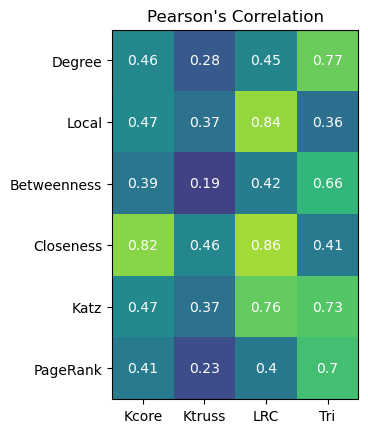

In [307]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-0.007, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Kcore', 'Ktruss', 'LRC', 'Tri'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('Degree', 'Local', 'Betweenness', 'Closeness', 'Katz', 'PageRank'))
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix[1])):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='w')
plt.title("Pearson's Correlation")
plt.show()


## Spearman

In [308]:
d1 = dict_degree
d2 = kcore_dict_eachNode_normalized

df = pd.DataFrame([d1, d2]).T
df.rename(columns={0: "Degree", 1: "Kcore"}, inplace=True)
df.head()

,Degree,Kcore
0,0.006098,0.333333
1,0.003049,0.333333
2,0.006098,0.333333
3,0.009146,0.666667
4,0.006098,0.666667


In [309]:
print("Spearman Correlation (Degree, Kcore) = ", spearmanr(df.Degree.values, df.Kcore.values))
print("Spearman Correlation (Degree, Ktruss) = ", spearmanr(degree_cent, ktruss_alone_cent))
print("Spearman Correlation (Degree, LRC) = ", spearmanr(degree_cent, lrc_alone_cent))
print("Spearman Correlation (Degree, Tri) = ", spearmanr(degree_cent, tri_alone_cent))

Spearman Correlation (Degree, Kcore) =  SpearmanrResult(correlation=0.9018509300964067, pvalue=3.2184158160091316e-121)
Spearman Correlation (Degree, Ktruss) =  SpearmanrResult(correlation=0.5156561859925108, pvalue=9.533573220688768e-24)
Spearman Correlation (Degree, LRC) =  SpearmanrResult(correlation=0.6335537350179082, pvalue=2.532810442381457e-38)
Spearman Correlation (Degree, Tri) =  SpearmanrResult(correlation=0.5279728212886197, pvalue=5.1865930229944895e-25)


In [310]:
degree = np.array(degree_cent)
b = np.array(df.Kcore.values)
c = np.array(ktruss_alone_cent)
d = np.array(lrc_alone_cent)
e = np.array(tri_alone_cent)

In [311]:
abcde = np.vstack((degree,b,c,d,e))
abcde

array([[0.00609756, 0.00304878, 0.00609756, ..., 0.00304878, 0.00304878,
        0.00914634],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
        1.        ],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.66666667, 0.66666667,
        0.66666667],
       [0.19540868, 0.16247602, 0.24287045, ..., 0.22576967, 0.22879679,
        0.25400004],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [312]:
corr_matrix_degree, p_matrix = spearmanr(abcde, axis=1)
for i in range(len(corr_matrix_degree)):
    for j in range(len(corr_matrix_degree[i])):
        corr_matrix_degree[j] = corr_matrix_degree[j].round(decimals=2)

In [313]:
corr_matrix_degree

array([[1.  , 0.9 , 0.52, 0.63, 0.53],
       [0.9 , 1.  , 0.56, 0.64, 0.57],
       [0.52, 0.56, 1.  , 0.41, 1.  ],
       [0.63, 0.64, 0.41, 1.  , 0.42],
       [0.53, 0.57, 1.  , 0.42, 1.  ]])

In [314]:
corr_matrix_degree[0]

array([1.  , 0.9 , 0.52, 0.63, 0.53])

In [315]:
corr_matrix_degree_clean = np.delete(corr_matrix_degree[0], 0)
corr_matrix_degree_clean 

array([0.9 , 0.52, 0.63, 0.53])

In [316]:
print("Spearman Correlation (Local, Kcore) = ", spearmanr(local_cent, df.Kcore.values))
print("Spearman Correlation (Local, Ktruss) = ", spearmanr(local_cent, ktruss_alone_cent))
print("Spearman Correlation (Local, LRC) = ", spearmanr(local_cent, lrc_alone_cent))
print("Spearman Correlation (Local, Tri) = ", spearmanr(local_cent, tri_alone_cent))

Spearman Correlation (Local, Kcore) =  SpearmanrResult(correlation=0.5758813254778671, pvalue=1.8649320931780384e-30)
Spearman Correlation (Local, Ktruss) =  SpearmanrResult(correlation=0.3802828217907067, pvalue=9.229225002625696e-13)
Spearman Correlation (Local, LRC) =  SpearmanrResult(correlation=0.8773405226563415, pvalue=2.6772740027976983e-106)
Spearman Correlation (Local, Tri) =  SpearmanrResult(correlation=0.3855739980681631, pvalue=4.1899268794972044e-13)


In [317]:
local = np.array(local_cent)
b = np.array(df.Kcore.values)
c = np.array(ktruss_alone_cent)
d = np.array(lrc_alone_cent)
e = np.array(tri_alone_cent)

In [318]:
abcde = np.vstack((local,b,c,d,e))
abcde

array([[4.40000000e+01, 1.80000000e+01, 6.22000000e+02, ...,
        9.57000000e+02, 1.34000000e+02, 5.15000000e+02],
       [3.33333333e-01, 3.33333333e-01, 3.33333333e-01, ...,
        3.33333333e-01, 3.33333333e-01, 1.00000000e+00],
       [6.66666667e-01, 6.66666667e-01, 6.66666667e-01, ...,
        6.66666667e-01, 6.66666667e-01, 6.66666667e-01],
       [1.95408682e-01, 1.62476023e-01, 2.42870451e-01, ...,
        2.25769674e-01, 2.28796788e-01, 2.54000040e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [319]:
corr_matrix_local, p_matrix = spearmanr(abcde, axis=1)
for i in range(len(corr_matrix_local)):
    for j in range(len(corr_matrix_local[i])):
        corr_matrix_local[j] = corr_matrix_local[j].round(decimals=2)

In [320]:
corr_matrix_local

array([[1.  , 0.58, 0.38, 0.88, 0.39],
       [0.58, 1.  , 0.56, 0.64, 0.57],
       [0.38, 0.56, 1.  , 0.41, 1.  ],
       [0.88, 0.64, 0.41, 1.  , 0.42],
       [0.39, 0.57, 1.  , 0.42, 1.  ]])

In [321]:
corr_matrix_local[0]

array([1.  , 0.58, 0.38, 0.88, 0.39])

In [322]:
corr_matrix_local_clean = np.delete(corr_matrix_local[0], 0)
corr_matrix_local_clean 

array([0.58, 0.38, 0.88, 0.39])

In [323]:
print("Spearman Correlation (Local, Kcore) = ", spearmanr(local_cent, df.Kcore.values))
print("Spearman Correlation (Local, Ktruss) = ", spearmanr(local_cent, ktruss_alone_cent))
print("Spearman Correlation (Local, LRC) = ", spearmanr(local_cent, lrc_alone_cent))
print("Spearman Correlation (Local, Tri) = ", spearmanr(local_cent, tri_alone_cent))

Spearman Correlation (Local, Kcore) =  SpearmanrResult(correlation=0.5758813254778671, pvalue=1.8649320931780384e-30)
Spearman Correlation (Local, Ktruss) =  SpearmanrResult(correlation=0.3802828217907067, pvalue=9.229225002625696e-13)
Spearman Correlation (Local, LRC) =  SpearmanrResult(correlation=0.8773405226563415, pvalue=2.6772740027976983e-106)
Spearman Correlation (Local, Tri) =  SpearmanrResult(correlation=0.3855739980681631, pvalue=4.1899268794972044e-13)


In [324]:
local = np.array(local_cent)
b = np.array(df.Kcore.values)
c = np.array(ktruss_alone_cent)
d = np.array(lrc_alone_cent)
e = np.array(tri_alone_cent)

In [325]:
abcde = np.vstack((local,b,c,d,e))
abcde

array([[4.40000000e+01, 1.80000000e+01, 6.22000000e+02, ...,
        9.57000000e+02, 1.34000000e+02, 5.15000000e+02],
       [3.33333333e-01, 3.33333333e-01, 3.33333333e-01, ...,
        3.33333333e-01, 3.33333333e-01, 1.00000000e+00],
       [6.66666667e-01, 6.66666667e-01, 6.66666667e-01, ...,
        6.66666667e-01, 6.66666667e-01, 6.66666667e-01],
       [1.95408682e-01, 1.62476023e-01, 2.42870451e-01, ...,
        2.25769674e-01, 2.28796788e-01, 2.54000040e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [326]:
corr_matrix_local, p_matrix = spearmanr(abcde, axis=1)
for i in range(len(corr_matrix_local)):
    for j in range(len(corr_matrix_local[i])):
        corr_matrix_local[j] = corr_matrix_local[j].round(decimals=2)

In [327]:
corr_matrix_local

array([[1.  , 0.58, 0.38, 0.88, 0.39],
       [0.58, 1.  , 0.56, 0.64, 0.57],
       [0.38, 0.56, 1.  , 0.41, 1.  ],
       [0.88, 0.64, 0.41, 1.  , 0.42],
       [0.39, 0.57, 1.  , 0.42, 1.  ]])

In [328]:
corr_matrix_local[0]

array([1.  , 0.58, 0.38, 0.88, 0.39])

In [329]:
corr_matrix_local_clean = np.delete(corr_matrix_local[0], 0)
corr_matrix_local_clean 

array([0.58, 0.38, 0.88, 0.39])

In [330]:
print("Spearman Correlation (Bet, Kcore) = ", spearmanr(bet_cent, df.Kcore.values))
print("Spearman Correlation (Bet, Ktruss) = ", spearmanr(bet_cent, ktruss_alone_cent))
print("Spearman Correlation (Bet, LRC) = ", spearmanr(bet_cent, lrc_alone_cent))
print("Spearman Correlation (Bet, Tri) = ", spearmanr(bet_cent, tri_alone_cent))

Spearman Correlation (Bet, Kcore) =  SpearmanrResult(correlation=0.7309944242649157, pvalue=3.210618421876311e-56)
Spearman Correlation (Bet, Ktruss) =  SpearmanrResult(correlation=0.20474566913981082, pvalue=0.00018453022796107368)
Spearman Correlation (Bet, LRC) =  SpearmanrResult(correlation=0.5261881323332739, pvalue=7.967113182791919e-25)
Spearman Correlation (Bet, Tri) =  SpearmanrResult(correlation=0.22968023241672672, pvalue=2.5931506308767152e-05)


In [331]:
bet = np.array(bet_cent)
b = np.array(df.Kcore.values)
c = np.array(ktruss_alone_cent)
d = np.array(lrc_alone_cent)
e = np.array(tri_alone_cent)

In [332]:
abcde = np.vstack((bet,b,c,d,e))
abcde

array([[6.09756098e-03, 0.00000000e+00, 1.21578280e-02, ...,
        0.00000000e+00, 0.00000000e+00, 8.50678054e-04],
       [3.33333333e-01, 3.33333333e-01, 3.33333333e-01, ...,
        3.33333333e-01, 3.33333333e-01, 1.00000000e+00],
       [6.66666667e-01, 6.66666667e-01, 6.66666667e-01, ...,
        6.66666667e-01, 6.66666667e-01, 6.66666667e-01],
       [1.95408682e-01, 1.62476023e-01, 2.42870451e-01, ...,
        2.25769674e-01, 2.28796788e-01, 2.54000040e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [333]:
corr_matrix_bet, p_matrix = spearmanr(abcde, axis=1)
for i in range(len(corr_matrix_bet)):
    for j in range(len(corr_matrix_bet[i])):
        corr_matrix_bet[j] = corr_matrix_bet[j].round(decimals=2)

In [334]:
corr_matrix_bet

array([[1.  , 0.73, 0.2 , 0.53, 0.23],
       [0.73, 1.  , 0.56, 0.64, 0.57],
       [0.2 , 0.56, 1.  , 0.41, 1.  ],
       [0.53, 0.64, 0.41, 1.  , 0.42],
       [0.23, 0.57, 1.  , 0.42, 1.  ]])

In [335]:
corr_matrix_bet[0]

array([1.  , 0.73, 0.2 , 0.53, 0.23])

In [336]:
corr_matrix_bet_clean = np.delete(corr_matrix_bet[0], 0)
corr_matrix_bet_clean 

array([0.73, 0.2 , 0.53, 0.23])

In [337]:
print("Spearman Correlation (Close, Kcore) = ", spearmanr(close_cent, df.Kcore.values))
print("Spearman Correlation (Close, Ktruss) = ", spearmanr(close_cent, ktruss_alone_cent))
print("Spearman Correlation (Close, LRC) = ", spearmanr(close_cent, lrc_alone_cent))
print("Spearman Correlation (Close, Tri) = ", spearmanr(close_cent, tri_alone_cent))

Spearman Correlation (Close, Kcore) =  SpearmanrResult(correlation=0.8309066677427009, pvalue=2.943043019833983e-85)
Spearman Correlation (Close, Ktruss) =  SpearmanrResult(correlation=0.46411208978853274, pvalue=5.59787596882403e-19)
Spearman Correlation (Close, LRC) =  SpearmanrResult(correlation=0.8670063020131468, pvalue=6.089635006299229e-101)
Spearman Correlation (Close, Tri) =  SpearmanrResult(correlation=0.47501591226670176, pvalue=6.387969023966454e-20)


In [338]:
close = np.array(close_cent)
b = np.array(df.Kcore.values)
c = np.array(ktruss_alone_cent)
d = np.array(lrc_alone_cent)
e = np.array(tri_alone_cent)

In [339]:
abcde = np.vstack((close,b,c,d,e))
abcde

array([[8.90586455e-04, 6.89723853e-04, 1.25335961e-03, ...,
        1.17882700e-03, 9.17146475e-04, 1.70428027e-03],
       [3.33333333e-01, 3.33333333e-01, 3.33333333e-01, ...,
        3.33333333e-01, 3.33333333e-01, 1.00000000e+00],
       [6.66666667e-01, 6.66666667e-01, 6.66666667e-01, ...,
        6.66666667e-01, 6.66666667e-01, 6.66666667e-01],
       [1.95408682e-01, 1.62476023e-01, 2.42870451e-01, ...,
        2.25769674e-01, 2.28796788e-01, 2.54000040e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [340]:
corr_matrix_close, p_matrix = spearmanr(abcde, axis=1)
for i in range(len(corr_matrix_close)):
    for j in range(len(corr_matrix_close[i])):
        corr_matrix_close[j] = corr_matrix_close[j].round(decimals=2)

In [341]:
corr_matrix_close

array([[1.  , 0.83, 0.46, 0.87, 0.48],
       [0.83, 1.  , 0.56, 0.64, 0.57],
       [0.46, 0.56, 1.  , 0.41, 1.  ],
       [0.87, 0.64, 0.41, 1.  , 0.42],
       [0.48, 0.57, 1.  , 0.42, 1.  ]])

In [342]:
corr_matrix_close[0]

array([1.  , 0.83, 0.46, 0.87, 0.48])

In [343]:
corr_matrix_close_clean = np.delete(corr_matrix_close[0], 0)
corr_matrix_close_clean 

array([0.83, 0.46, 0.87, 0.48])

In [344]:
print("Spearman Correlation (Katz, Kcore) = ", spearmanr(katz_cent, df.Kcore.values))
print("Spearman Correlation (Katz, Ktruss) = ", spearmanr(katz_cent, ktruss_alone_cent))
print("Spearman Correlation (Katz, LRC) = ", spearmanr(katz_cent, lrc_alone_cent))
print("Spearman Correlation (Katz, Tri) = ", spearmanr(katz_cent, tri_alone_cent))

Spearman Correlation (Katz, Kcore) =  SpearmanrResult(correlation=0.6907120790744888, pvalue=5.85240683444991e-48)
Spearman Correlation (Katz, Ktruss) =  SpearmanrResult(correlation=0.4468288090561374, pvalue=1.495524212294831e-17)
Spearman Correlation (Katz, LRC) =  SpearmanrResult(correlation=0.9632025212864653, pvalue=1.1791293241654022e-188)
Spearman Correlation (Katz, Tri) =  SpearmanrResult(correlation=0.4549526756971951, pvalue=3.2676264321002906e-18)


In [345]:
katz = np.array(katz_cent)
b = np.array(df.Kcore.values)
c = np.array(ktruss_alone_cent)
d = np.array(lrc_alone_cent)
e = np.array(tri_alone_cent)

In [346]:
abcde = np.vstack((katz,b,c,d,e))
abcde

array([[0.01358521, 0.01192716, 0.01823851, ..., 0.01872314, 0.01765725,
        0.03259563],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
        1.        ],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.66666667, 0.66666667,
        0.66666667],
       [0.19540868, 0.16247602, 0.24287045, ..., 0.22576967, 0.22879679,
        0.25400004],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [347]:
corr_matrix_katz, p_matrix = spearmanr(abcde, axis=1)
for i in range(len(corr_matrix_katz)):
    for j in range(len(corr_matrix_katz[i])):
        corr_matrix_katz[j] = corr_matrix_katz[j].round(decimals=2)

In [348]:
corr_matrix_katz

array([[1.  , 0.69, 0.45, 0.96, 0.45],
       [0.69, 1.  , 0.56, 0.64, 0.57],
       [0.45, 0.56, 1.  , 0.41, 1.  ],
       [0.96, 0.64, 0.41, 1.  , 0.42],
       [0.45, 0.57, 1.  , 0.42, 1.  ]])

In [349]:
corr_matrix_katz[0]

array([1.  , 0.69, 0.45, 0.96, 0.45])

In [350]:
corr_matrix_katz_clean = np.delete(corr_matrix_katz[0], 0)
corr_matrix_katz_clean 

array([0.69, 0.45, 0.96, 0.45])

In [351]:
print("Spearman Correlation (PageRank, Kcore) = ", spearmanr(pagerank_cent, df.Kcore.values))
print("Spearman Correlation (PageRank, Ktruss) = ", spearmanr(pagerank_cent, ktruss_alone_cent))
print("Spearman Correlation (PageRank, LRC) = ", spearmanr(pagerank_cent, lrc_alone_cent))
print("Spearman Correlation (PageRank, Tri) = ", spearmanr(pagerank_cent, tri_alone_cent))

Spearman Correlation (PageRank, Kcore) =  SpearmanrResult(correlation=0.7950163021596277, pvalue=5.6167528369155544e-73)
Spearman Correlation (PageRank, Ktruss) =  SpearmanrResult(correlation=0.44118610404671565, pvalue=4.2007705908634985e-17)
Spearman Correlation (PageRank, LRC) =  SpearmanrResult(correlation=0.43657982956758895, pvalue=9.623796554460585e-17)
Spearman Correlation (PageRank, Tri) =  SpearmanrResult(correlation=0.45400397232380424, pvalue=3.910976024103603e-18)


In [352]:
pagerank = np.array(pagerank_cent)
b = np.array(df.Kcore.values)
c = np.array(ktruss_alone_cent)
d = np.array(lrc_alone_cent)
e = np.array(tri_alone_cent)

In [353]:
abcde = np.vstack((pagerank,b,c,d,e))
abcde

array([[0.003019  , 0.0017393 , 0.00255349, ..., 0.00148182, 0.0015299 ,
        0.0026353 ],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
        1.        ],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.66666667, 0.66666667,
        0.66666667],
       [0.19540868, 0.16247602, 0.24287045, ..., 0.22576967, 0.22879679,
        0.25400004],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [354]:
corr_matrix_pagerank, p_matrix = spearmanr(abcde, axis=1)
for i in range(len(corr_matrix_pagerank)):
    for j in range(len(corr_matrix_pagerank[i])):
        corr_matrix_pagerank[j] = corr_matrix_pagerank[j].round(decimals=2)

In [355]:
corr_matrix_pagerank

array([[1.  , 0.8 , 0.44, 0.44, 0.45],
       [0.8 , 1.  , 0.56, 0.64, 0.57],
       [0.44, 0.56, 1.  , 0.41, 1.  ],
       [0.44, 0.64, 0.41, 1.  , 0.42],
       [0.45, 0.57, 1.  , 0.42, 1.  ]])

In [356]:
corr_matrix_pagerank[0]

array([1.  , 0.8 , 0.44, 0.44, 0.45])

In [357]:
corr_matrix_pagerank_clean = np.delete(corr_matrix_pagerank[0], 0)
corr_matrix_pagerank_clean 

array([0.8 , 0.44, 0.44, 0.45])

In [358]:
corr_matrix = np.vstack((corr_matrix_degree_clean,corr_matrix_local_clean, corr_matrix_bet_clean, corr_matrix_close_clean, 
                         corr_matrix_katz_clean, corr_matrix_pagerank_clean))
corr_matrix

array([[0.9 , 0.52, 0.63, 0.53],
       [0.58, 0.38, 0.88, 0.39],
       [0.73, 0.2 , 0.53, 0.23],
       [0.83, 0.46, 0.87, 0.48],
       [0.69, 0.45, 0.96, 0.45],
       [0.8 , 0.44, 0.44, 0.45]])

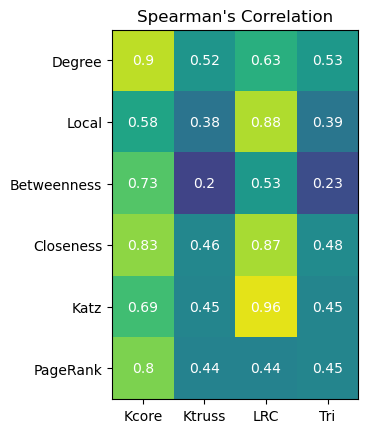

In [359]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-0.007, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Kcore', 'Ktruss', 'LRC', 'Tri'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('Degree', 'Local', 'Betweenness', 'Closeness', 'Katz', 'PageRank'))
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix[1])):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='w')

plt.title("Spearman's Correlation")
plt.show()


## Kendall

In [360]:
print("Kendall Tau Correlation (Degree, Kcore) = ", kendalltau(df.Degree.values, df.Kcore.values))
print("Kendall Tau Correlation (Degree, Ktruss) = ", kendalltau(degree_cent, ktruss_alone_cent))
print("Kendall Tau Correlation (Degree, LRC) = ", kendalltau(degree_cent, lrc_alone_cent))
print("Kendall Tau Correlation (Degree, Tri) = ", kendalltau(degree_cent, tri_alone_cent))

Kendall Tau Correlation (Degree, Kcore) =  KendalltauResult(correlation=0.8449648679419901, pvalue=2.351876834153128e-67)
Kendall Tau Correlation (Degree, Ktruss) =  KendalltauResult(correlation=0.475221665338458, pvalue=9.731187209126235e-21)
Kendall Tau Correlation (Degree, LRC) =  KendalltauResult(correlation=0.5042749690069235, pvalue=2.7226960516917494e-33)
Kendall Tau Correlation (Degree, Tri) =  KendalltauResult(correlation=0.49286103284772725, pvalue=5.284839169507141e-23)


In [361]:
degree = pd.Series(degree_cent)
b = pd.Series(df.Kcore.values)
c = pd.Series(ktruss_alone_cent)
d = pd.Series(lrc_alone_cent)
e = pd.Series(tri_alone_cent)

In [362]:
abcde = pd.DataFrame({'Degree': degree,'Kcore': b, 'Ktruss': c, 'LRC': d, 'Tri':e})
abcde

,Degree,Kcore,Ktruss,LRC,Tri
0,0.006098,0.333333,0.666667,0.195409,0
1,0.003049,0.333333,0.666667,0.162476,0
2,0.006098,0.333333,0.666667,0.242870,0
3,0.009146,0.666667,1.000000,0.272480,1
4,0.006098,0.666667,1.000000,0.249851,1
...,...,...,...,...,...
324,0.003049,0.333333,0.666667,0.225770,0
325,0.003049,0.333333,0.666667,0.225770,0
326,0.003049,0.333333,0.666667,0.225770,0
327,0.003049,0.333333,0.666667,0.228797,0


In [363]:
corr_matrix_degree = pd.DataFrame()
corr_matrix_degree = abcde.corr(method='kendall')
corr_matrix_degree

,Degree,Kcore,Ktruss,LRC,Tri
Degree,1.000000,0.844965,0.475222,0.504275,0.492861
Kcore,0.844965,1.000000,0.538313,0.521721,0.540839
Ktruss,0.475222,0.538313,1.000000,0.336458,0.976388
LRC,0.504275,0.521721,0.336458,1.000000,0.341777
Tri,0.492861,0.540839,0.976388,0.341777,1.000000


In [364]:
corr_matrix_degree = corr_matrix_degree.to_numpy()
corr_matrix_degree

array([[1.        , 0.84496487, 0.47522167, 0.50427497, 0.49286103],
       [0.84496487, 1.        , 0.53831328, 0.52172057, 0.54083865],
       [0.47522167, 0.53831328, 1.        , 0.33645833, 0.9763879 ],
       [0.50427497, 0.52172057, 0.33645833, 1.        , 0.34177733],
       [0.49286103, 0.54083865, 0.9763879 , 0.34177733, 1.        ]])

In [365]:
corr_matrix_degree = corr_matrix_degree[0]
corr_matrix_degree

array([1.        , 0.84496487, 0.47522167, 0.50427497, 0.49286103])

In [366]:
for i in range(len(corr_matrix_degree)):
    corr_matrix_degree[i] = corr_matrix_degree[i].round(decimals=2)
corr_matrix_degree = corr_matrix_degree.tolist()
corr_matrix_degree

[1.0, 0.84, 0.48, 0.5, 0.49]

In [367]:
corr_matrix_degree.pop(0)
corr_matrix_degree

[0.84, 0.48, 0.5, 0.49]

In [368]:
corr_matrix_degree_clean = np.array(corr_matrix_degree)
corr_matrix_degree_clean

array([0.84, 0.48, 0.5 , 0.49])

In [369]:
print("Kendall Tau Correlation (Local, Kcore) = ",  kendalltau(local_cent, df.Kcore.values))
print("Kendall Tau Correlation (Local, Ktruss) = ", kendalltau(local_cent, ktruss_alone_cent))
print("Kendall Tau Correlation (Local, LRC) = ", kendalltau(local_cent, lrc_alone_cent))
print("Kendall Tau Correlation (Local, Tri) = ", kendalltau(local_cent, tri_alone_cent))

Kendall Tau Correlation (Local, Kcore) =  KendalltauResult(correlation=0.4596282643146149, pvalue=4.927436823233164e-26)
Kendall Tau Correlation (Local, Ktruss) =  KendalltauResult(correlation=0.3132213031601366, pvalue=5.689527253294322e-12)
Kendall Tau Correlation (Local, LRC) =  KendalltauResult(correlation=0.7216847299143474, pvalue=1.6298972368342635e-82)
Kendall Tau Correlation (Local, Tri) =  KendalltauResult(correlation=0.3135204338612032, pvalue=2.0779772506506624e-12)


In [370]:
local = pd.Series(local_cent)
b = pd.Series(df.Kcore.values)
c = pd.Series(ktruss_alone_cent)
d = pd.Series(lrc_alone_cent)
e = pd.Series(tri_alone_cent)

In [371]:
abcde = pd.DataFrame({'Local': local,'Kcore': b, 'Ktruss': c, 'LRC': d, 'Tri':e})
abcde

,Local,Kcore,Ktruss,LRC,Tri
0,44,0.333333,0.666667,0.195409,0
1,18,0.333333,0.666667,0.162476,0
2,622,0.333333,0.666667,0.242870,0
3,1649,0.666667,1.000000,0.272480,1
4,1070,0.666667,1.000000,0.249851,1
...,...,...,...,...,...
324,957,0.333333,0.666667,0.225770,0
325,957,0.333333,0.666667,0.225770,0
326,957,0.333333,0.666667,0.225770,0
327,134,0.333333,0.666667,0.228797,0


In [372]:
corr_matrix_local = pd.DataFrame()
corr_matrix_local = abcde.corr(method='kendall')
corr_matrix_local

,Local,Kcore,Ktruss,LRC,Tri
Local,1.000000,0.459628,0.313221,0.721685,0.313520
Kcore,0.459628,1.000000,0.538313,0.521721,0.540839
Ktruss,0.313221,0.538313,1.000000,0.336458,0.976388
LRC,0.721685,0.521721,0.336458,1.000000,0.341777
Tri,0.313520,0.540839,0.976388,0.341777,1.000000


In [373]:
corr_matrix_local = corr_matrix_local.to_numpy()
corr_matrix_local

array([[1.        , 0.45962826, 0.3132213 , 0.72168473, 0.31352043],
       [0.45962826, 1.        , 0.53831328, 0.52172057, 0.54083865],
       [0.3132213 , 0.53831328, 1.        , 0.33645833, 0.9763879 ],
       [0.72168473, 0.52172057, 0.33645833, 1.        , 0.34177733],
       [0.31352043, 0.54083865, 0.9763879 , 0.34177733, 1.        ]])

In [374]:
corr_matrix_local = corr_matrix_local[0]
corr_matrix_local

array([1.        , 0.45962826, 0.3132213 , 0.72168473, 0.31352043])

In [375]:
for i in range(len(corr_matrix_local)):
    corr_matrix_local[i] = corr_matrix_local[i].round(decimals=2)
corr_matrix_local = corr_matrix_local.tolist()
corr_matrix_local

[1.0, 0.46, 0.31, 0.72, 0.31]

In [376]:
corr_matrix_local.pop(0)
corr_matrix_local

[0.46, 0.31, 0.72, 0.31]

In [377]:
corr_matrix_local_clean = np.array(corr_matrix_local)
corr_matrix_local_clean

array([0.46, 0.31, 0.72, 0.31])

In [378]:
print("Kendall Tau Correlation (Bet, Kcore) = ", kendalltau(bet_cent, df.Kcore.values))
print("Kendall Tau Correlation (Bet, Ktruss) = ", kendalltau(bet_cent, ktruss_alone_cent))
print("Kendall Tau Correlation (Bet, LRC) = ", kendalltau(bet_cent, lrc_alone_cent))
print("Kendall Tau Correlation (Bet, Tri) = ", kendalltau(bet_cent, tri_alone_cent))

Kendall Tau Correlation (Bet, Kcore) =  KendalltauResult(correlation=0.653819557387755, pvalue=2.2925544791924067e-42)
Kendall Tau Correlation (Bet, Ktruss) =  KendalltauResult(correlation=0.185598282138163, pvalue=0.00020881872948164462)
Kendall Tau Correlation (Bet, LRC) =  KendalltauResult(correlation=0.4152479912863979, pvalue=7.9720937070301e-24)
Kendall Tau Correlation (Bet, Tri) =  KendalltauResult(correlation=0.2056730264863824, pvalue=2.7896491618821687e-05)


In [379]:
bet = pd.Series(bet_cent)
b = pd.Series(df.Kcore.values)
c = pd.Series(ktruss_alone_cent)
d = pd.Series(lrc_alone_cent)
e = pd.Series(tri_alone_cent)

In [380]:
abcde = pd.DataFrame({'Bet': bet,'Kcore': b, 'Ktruss': c, 'LRC': d, 'Tri':e})
abcde

,Bet,Kcore,Ktruss,LRC,Tri
0,0.006098,0.333333,0.666667,0.195409,0
1,0.000000,0.333333,0.666667,0.162476,0
2,0.012158,0.333333,0.666667,0.242870,0
3,0.010434,0.666667,1.000000,0.272480,1
4,0.000000,0.666667,1.000000,0.249851,1
...,...,...,...,...,...
324,0.000000,0.333333,0.666667,0.225770,0
325,0.000000,0.333333,0.666667,0.225770,0
326,0.000000,0.333333,0.666667,0.225770,0
327,0.000000,0.333333,0.666667,0.228797,0


In [381]:
corr_matrix_bet = pd.DataFrame()
corr_matrix_bet = abcde.corr(method='kendall')
corr_matrix_bet

,Bet,Kcore,Ktruss,LRC,Tri
Bet,1.000000,0.653820,0.185598,0.415248,0.205673
Kcore,0.653820,1.000000,0.538313,0.521721,0.540839
Ktruss,0.185598,0.538313,1.000000,0.336458,0.976388
LRC,0.415248,0.521721,0.336458,1.000000,0.341777
Tri,0.205673,0.540839,0.976388,0.341777,1.000000


In [382]:
corr_matrix_bet = corr_matrix_bet.to_numpy()
corr_matrix_bet

array([[1.        , 0.65381956, 0.18559828, 0.41524799, 0.20567303],
       [0.65381956, 1.        , 0.53831328, 0.52172057, 0.54083865],
       [0.18559828, 0.53831328, 1.        , 0.33645833, 0.9763879 ],
       [0.41524799, 0.52172057, 0.33645833, 1.        , 0.34177733],
       [0.20567303, 0.54083865, 0.9763879 , 0.34177733, 1.        ]])

In [383]:
corr_matrix_bet = corr_matrix_bet[0]
corr_matrix_bet

array([1.        , 0.65381956, 0.18559828, 0.41524799, 0.20567303])

In [384]:
for i in range(len(corr_matrix_bet)):
    corr_matrix_bet[i] = corr_matrix_bet[i].round(decimals=2)
corr_matrix_bet = corr_matrix_bet.tolist()
corr_matrix_bet

[1.0, 0.65, 0.19, 0.42, 0.21]

In [385]:
corr_matrix_bet.pop(0)
corr_matrix_bet

[0.65, 0.19, 0.42, 0.21]

In [386]:
corr_matrix_bet_clean = np.array(corr_matrix_bet)
corr_matrix_bet_clean

array([0.65, 0.19, 0.42, 0.21])

In [387]:
print("Kendall Tau Correlation (Close, Kcore) = ", kendalltau(close_cent, df.Kcore.values))
print("Kendall Tau Correlation (Close, Ktruss) = ", kendalltau(close_cent, ktruss_alone_cent))
print("Kendall Tau Correlation (Close, LRC) = ", kendalltau(close_cent, lrc_alone_cent))
print("Kendall Tau Correlation (Close, Tri) = ", kendalltau(close_cent, tri_alone_cent))

Kendall Tau Correlation (Close, Kcore) =  KendalltauResult(correlation=0.698886899019736, pvalue=1.2034667851050865e-58)
Kendall Tau Correlation (Close, Ktruss) =  KendalltauResult(correlation=0.3798912688189052, pvalue=4.2630605833242865e-17)
Kendall Tau Correlation (Close, LRC) =  KendalltauResult(correlation=0.6995081510639694, pvalue=1.3951200579457747e-78)
Kendall Tau Correlation (Close, Tri) =  KendalltauResult(correlation=0.3912210500568878, pvalue=1.0844002669046396e-18)


In [388]:
close = pd.Series(close_cent)
b = pd.Series(df.Kcore.values)
c = pd.Series(ktruss_alone_cent)
d = pd.Series(lrc_alone_cent)
e = pd.Series(tri_alone_cent)

In [389]:
abcde = pd.DataFrame({'Close': close,'Kcore': b, 'Ktruss': c, 'LRC': d, 'Tri':e})
abcde

,Close,Kcore,Ktruss,LRC,Tri
0,0.000891,0.333333,0.666667,0.195409,0
1,0.000690,0.333333,0.666667,0.162476,0
2,0.001253,0.333333,0.666667,0.242870,0
3,0.001740,0.666667,1.000000,0.272480,1
4,0.001549,0.666667,1.000000,0.249851,1
...,...,...,...,...,...
324,0.001179,0.333333,0.666667,0.225770,0
325,0.001179,0.333333,0.666667,0.225770,0
326,0.001179,0.333333,0.666667,0.225770,0
327,0.000917,0.333333,0.666667,0.228797,0


In [390]:
corr_matrix_close = pd.DataFrame()
corr_matrix_close = abcde.corr(method='kendall')
corr_matrix_close

,Close,Kcore,Ktruss,LRC,Tri
Close,1.000000,0.698887,0.379891,0.699508,0.391221
Kcore,0.698887,1.000000,0.538313,0.521721,0.540839
Ktruss,0.379891,0.538313,1.000000,0.336458,0.976388
LRC,0.699508,0.521721,0.336458,1.000000,0.341777
Tri,0.391221,0.540839,0.976388,0.341777,1.000000


In [391]:
corr_matrix_close = corr_matrix_close.to_numpy()
corr_matrix_close

array([[1.        , 0.6988869 , 0.37989127, 0.69950815, 0.39122105],
       [0.6988869 , 1.        , 0.53831328, 0.52172057, 0.54083865],
       [0.37989127, 0.53831328, 1.        , 0.33645833, 0.9763879 ],
       [0.69950815, 0.52172057, 0.33645833, 1.        , 0.34177733],
       [0.39122105, 0.54083865, 0.9763879 , 0.34177733, 1.        ]])

In [392]:
corr_matrix_close = corr_matrix_close[0]
corr_matrix_close

array([1.        , 0.6988869 , 0.37989127, 0.69950815, 0.39122105])

In [393]:
for i in range(len(corr_matrix_close)):
    corr_matrix_close[i] = corr_matrix_close[i].round(decimals=2)
corr_matrix_close = corr_matrix_close.tolist()
corr_matrix_close

[1.0, 0.7, 0.38, 0.7, 0.39]

In [394]:
corr_matrix_close.pop(0)
corr_matrix_close

[0.7, 0.38, 0.7, 0.39]

In [395]:
corr_matrix_close_clean = np.array(corr_matrix_close)
corr_matrix_close_clean

array([0.7 , 0.38, 0.7 , 0.39])

In [396]:
print("Kendall Tau Correlation (Katz, Kcore) = ", kendalltau(katz_cent, df.Kcore.values))
print("Kendall Tau Correlation (Katz, Ktruss) = ", kendalltau(katz_cent, ktruss_alone_cent))
print("Kendall Tau Correlation (Katz, LRC) = ", kendalltau(katz_cent, lrc_alone_cent))
print("Kendall Tau Correlation (Katz, Tri) = ", kendalltau(katz_cent, tri_alone_cent))

Kendall Tau Correlation (Katz, Kcore) =  KendalltauResult(correlation=0.5568012927107955, pvalue=7.265684809084784e-38)
Kendall Tau Correlation (Katz, Ktruss) =  KendalltauResult(correlation=0.3657660591052927, pvalue=5.849374143100985e-16)
Kendall Tau Correlation (Katz, LRC) =  KendalltauResult(correlation=0.8466764747011771, pvalue=3.2200098598409825e-114)
Kendall Tau Correlation (Katz, Tri) =  KendalltauResult(correlation=0.3719055571724729, pvalue=4.87025368726315e-17)


In [397]:
katz = pd.Series(katz_cent)
b = pd.Series(df.Kcore.values)
c = pd.Series(ktruss_alone_cent)
d = pd.Series(lrc_alone_cent)
e = pd.Series(tri_alone_cent)

In [398]:
abcde = pd.DataFrame({'Katz': katz,'Kcore': b, 'Ktruss': c, 'LRC': d, 'Tri':e})
abcde

,Katz,Kcore,Ktruss,LRC,Tri
0,0.013585,0.333333,0.666667,0.195409,0
1,0.011927,0.333333,0.666667,0.162476,0
2,0.018239,0.333333,0.666667,0.242870,0
3,0.030654,0.666667,1.000000,0.272480,1
4,0.024916,0.666667,1.000000,0.249851,1
...,...,...,...,...,...
324,0.018723,0.333333,0.666667,0.225770,0
325,0.018723,0.333333,0.666667,0.225770,0
326,0.018723,0.333333,0.666667,0.225770,0
327,0.017657,0.333333,0.666667,0.228797,0


In [399]:
corr_matrix_katz = pd.DataFrame()
corr_matrix_katz = abcde.corr(method='kendall')
corr_matrix_katz

,Katz,Kcore,Ktruss,LRC,Tri
Katz,1.000000,0.556801,0.365766,0.846676,0.371906
Kcore,0.556801,1.000000,0.538313,0.521721,0.540839
Ktruss,0.365766,0.538313,1.000000,0.336458,0.976388
LRC,0.846676,0.521721,0.336458,1.000000,0.341777
Tri,0.371906,0.540839,0.976388,0.341777,1.000000


In [400]:
corr_matrix_katz = corr_matrix_katz.to_numpy()
corr_matrix_katz

array([[1.        , 0.55680129, 0.36576606, 0.84667647, 0.37190556],
       [0.55680129, 1.        , 0.53831328, 0.52172057, 0.54083865],
       [0.36576606, 0.53831328, 1.        , 0.33645833, 0.9763879 ],
       [0.84667647, 0.52172057, 0.33645833, 1.        , 0.34177733],
       [0.37190556, 0.54083865, 0.9763879 , 0.34177733, 1.        ]])

In [401]:
corr_matrix_katz = corr_matrix_katz[0]
corr_matrix_katz

array([1.        , 0.55680129, 0.36576606, 0.84667647, 0.37190556])

In [402]:
for i in range(len(corr_matrix_katz)):
    corr_matrix_katz[i] = corr_matrix_katz[i].round(decimals=2)
corr_matrix_katz = corr_matrix_katz.tolist()
corr_matrix_katz

[1.0, 0.56, 0.37, 0.85, 0.37]

In [403]:
corr_matrix_katz.pop(0)
corr_matrix_katz

[0.56, 0.37, 0.85, 0.37]

In [404]:
corr_matrix_katz_clean = np.array(corr_matrix_katz)
corr_matrix_katz_clean

array([0.56, 0.37, 0.85, 0.37])

In [405]:
print("Kendall Tau Correlation (PageRank, Kcore) = ",  kendalltau(pagerank_cent, df.Kcore.values))
print("Kendall Tau Correlation (PageRank, Ktruss) = ",  kendalltau(pagerank_cent, ktruss_alone_cent))
print("Kendall Tau Correlation (PageRank, LRC) = ",  kendalltau(pagerank_cent, lrc_alone_cent))
print("Kendall Tau Correlation (PageRank, Tri) = ",  kendalltau(pagerank_cent, tri_alone_cent))

Kendall Tau Correlation (PageRank, Kcore) =  KendalltauResult(correlation=0.6605865031305381, pvalue=5.5850612753826205e-52)
Kendall Tau Correlation (PageRank, Ktruss) =  KendalltauResult(correlation=0.3633063460358609, pvalue=1.3469796655785617e-15)
Kendall Tau Correlation (PageRank, LRC) =  KendalltauResult(correlation=0.2812830272115856, pvalue=6.306214860489781e-14)
Kendall Tau Correlation (PageRank, Tri) =  KendalltauResult(correlation=0.3782600808650621, pvalue=2.2052079646488672e-17)


In [406]:
pagerank = pd.Series(pagerank_cent)
b = pd.Series(df.Kcore.values)
c = pd.Series(ktruss_alone_cent)
d = pd.Series(lrc_alone_cent)
e = pd.Series(tri_alone_cent)

In [407]:
abcde = pd.DataFrame({'PageRank': pagerank,'Kcore': b, 'Ktruss': c, 'LRC': d, 'Tri':e})
abcde

,PageRank,Kcore,Ktruss,LRC,Tri
0,0.003019,0.333333,0.666667,0.195409,0
1,0.001739,0.333333,0.666667,0.162476,0
2,0.002553,0.333333,0.666667,0.242870,0
3,0.002813,0.666667,1.000000,0.272480,1
4,0.001962,0.666667,1.000000,0.249851,1
...,...,...,...,...,...
324,0.001482,0.333333,0.666667,0.225770,0
325,0.001482,0.333333,0.666667,0.225770,0
326,0.001482,0.333333,0.666667,0.225770,0
327,0.001530,0.333333,0.666667,0.228797,0


In [408]:
corr_matrix_pagerank = pd.DataFrame()
corr_matrix_pagerank = abcde.corr(method='kendall')
corr_matrix_pagerank

,PageRank,Kcore,Ktruss,LRC,Tri
PageRank,1.000000,0.660587,0.363306,0.281283,0.378260
Kcore,0.660587,1.000000,0.538313,0.521721,0.540839
Ktruss,0.363306,0.538313,1.000000,0.336458,0.976388
LRC,0.281283,0.521721,0.336458,1.000000,0.341777
Tri,0.378260,0.540839,0.976388,0.341777,1.000000


In [409]:
corr_matrix_pagerank = corr_matrix_pagerank.to_numpy()
corr_matrix_pagerank

array([[1.        , 0.6605865 , 0.36330635, 0.28128303, 0.37826008],
       [0.6605865 , 1.        , 0.53831328, 0.52172057, 0.54083865],
       [0.36330635, 0.53831328, 1.        , 0.33645833, 0.9763879 ],
       [0.28128303, 0.52172057, 0.33645833, 1.        , 0.34177733],
       [0.37826008, 0.54083865, 0.9763879 , 0.34177733, 1.        ]])

In [410]:
corr_matrix_pagerank = corr_matrix_pagerank[0]
corr_matrix_pagerank

array([1.        , 0.6605865 , 0.36330635, 0.28128303, 0.37826008])

In [411]:
for i in range(len(corr_matrix_pagerank)):
    corr_matrix_pagerank[i] = corr_matrix_pagerank[i].round(decimals=2)
corr_matrix_pagerank = corr_matrix_pagerank.tolist()
corr_matrix_pagerank

[1.0, 0.66, 0.36, 0.28, 0.38]

In [412]:
corr_matrix_pagerank.pop(0)
corr_matrix_pagerank

[0.66, 0.36, 0.28, 0.38]

In [413]:
corr_matrix_pagerank_clean = np.array(corr_matrix_pagerank)
corr_matrix_pagerank_clean

array([0.66, 0.36, 0.28, 0.38])

In [414]:
corr_matrix = np.vstack((corr_matrix_degree_clean,corr_matrix_local_clean, corr_matrix_bet_clean, corr_matrix_close_clean, 
                         corr_matrix_katz_clean, corr_matrix_pagerank_clean))
corr_matrix

array([[0.84, 0.48, 0.5 , 0.49],
       [0.46, 0.31, 0.72, 0.31],
       [0.65, 0.19, 0.42, 0.21],
       [0.7 , 0.38, 0.7 , 0.39],
       [0.56, 0.37, 0.85, 0.37],
       [0.66, 0.36, 0.28, 0.38]])

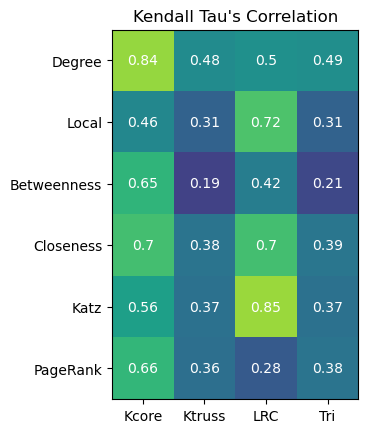

In [415]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-0.007, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Kcore', 'Ktruss', 'LRC', 'Tri'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('Degree', 'Local', 'Betweenness', 'Closeness', 'Katz', 'PageRank'))
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix[1])):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='w')
plt.title("Kendall Tau's Correlation")
plt.show()


# Visualization of Centrality and Hierarchy Distribution and Scatter Plots

(array([312.,  10.,   4.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00304878, 0.02469512, 0.04634146, 0.0679878 , 0.08963415,
        0.11128049, 0.13292683, 0.15457317, 0.17621951, 0.19786585,
        0.2195122 ]),
 <BarContainer object of 10 artists>)

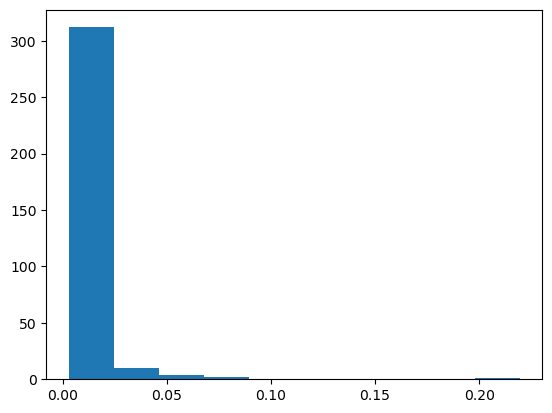

In [416]:
plt.hist(degree)

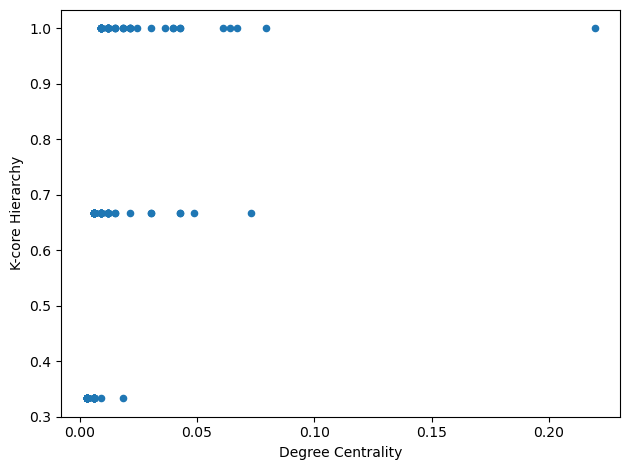

In [417]:
# Degree, Kcore
x = np.array(degree)
y = np.array(df.Kcore.values)


plt.scatter(x, y, s=20)

plt.xlabel('Degree Centrality')
plt.ylabel('K-core Hierarchy')

plt.tight_layout()
plt.show()

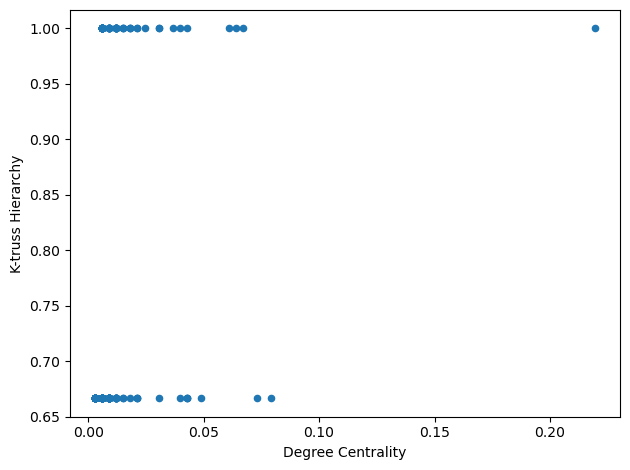

In [418]:
# Degree, Ktruss
x = np.array(degree)
y = np.array(ktruss_alone_cent)


plt.scatter(x, y, s=20)

plt.xlabel('Degree Centrality')
plt.ylabel('K-truss Hierarchy')

plt.tight_layout()
plt.show()

In [419]:
# Degree, LRC

(array([  6.,  32.,  77., 106.,  26.,  66.,  15.,   0.,   0.,   1.]),
 array([0.11002258, 0.14724731, 0.18447204, 0.22169677, 0.25892151,
        0.29614624, 0.33337097, 0.3705957 , 0.40782043, 0.44504516,
        0.48226989]),
 <BarContainer object of 10 artists>)

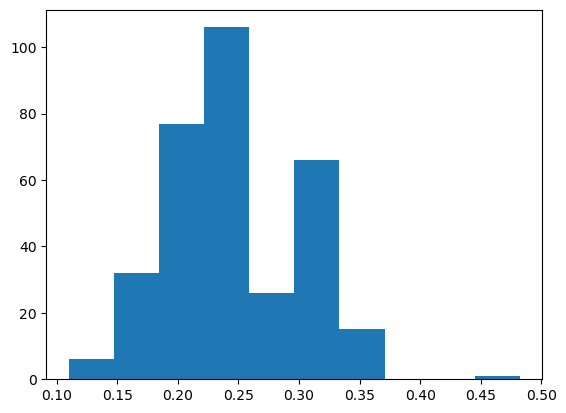

In [420]:
plt.hist(lrc_alone_cent)

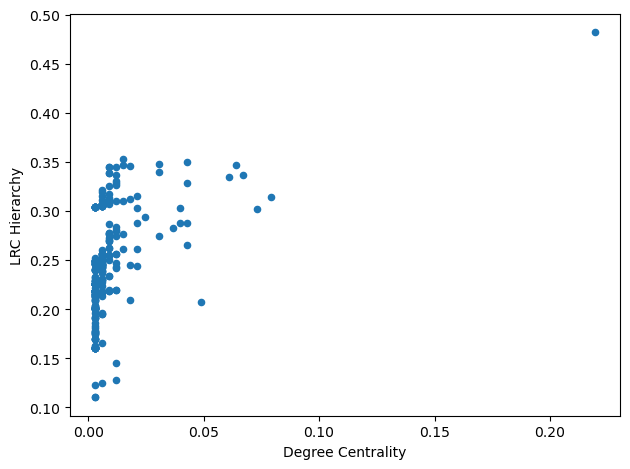

In [421]:
# Degree, LRC
x = np.array(degree)
y = lrc_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('Degree Centrality')
plt.ylabel('LRC Hierarchy')

plt.tight_layout()
plt.show()

In [422]:
# Degree, Tri

(array([314.,   7.,   3.,   3.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

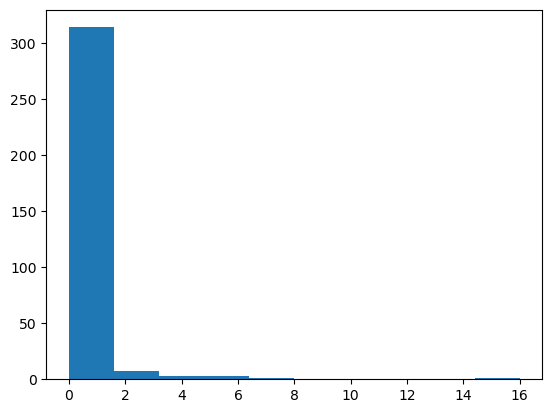

In [423]:
plt.hist(tri_alone_cent)

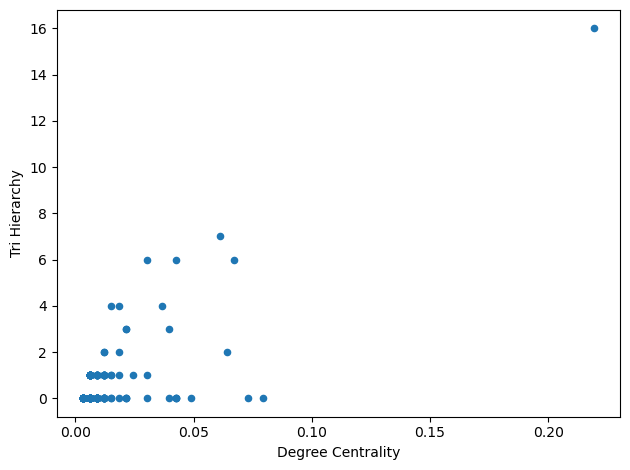

In [424]:
# Degree, tri 
x = np.array(degree)
y = tri_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('Degree Centrality')
plt.ylabel('Tri Hierarchy')

plt.tight_layout()
plt.show()

(array([227.,  22.,   6.,   1.,  58.,  12.,   2.,   0.,   0.,   1.]),
 array([   18. ,  1416.9,  2815.8,  4214.7,  5613.6,  7012.5,  8411.4,
         9810.3, 11209.2, 12608.1, 14007. ]),
 <BarContainer object of 10 artists>)

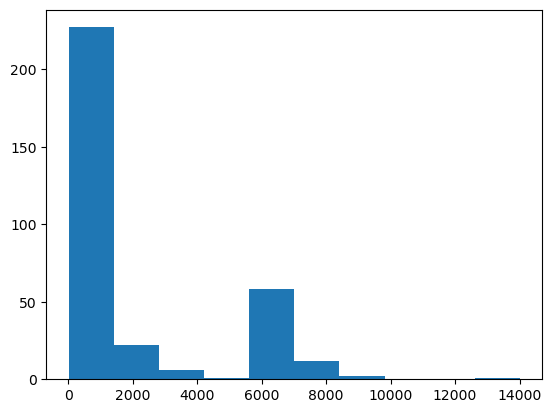

In [425]:
plt.hist(local)

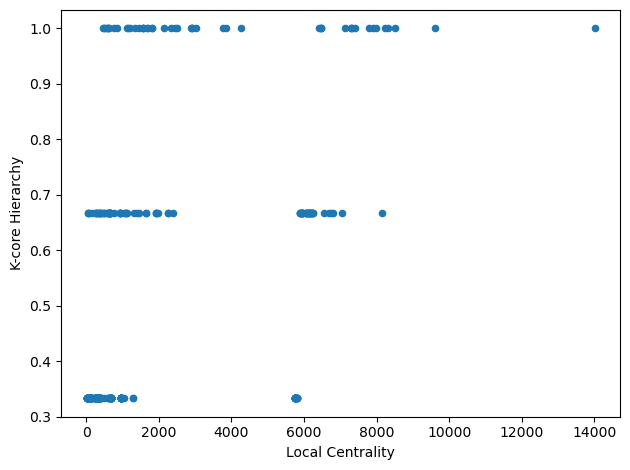

In [426]:
# Local, Kcore
x = np.array(local)
y = np.array(df.Kcore.values)


plt.scatter(x, y, s=20)

plt.xlabel('Local Centrality')
plt.ylabel('K-core Hierarchy')

plt.tight_layout()
plt.show()

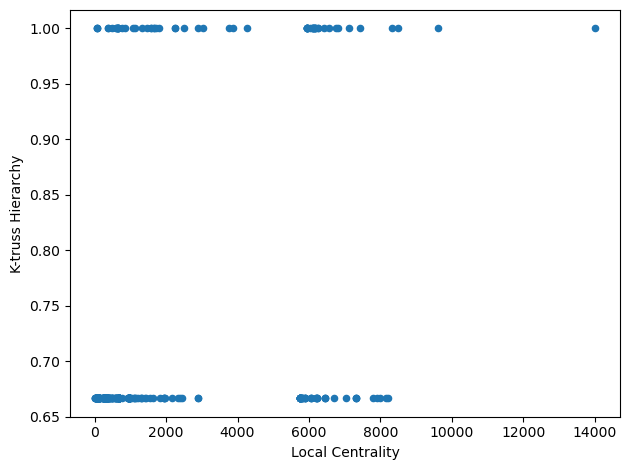

In [427]:
# Local, Ktruss
x = np.array(local)
y = np.array(ktruss_alone_cent)


plt.scatter(x, y, s=20)

plt.xlabel('Local Centrality')
plt.ylabel('K-truss Hierarchy')

plt.tight_layout()
plt.show()

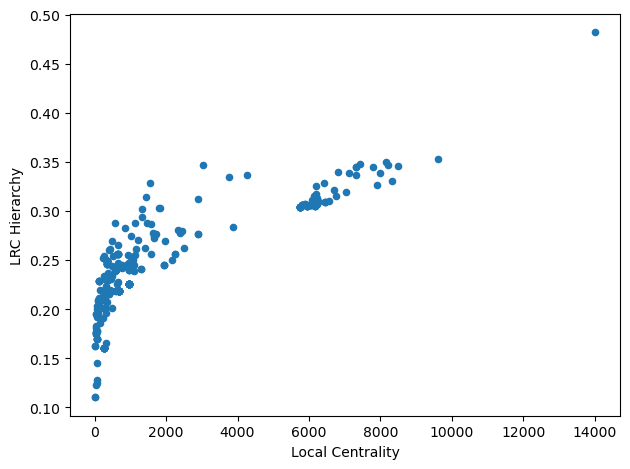

In [428]:
# Local, LRC
x = np.array(local)
y = lrc_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('Local Centrality')
plt.ylabel('LRC Hierarchy')

plt.tight_layout()
plt.show()

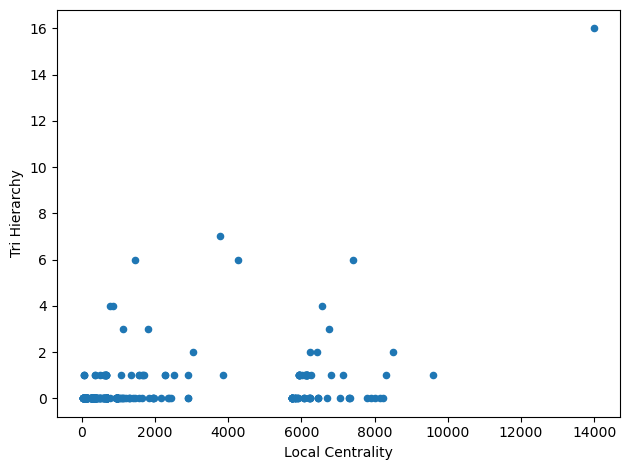

In [429]:
# Local, tri 
x = np.array(local)
y = tri_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('Local Centrality')
plt.ylabel('Tri Hierarchy')

plt.tight_layout()
plt.show()

(array([312.,   8.,   6.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.05841952, 0.11683904, 0.17525856, 0.23367808,
        0.29209761, 0.35051713, 0.40893665, 0.46735617, 0.52577569,
        0.58419521]),
 <BarContainer object of 10 artists>)

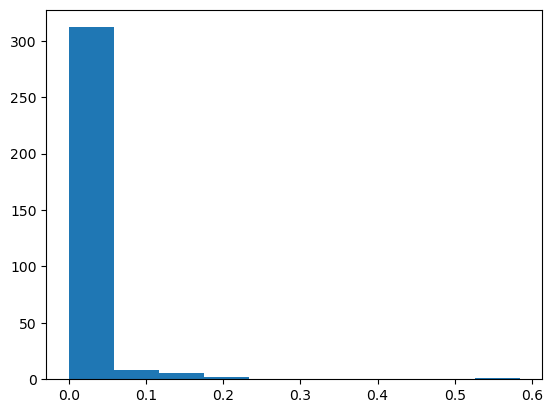

In [430]:
plt.hist(bet)

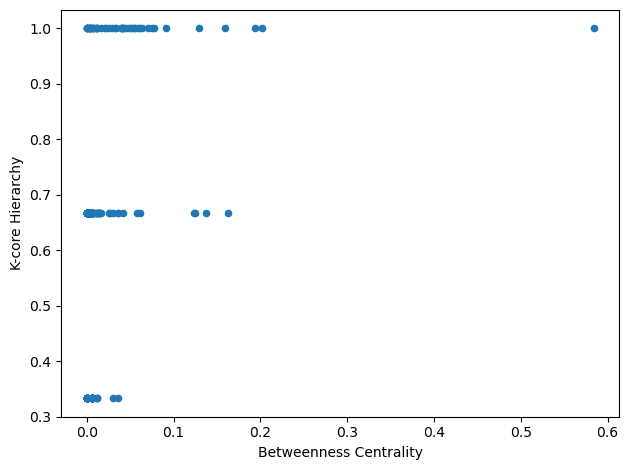

In [431]:
# Bet, Kcore
x = np.array(bet)
y = np.array(df.Kcore.values)


plt.scatter(x, y, s=20)

plt.xlabel('Betweenness Centrality')
plt.ylabel('K-core Hierarchy')

plt.tight_layout()
plt.show()

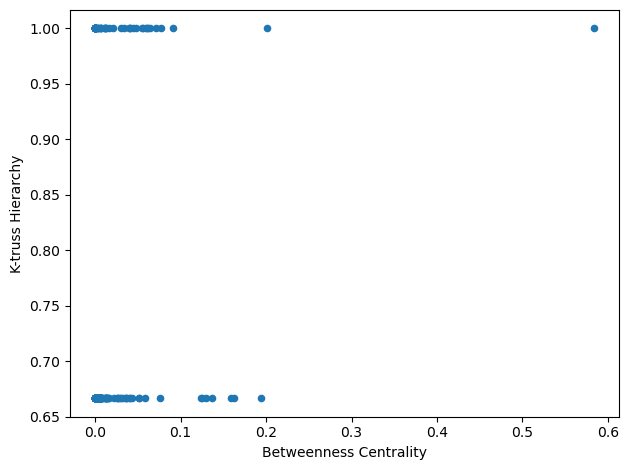

In [432]:
# Bet, Ktruss
x = np.array(bet)
y = np.array(ktruss_alone_cent)


plt.scatter(x, y, s=20)

plt.xlabel('Betweenness Centrality')
plt.ylabel('K-truss Hierarchy')

plt.tight_layout()
plt.show()

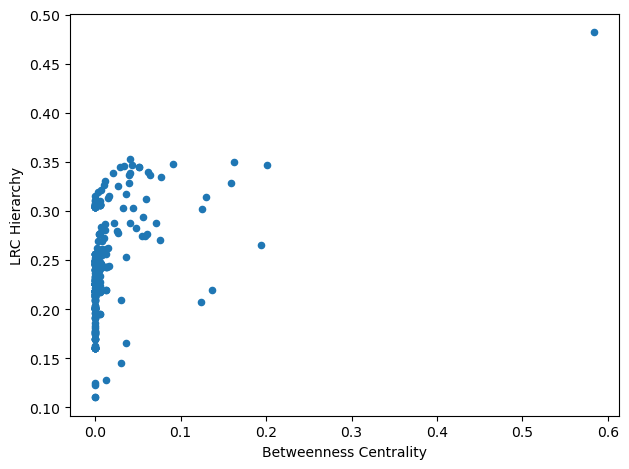

In [433]:
# Bet, LRC
x = np.array(bet)
y = lrc_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('Betweenness Centrality')
plt.ylabel('LRC Hierarchy')

plt.tight_layout()
plt.show()

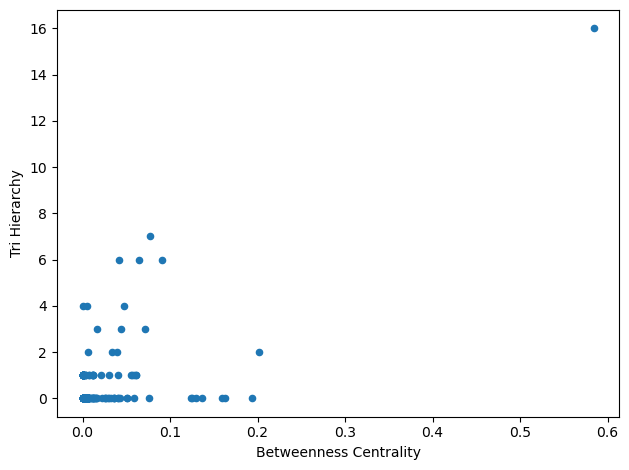

In [434]:
# Bet, tri 
x = np.array(bet)
y = tri_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('Betweenness Centrality')
plt.ylabel('Tri Hierarchy')

plt.tight_layout()
plt.show()

(array([ 6., 22., 23., 83., 62., 37., 47., 34., 10.,  5.]),
 array([0.00043789, 0.00062223, 0.00080658, 0.00099092, 0.00117527,
        0.00135962, 0.00154396, 0.00172831, 0.00191265, 0.002097  ,
        0.00228134]),
 <BarContainer object of 10 artists>)

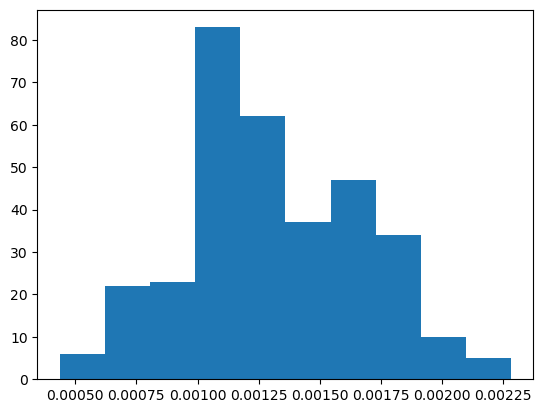

In [435]:
plt.hist(close)

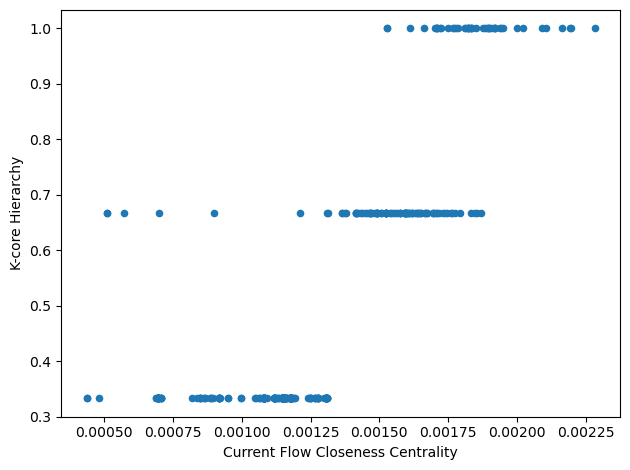

In [436]:
# close, Kcore
x = np.array(close)
y = np.array(df.Kcore.values)


plt.scatter(x, y, s=20)

plt.xlabel('Current Flow Closeness Centrality')
plt.ylabel('K-core Hierarchy')

plt.tight_layout()
plt.show()

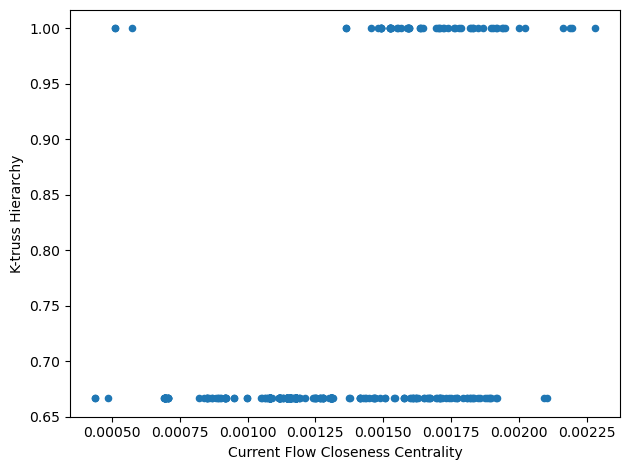

In [437]:
# Close, Ktruss
x = np.array(close)
y = np.array(ktruss_alone_cent)


plt.scatter(x, y, s=20)

plt.xlabel('Current Flow Closeness Centrality')
plt.ylabel('K-truss Hierarchy')

plt.tight_layout()
plt.show()

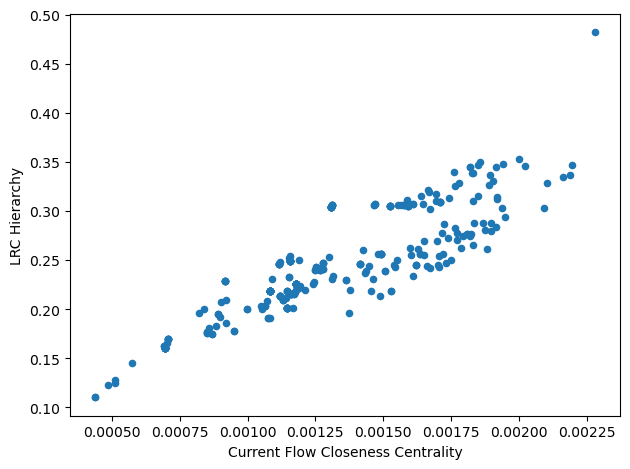

In [438]:
# Close, LRC
x = np.array(close)
y = lrc_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('Current Flow Closeness Centrality')
plt.ylabel('LRC Hierarchy')

plt.tight_layout()
plt.show()

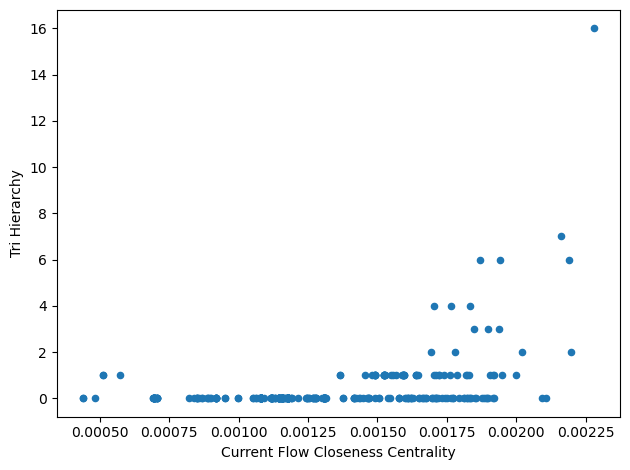

In [439]:
# Close, tri 
x = np.array(close)
y = tri_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('Current Flow Closeness Centrality')
plt.ylabel('Tri Hierarchy')

plt.tight_layout()
plt.show()

(array([264.,  63.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.01192716, 0.06928621, 0.12664526, 0.18400431, 0.24136336,
        0.29872241, 0.35608146, 0.41344051, 0.47079956, 0.52815862,
        0.58551767]),
 <BarContainer object of 10 artists>)

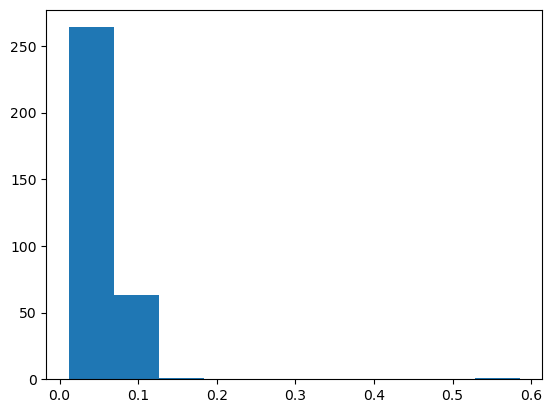

In [440]:
plt.hist(katz)

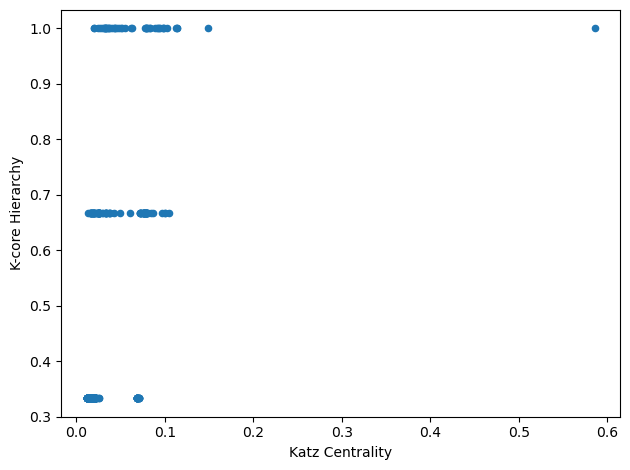

In [441]:
# katz, Kcore
x = np.array(katz)
y = np.array(df.Kcore.values)


plt.scatter(x, y, s=20)

plt.xlabel('Katz Centrality')
plt.ylabel('K-core Hierarchy')

plt.tight_layout()
plt.show()

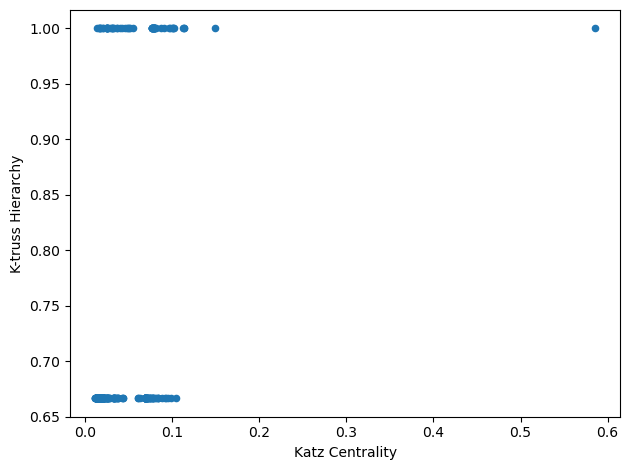

In [442]:
# katz, Ktruss
x = np.array(katz)
y = np.array(ktruss_alone_cent)


plt.scatter(x, y, s=20)

plt.xlabel('Katz Centrality')
plt.ylabel('K-truss Hierarchy')

plt.tight_layout()
plt.show()

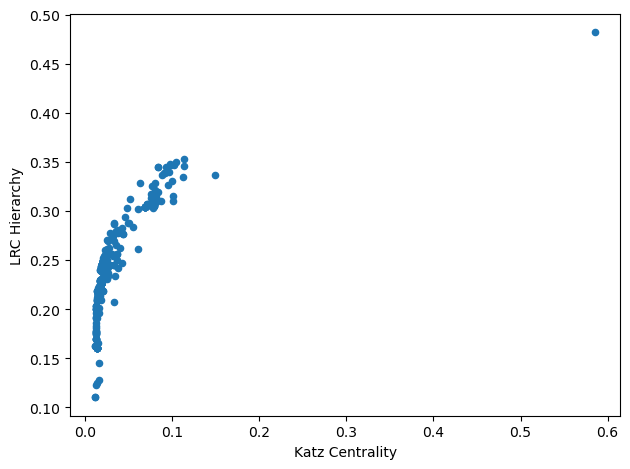

In [443]:
# katz, LRC
x = np.array(katz)
y = lrc_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('Katz Centrality')
plt.ylabel('LRC Hierarchy')

plt.tight_layout()
plt.show()

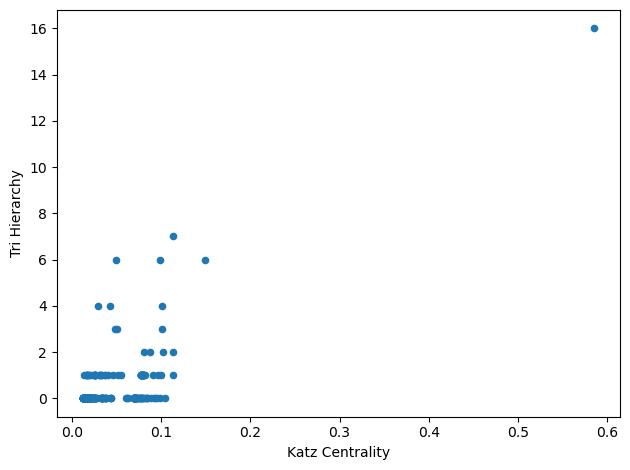

In [444]:
# katz, tri 
x = np.array(katz)
y = tri_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('Katz Centrality')
plt.ylabel('Tri Hierarchy')

plt.tight_layout()
plt.show()

(array([310.,  10.,   5.,   1.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00112419, 0.00754018, 0.01395617, 0.02037217, 0.02678816,
        0.03320415, 0.03962014, 0.04603614, 0.05245213, 0.05886812,
        0.06528411]),
 <BarContainer object of 10 artists>)

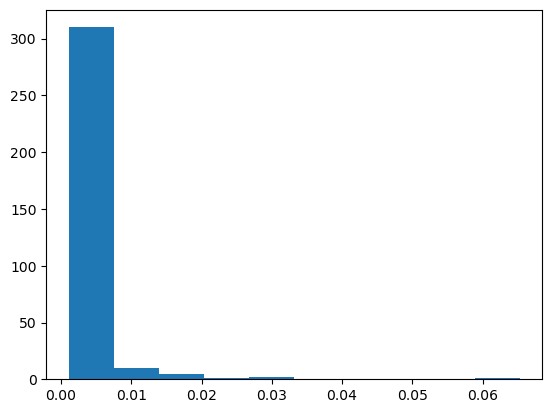

In [445]:
plt.hist(pagerank)

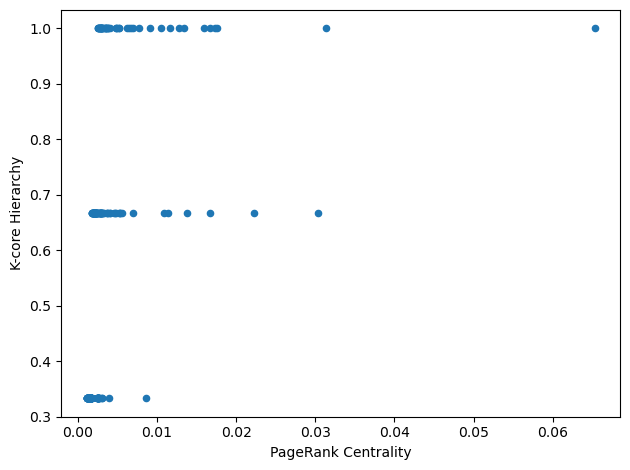

In [446]:
# pagerank, Kcore
x = np.array(pagerank)
y = np.array(df.Kcore.values)


plt.scatter(x, y, s=20)

plt.xlabel('PageRank Centrality')
plt.ylabel('K-core Hierarchy')

plt.tight_layout()
plt.show()

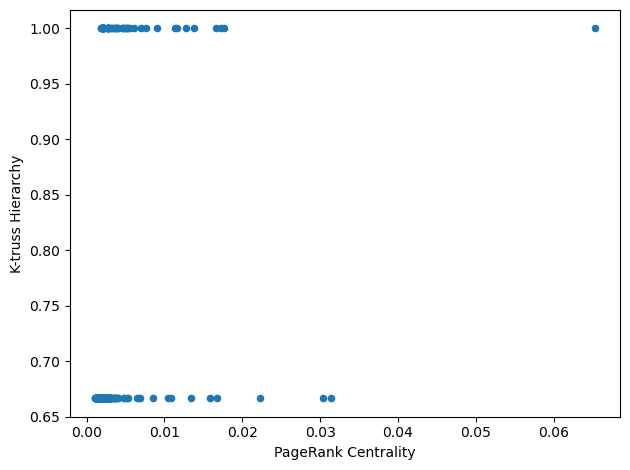

In [447]:
# pagerank, Ktruss
x = np.array(pagerank)
y = np.array(ktruss_alone_cent)


plt.scatter(x, y, s=20)

plt.xlabel('PageRank Centrality')
plt.ylabel('K-truss Hierarchy')

plt.tight_layout()
plt.show()

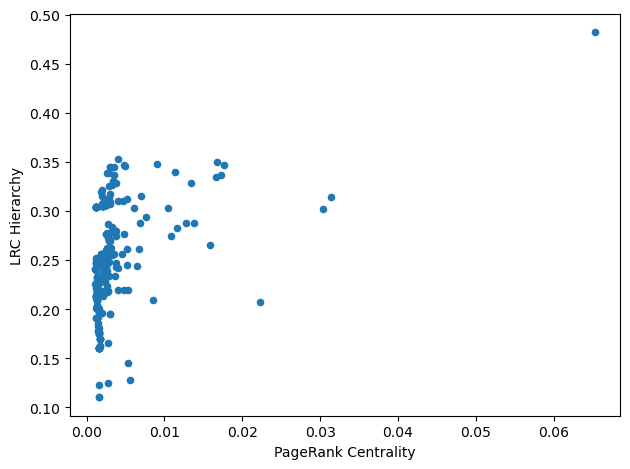

In [448]:
# pagerank, LRC
x = np.array(pagerank)
y = lrc_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('PageRank Centrality')
plt.ylabel('LRC Hierarchy')

plt.tight_layout()
plt.show()

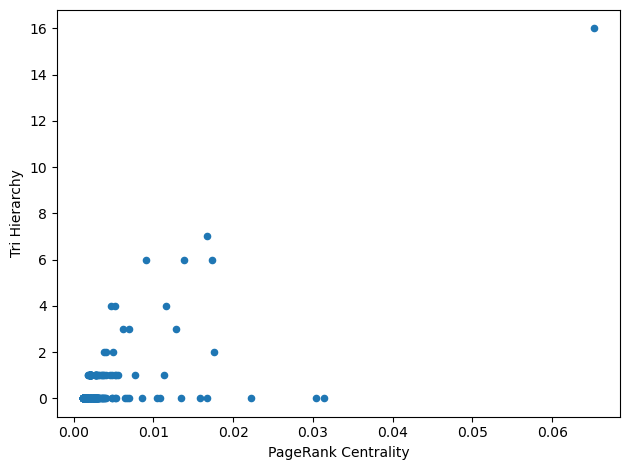

In [450]:
# pagerank, tri 
x = np.array(pagerank)
y = tri_alone_cent


plt.scatter(x, y, s=20)

plt.xlabel('PageRank Centrality')
plt.ylabel('Tri Hierarchy')

plt.tight_layout()
plt.show()